# Подгружаем всё необходимое

In [122]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [123]:
df = pd.read_csv('DTP_DATA_2025_PROCESSED.csv', index_col=0)
df

REGION        DATE    COORD_L    COORD_W  \
6             1  31.01.2015  81.151944  53.740000   
8             1  30.01.2015  85.018056  51.684444   
12            1  30.01.2015  81.250000  53.818056   
39            1  24.01.2015  51.000000  84.000000   
42            1  23.01.2015  84.000000  53.000000   
...         ...         ...        ...        ...   
1475642   10011  18.12.2022  55.731164  67.417464   
1475665   10011  16.06.2024  54.095821  67.629532   
1475669   10011  04.07.2024  53.607541  67.836463   
1475671   10011  25.08.2024  53.612724  67.837285   
1475672   10011  24.09.2024  55.956877  67.303057   

                                                 road_name  road_category  \
6             Романово - Завьялово - Баево - Камень-на-Оби            5.0   
8                                  Куяган - Куяча - Тоурак            6.0   
12       Барнаул - Камень-на-Оби - граница Новосибирско...            5.0   
39       Быканов Мост - Солоновка - Солонешное - границ...            7.0   
42       Быканов Мост - Солоновка - Солонешное - границ...            7.0   
...                                                    ...            ...   
1475642  г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...            5.0   
1475665  г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...            6.0   
1475669       Подъездная автомобильная дорога к п. Красное            1.0   
1475671       Подъездная автомобильная дорога к п. Красное            4.0   
1475672  г. Нарьян-Мар - г. Усинск, участок п. Харьягин...            8.0   

         n_VEHICLES  n_PARTICIPANTS         ID  n_DEATHS  ...  \
6                 1               3  161242174         0  ...   
8                 2               3  161105683         0  ...   
12                2               3  161763431         0  ...   
39                1               2  160331994         0  ...   
42                1               2  160213415         1  ...   
...             ...             ...        ...       ...  ...   
1475642           1               1  222679998         1  ...   
1475665           1               2  223892751         0  ...   
1475669           1               1  223948754         0  ...   
1475671           1               1  224161731         0  ...   
1475672           2               2  224282217         0  ...   

         site_objects_cat  severity  YEAR  MONTH  WEEKDAY  SEASON  is_WEEKEND  \
6                      12         2  2015      1        5       1           1   
8                      12         2  2015      1        4       1           0   
12                     12         1  2015      1        4       1           0   
39                     12         1  2015      1        5       1           1   
42                     12         3  2015      1        4       1           0   
...                   ...       ...   ...    ...      ...     ...         ...   
1475642                 3         3  2022     12        6       1           1   
1475665                12         1  2024      6        6       3           1   
1475669                 6         2  2024      7        3       3           0   
1475671                12         1  2024      8        6       3           1   
1475672                12         2  2024      9        1       4           0   

         HOUR  is_NIGHT  is_PEAK_HOUR  
6           9         0             1  
8          14         0             0  
12         17         0             1  
39         19         0             0  
42         21         0             0  
...       ...       ...           ...  
1475642    15         0             0  
1475665     9         0             1  
1475669     9         0             1  
1475671    14         0             0  
1475672    20         0             0  

[473188 rows x 79 columns]

# Предобработка

In [124]:
df = df.drop(columns=['n_pedestrians', 'russian_vehicle'])

In [125]:
df = df.rename(columns={'vehicle_age_max': 'vehicle_year_max', 'vehicle_age_min': 'vehicle_year_min', 'vehicle_age_avg': 'vehicle_year_avg'})

## Удобный формат регионов

In [126]:
regions = pd.read_json('regions.json')
regions

id                          name  \
0   71140             Ямало-Ненецкий АО   
1   71100           Ханты-Мансийский АО   
2      71             Тюменская область   
3   10011                   Ненецкий АО   
4      99  Еврейская автономная область   
..    ...                           ...   
80      4             Красноярский край   
81      3            Краснодарский край   
82      1                Алтайский край   
83     35               Республика Крым   
84     67                г. Севастополь   

                                            districts  
0   [{"id": "71166", "name": "Шурышкарский район"}...  
1   [{"id": "71126", "name": "Сургутский район"}, ...  
2   [{"id": "712581", "name": "Ярковский район"}, ...  
3            [{"id": "11100", "name": "Ненецкий АО"}]  
4   [{"id": "99205", "name": "Биробиджанский район...  
..                                                ...  
80  [{"id": "4233", "name": "Минусинский район"}, ...  
81  [{"id": "3405", "name": "г. Армавир"}, {"id": ...  
82  [{"id": "14011", "name": "г.Барнаул"}, {"id": ...  
83  [{"id": "8125", "name": "Ялта"}, {"id": "8124"...  
84  [{"id": "8126", "name": "Севастополь"}, {"id":...  

[85 rows x 3 columns]

In [127]:
regions['id'] = regions['id'].astype(str)
region_map = dict(zip(regions['id'], regions['name']))
df['region_name'] = df['REGION'].astype(str).map(region_map)

In [128]:
df['region_name']

6          Алтайский край
8          Алтайский край
12         Алтайский край
39         Алтайский край
42         Алтайский край
                ...      
1475642       Ненецкий АО
1475665       Ненецкий АО
1475669       Ненецкий АО
1475671       Ненецкий АО
1475672       Ненецкий АО
Name: region_name, Length: 473188, dtype: object

In [129]:
df.columns

Index(['REGION', 'DATE', 'COORD_L', 'COORD_W', 'road_name', 'road_category',
       'n_VEHICLES', 'n_PARTICIPANTS', 'ID', 'n_DEATHS', 'n_INJURED',
       'vehicle_failure', 'non_private_vehicle', 'white_vehicle',
       'black_vehicle', 'colored_vehicle', 'drunk_driver', 'female_driver',
       'escaped', 'no_seatbelt_injury', 'n_drunk', 'n_children', 'n_cyclists',
       'vehicle_year_min', 'vehicle_year_max', 'vehicle_year_avg', 'n_class_a',
       'n_class_b', 'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s',
       'n_front_drive', 'n_rear_drive', 'n_4wd', 'n_guilty', 'guilty_share',
       'n_fatal_violations', 'guilty_exp_avg', 'exp_avg', 'road_rank_cat',
       'road_defects_cat', 'traffic_changes_bin', 'traffic_changes_cat',
       'road_surface_cat', 'TYPE_cat', 'out_of_town', 'street_rank_cat',
       'weather_interpretable', 'weather_cat', 'adj_objects_interpretable',
       'adj_objects_cat', 'cause_factors_cat', 'crossing_violation',
       'impaired_driving', 'interfere

## Группируем регионы в округа

In [130]:
with open('regions_federal_districts_89.json', 'r', encoding='utf-8') as f:
    region_map = json.load(f)

df['district'] = df['region_name'].map(region_map)

## Графики до очистки

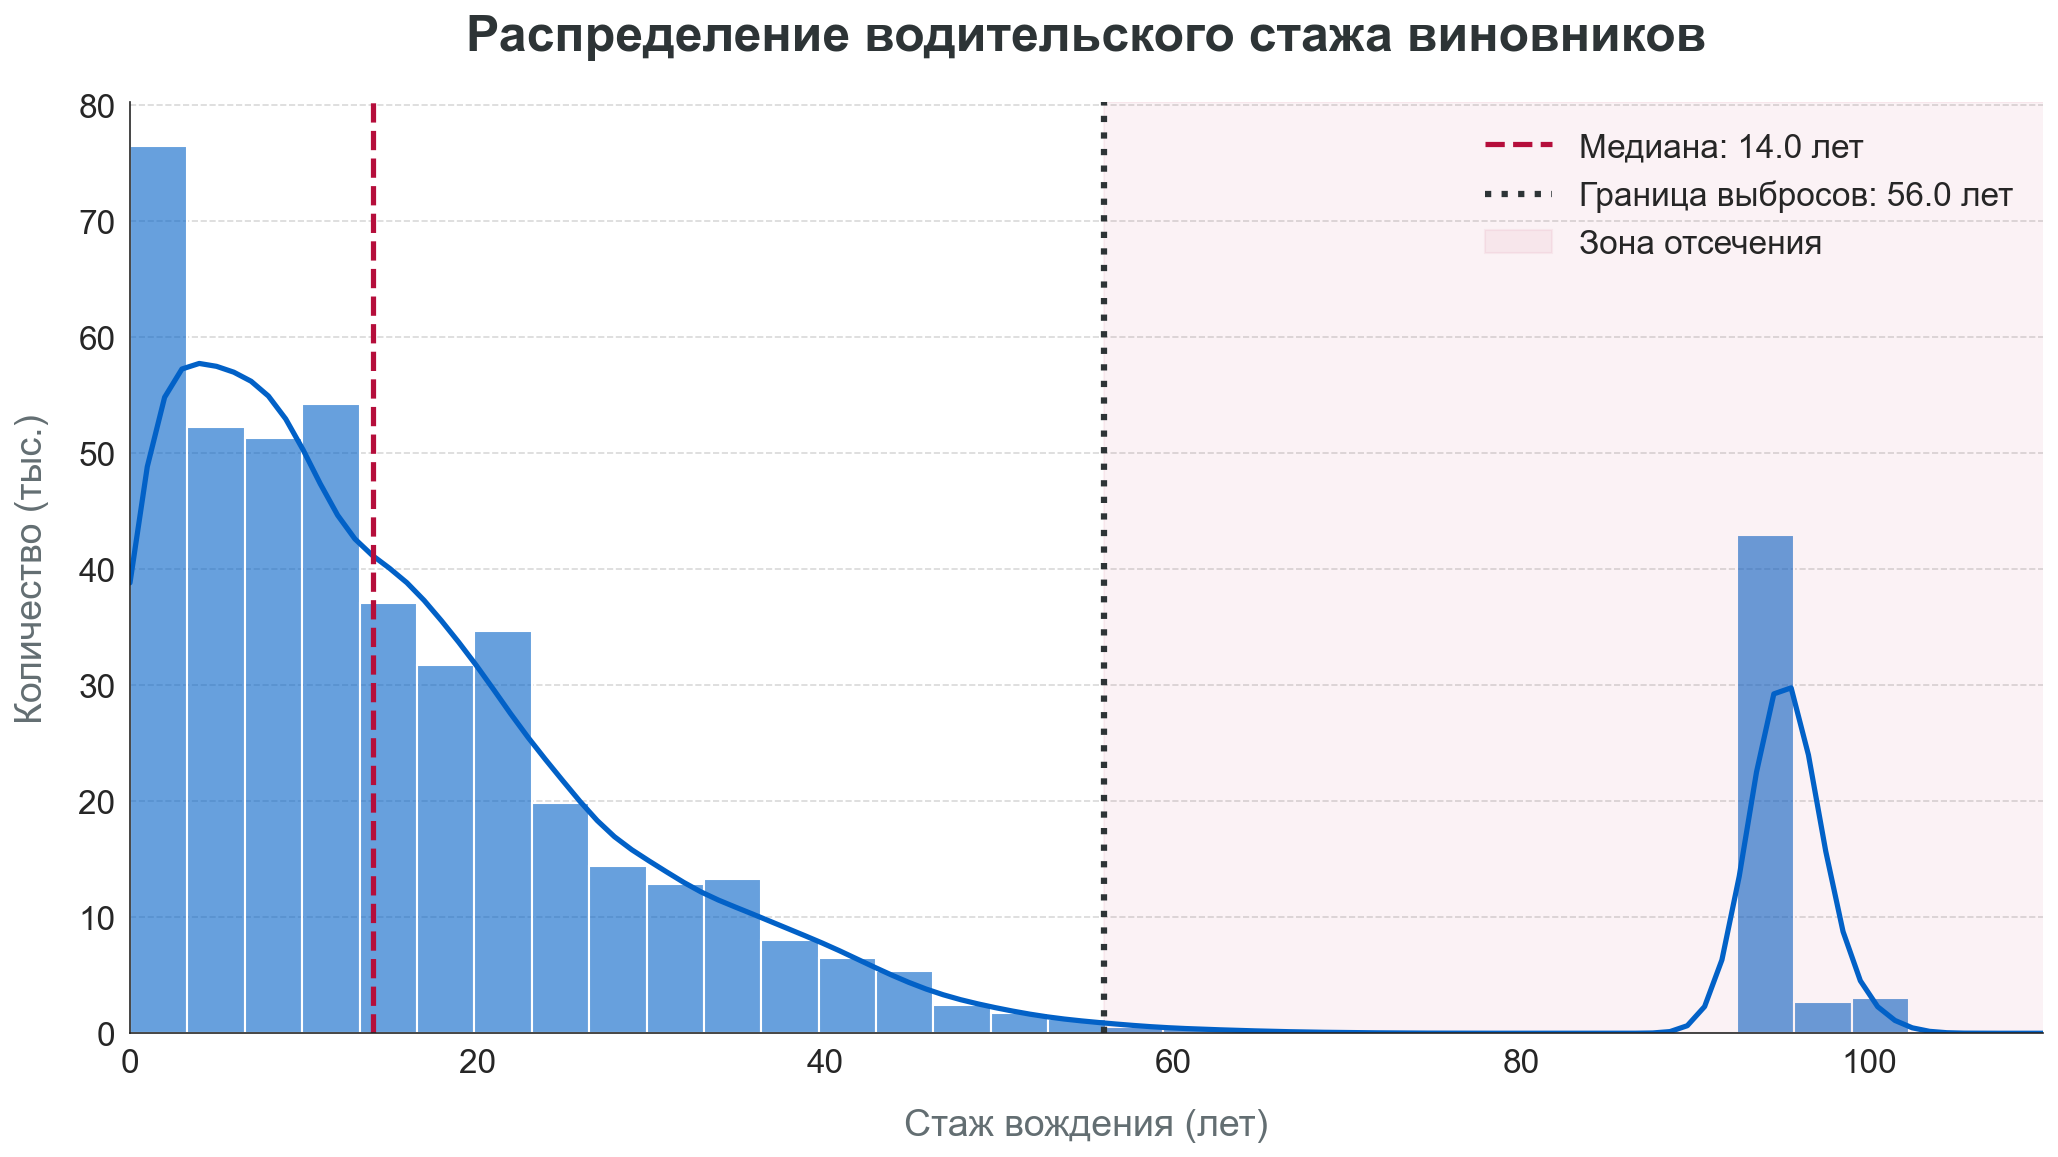

In [131]:
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'

sns.set_style("white")

# 2. Данные
# ВАЖНО: Считаем квартили по ВСЕМ данным (до фильтрации), 
# чтобы выбросы не исказили статистику, или по уже очищенным - зависит от вашей логики.
# Обычно IQR считается на исходном массиве.
raw_data = df['guilty_exp_avg'].dropna()

# --- РАСЧЕТ ГРАНИЦЫ (IQR METHOD) ---
Q1 = raw_data.quantile(0.25)
Q3 = raw_data.quantile(0.75)
IQR = Q3 - Q1
cutoff_value = Q3 + 1.5 * IQR
# -----------------------------------

# 3. Настройка фигуры
plt.figure(figsize=(14, 8), dpi=150)

# 4. Строим график
ax = sns.histplot(
    data=raw_data,
    bins=60,           # Чуть больше бинов, чтобы видеть детали
    kde=True,
    color="#0261C7",   # Спокойный сине-голубой (как на скриншоте)
    alpha=0.6,
    edgecolor="white",
    line_kws={'linewidth': 2.5, 'color': '#153AE0'} # Синяя линия тренда
)

# 5. Линии

# Медиана (Оранжевая)
median_val = raw_data.median()
plt.axvline(median_val, color='#B50E3B', linestyle='--', linewidth=2.5, 
            label=f'Медиана: {median_val:.1f} лет')

# --- ЛИНИЯ ОТСЕЧЕНИЯ (IQR) ---
plt.axvline(cutoff_value, color='#2d3436', linestyle=':', linewidth=3, 
            label=f'Граница выбросов: {cutoff_value:.1f} лет')

# (Опционально) Заштриховать зону выбросов
plt.axvspan(cutoff_value, raw_data.max(), color='#B50E3B', alpha=0.05, label='Зона отсечения')
# -----------------------------

# 6. Форматтер оси Y (тысячи)
def y_fmt(x, pos):
    return f'{x/1000:.0f}' 

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# 7. Декор
sns.despine(left=False, bottom=False) # Или как тебе удобнее
# Сетка пунктирная
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3)
ax.set_axisbelow(True)

# Подписи
plt.title('Распределение водительского стажа виновников', fontsize=24, fontweight='bold', color='#2d3436', pad=25)
plt.xlabel('Стаж вождения (лет)', fontsize=18, color='#636e72', labelpad=14)
plt.ylabel('Количество (тыс.)', fontsize=18, color='#636e72', labelpad=14)

# Легенда
plt.legend(frameon=False, fontsize=16, loc='upper right')

# Ограничим X, чтобы график не улетал в бесконечность, если есть ошибки типа "1900 лет стажа"
# Но покажем хвост с выбросами, чтобы было видно, ЧТО мы отрезаем
plt.xlim(0, max(cutoff_value * 1.5, 110)) 

plt.tight_layout()
plt.show()

## Очистка

In [132]:
exp = df['exp_avg']
exp_IQR = exp.quantile(0.75) - exp.quantile(0.25)
exp_edge = exp.quantile(0.75) + 1.5 * exp_IQR
exp_edge

48.0

In [133]:
guilty_exp = df['guilty_exp_avg']
guilty_exp_IQR = guilty_exp.quantile(0.75) - guilty_exp.quantile(0.25)
guilty_exp_edge = guilty_exp.quantile(0.75) + 1.5 * guilty_exp_IQR
guilty_exp_edge

56.0

In [134]:
df = df[(df['guilty_exp_avg'] <= guilty_exp_edge) & (df['exp_avg'] < guilty_exp_edge)]
df

REGION        DATE    COORD_L    COORD_W  \
6             1  31.01.2015  81.151944  53.740000   
8             1  30.01.2015  85.018056  51.684444   
12            1  30.01.2015  81.250000  53.818056   
39            1  24.01.2015  51.000000  84.000000   
42            1  23.01.2015  84.000000  53.000000   
...         ...         ...        ...        ...   
1475635   10011  06.08.2022  53.104005  67.671952   
1475642   10011  18.12.2022  55.731164  67.417464   
1475665   10011  16.06.2024  54.095821  67.629532   
1475669   10011  04.07.2024  53.607541  67.836463   
1475672   10011  24.09.2024  55.956877  67.303057   

                                                 road_name  road_category  \
6             Романово - Завьялово - Баево - Камень-на-Оби            5.0   
8                                  Куяган - Куяча - Тоурак            6.0   
12       Барнаул - Камень-на-Оби - граница Новосибирско...            5.0   
39       Быканов Мост - Солоновка - Солонешное - границ...            7.0   
42       Быканов Мост - Солоновка - Солонешное - границ...            7.0   
...                                                    ...            ...   
1475635             Автомобильная дорога по улице Угольная            6.0   
1475642  г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...            5.0   
1475665  г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...            6.0   
1475669       Подъездная автомобильная дорога к п. Красное            1.0   
1475672  г. Нарьян-Мар - г. Усинск, участок п. Харьягин...            8.0   

         n_VEHICLES  n_PARTICIPANTS         ID  n_DEATHS  ...  YEAR  MONTH  \
6                 1               3  161242174         0  ...  2015      1   
8                 2               3  161105683         0  ...  2015      1   
12                2               3  161763431         0  ...  2015      1   
39                1               2  160331994         0  ...  2015      1   
42                1               2  160213415         1  ...  2015      1   
...             ...             ...        ...       ...  ...   ...    ...   
1475635           1               2  222381293         0  ...  2022      8   
1475642           1               1  222679998         1  ...  2022     12   
1475665           1               2  223892751         0  ...  2024      6   
1475669           1               1  223948754         0  ...  2024      7   
1475672           2               2  224282217         0  ...  2024      9   

         WEEKDAY  SEASON  is_WEEKEND  HOUR  is_NIGHT  is_PEAK_HOUR  \
6              5       1           1     9         0             1   
8              4       1           0    14         0             0   
12             4       1           0    17         0             1   
39             5       1           1    19         0             0   
42             4       1           0    21         0             0   
...          ...     ...         ...   ...       ...           ...   
1475635        5       3           1     5         1             0   
1475642        6       1           1    15         0             0   
1475665        6       3           1     9         0             1   
1475669        3       3           0     9         0             1   
1475672        1       4           0    20         0             0   

            region_name         district  
6        Алтайский край        Сибирский  
8        Алтайский край        Сибирский  
12       Алтайский край        Сибирский  
39       Алтайский край        Сибирский  
42       Алтайский край        Сибирский  
...                 ...              ...  
1475635     Ненецкий АО  Северо-Западный  
1475642     Ненецкий АО  Северо-Западный  
1475665     Ненецкий АО  Северо-Западный  
1475669     Ненецкий АО  Северо-Западный  
1475672     Ненецкий АО  Северо-Западный  

[419595 rows x 79 columns]

In [135]:
len(df)

419595

In [136]:
df.to_csv('final_dtp.csv', index=False)

### После очистки осталось 419595 строк

## Графички после очистки

/var/folders/5y/prlkw2jx437djr2ybr7mqrfm0000gn/T/ipykernel_12109/3431987402.py:23: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


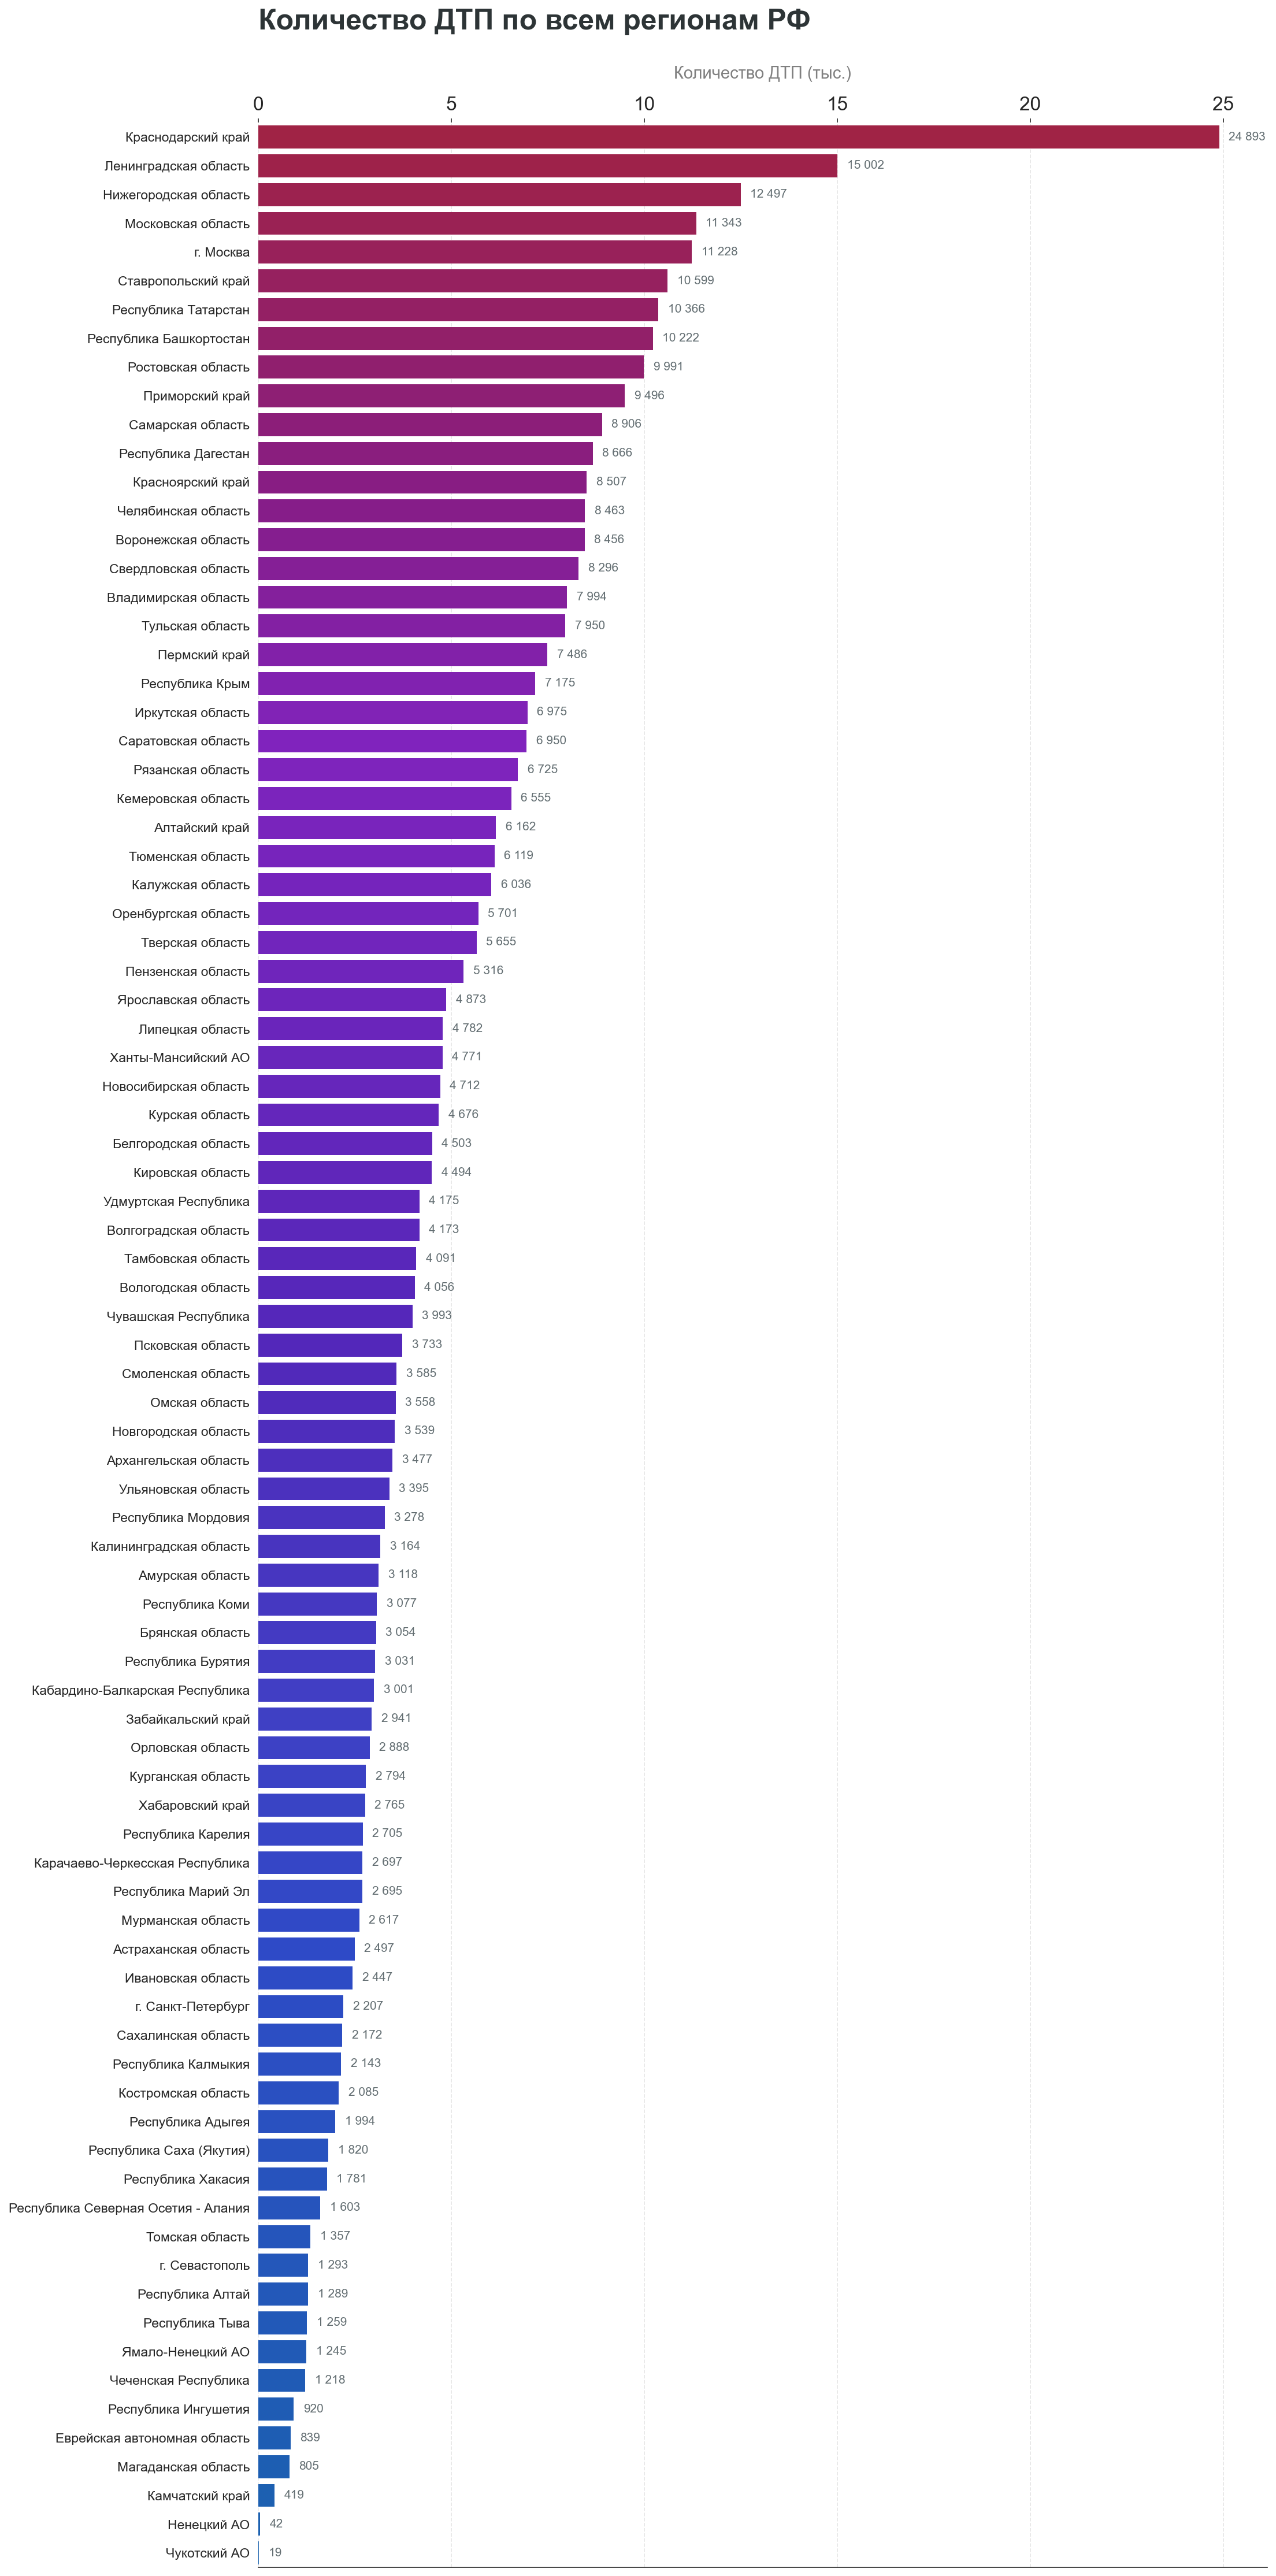

In [137]:
hex_colors = ['#B50E3B', '#850AD6', '#490FD2', '#153AE0', '#0261C7']

# 2. Подготовка данных
# Сортируем от большего к меньшему
region_counts = df['region_name'].value_counts()
n_bars = len(region_counts)

# 3. Создаем градиентную палитру на N регионов
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", hex_colors, N=n_bars)
gradient_palette = custom_cmap(np.linspace(0, 1, n_bars))

# 4. Настройка шрифта
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'

# 5. Рисуем график
# ВАЖНО: figsize=(15, 30) — делаем график очень длинным по вертикали!
plt.figure(figsize=(15, 30), dpi=150) 
sns.set_style("white")

ax = sns.barplot(
    x=region_counts.values,
    y=region_counts.index,
    hue=region_counts.index, 
    palette=gradient_palette,
    edgecolor='none',
    legend=False
)

# 6. Оформление
sns.despine(left=True, bottom=False)

plt.title('Количество ДТП по всем регионам РФ', fontsize=24, fontweight='bold', color='#2d3436', pad=30, loc='left')
plt.xlabel('Количество ДТП (тыс.)', fontsize=14, color='gray', labelpad=15)
plt.ylabel('', fontsize=12)

# Увеличим шрифт названий регионов, чтобы читалось
ax.tick_params(axis='y', labelsize=11)

# 7. Форматирование оси X (тысячи)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}'))
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.2)
ax.xaxis.tick_top() # Перенесем шкалу наверх, чтобы было удобнее смотреть длинный список
ax.xaxis.set_label_position('top')

# 8. Цифры (только если столбец достаточно большой, чтобы не мусорить)
for i, v in enumerate(region_counts.values):
    # Добавляем подпись
    ax.text(
        v + (region_counts.max() * 0.01), # Небольшой отступ
        i, 
        f'{v:,.0f}'.replace(',', ' '),
        va='center', 
        fontsize=10, 
        color='#636e72'
    )

plt.tight_layout()
plt.show()

/var/folders/5y/prlkw2jx437djr2ybr7mqrfm0000gn/T/ipykernel_12109/2552072259.py:23: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_5.values, y=top_5.index, hue=top_5.index, palette=colors_top, ax=axes[0], legend=False)
/var/folders/5y/prlkw2jx437djr2ybr7mqrfm0000gn/T/ipykernel_12109/2552072259.py:26: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=bottom_5.values, y=bottom_5.index, hue=bottom_5.index, palette=colors_bottom, ax=axes[1], legend=False)


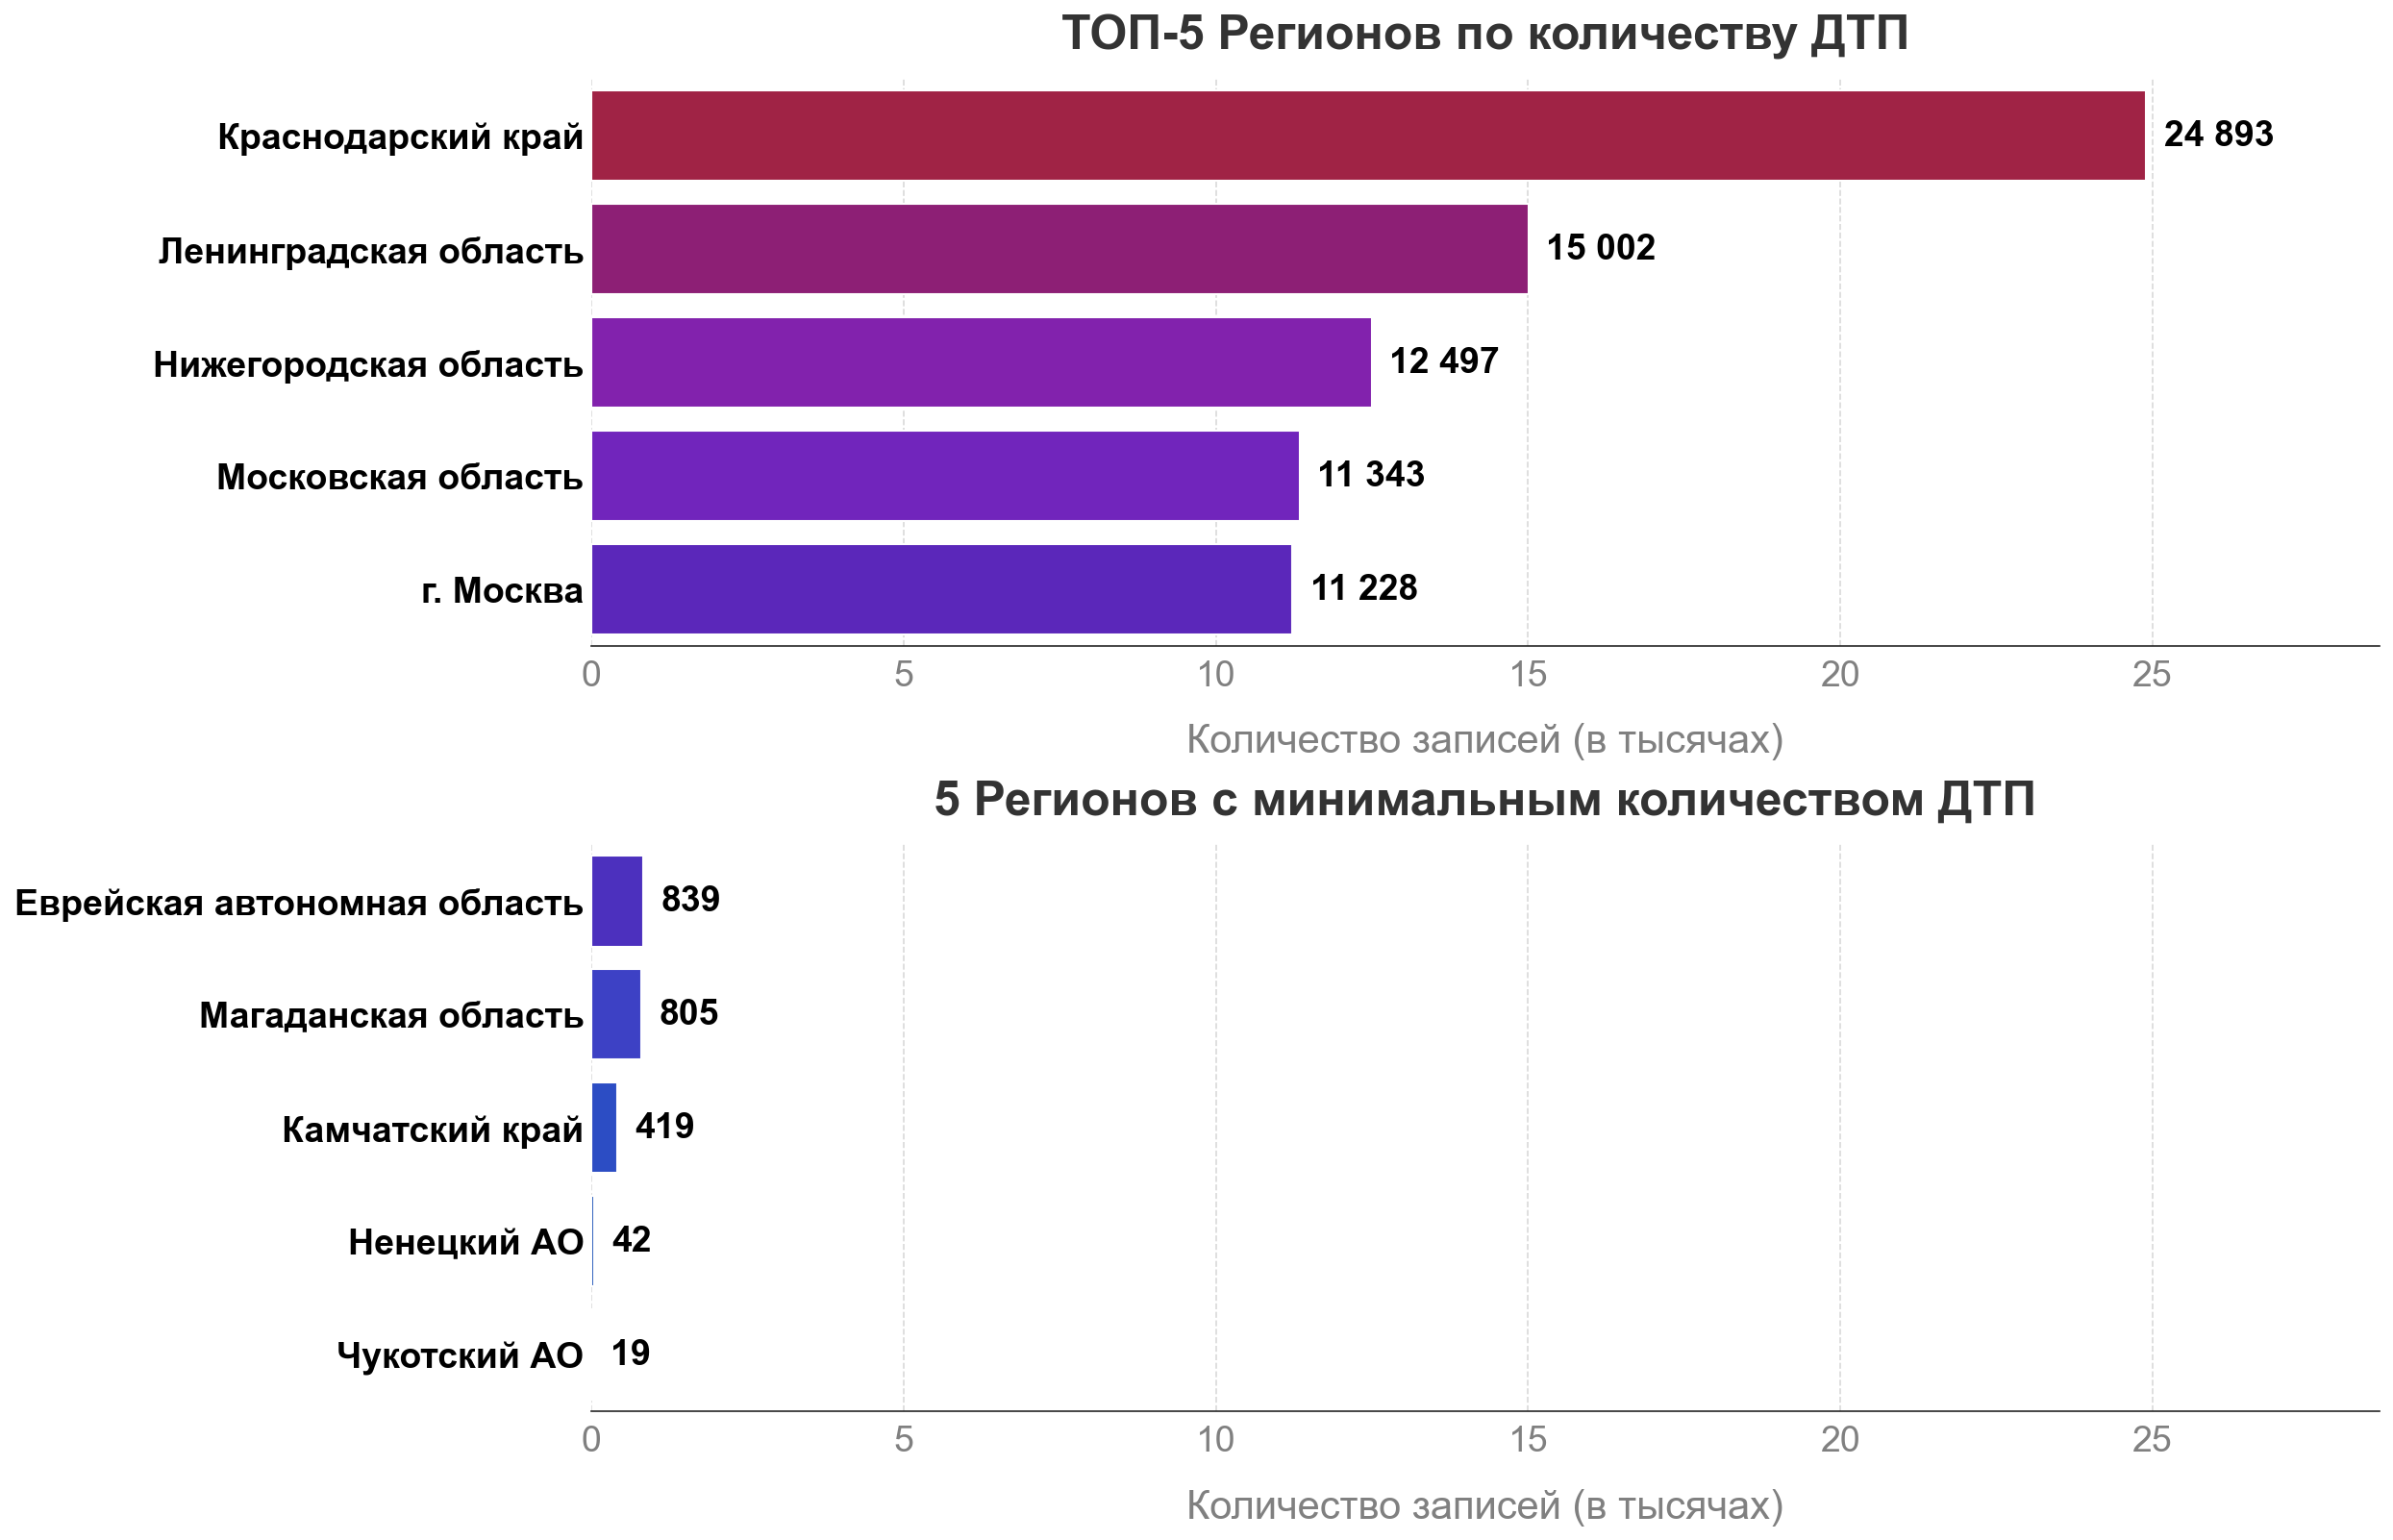

In [138]:
region_counts = df['region_name'].value_counts()
top_5 = region_counts.head(5)
bottom_5 = region_counts.tail(5)

# Единый масштаб
global_max = top_5.max() * 1.15

# 2. Палитра
hex_colors = ['#B50E3B', '#850AD6', '#490FD2', '#153AE0', '#0261C7']
full_cmap = mcolors.LinearSegmentedColormap.from_list("custom", hex_colors, N=100)
colors_top = full_cmap(np.linspace(0, 0.45, 5))
colors_bottom = full_cmap(np.linspace(0.55, 1, 5))

# 3. Настройки шрифтов
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']

# 4. Фигура
fig, axes = plt.subplots(2, 1, figsize=(16, 12), dpi=150)
plt.subplots_adjust(hspace=0.35)

# --- ГРАФИКИ ---
sns.barplot(x=top_5.values, y=top_5.index, hue=top_5.index, palette=colors_top, ax=axes[0], legend=False)
axes[0].set_title('ТОП-5 Регионов по количеству ДТП', fontsize=24, fontweight='heavy', color='#333333', pad=15)

sns.barplot(x=bottom_5.values, y=bottom_5.index, hue=bottom_5.index, palette=colors_bottom, ax=axes[1], legend=False)
axes[1].set_title('5 Регионов с минимальным количеством ДТП', fontsize=24, fontweight='heavy', color='#333333', pad=15)

# --- СТИЛИЗАЦИЯ ---
def style_ax(ax):
    ax.set_xlim(0, global_max)
    sns.despine(ax=ax, left=True, bottom=False)
    ax.set_ylabel('')
    
    # Увеличил шрифт подписи оси
    ax.set_xlabel('Количество записей (в тысячах)', fontsize=20, color='gray', labelpad=15)
    
    # Форматтер (тысячи 'k')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}'))
    
    # === ИЗМЕНЕНИЕ ЗДЕСЬ: Размер шрифта шкалы (labelsize) ===
    ax.tick_params(axis='x', labelsize=18, labelcolor='gray')
    ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.3)
    
    # Названия регионов
    ax.tick_params(axis='y', length=0)
    plt.setp(ax.get_yticklabels(), fontsize=18, fontweight='bold', color='black')

style_ax(axes[0])
style_ax(axes[1])

# --- ЦИФРЫ У СТОЛБЦОВ ---
def add_labels(ax, data):
    for i, v in enumerate(data.values):
        ax.text(
            v + (global_max * 0.01), 
            i, 
            f'{v:,.0f}'.replace(',', ' '), 
            va='center', 
            fontsize=18, 
            fontweight='bold', 
            color='black'
        )

add_labels(axes[0], top_5)
add_labels(axes[1], bottom_5)

plt.show()

/var/folders/5y/prlkw2jx437djr2ybr7mqrfm0000gn/T/ipykernel_12109/1205570752.py:40: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_5, x='rate_per_1000', y='region_name', palette=colors_top, ax=axes[0], hue='region_name', legend=False)
/var/folders/5y/prlkw2jx437djr2ybr7mqrfm0000gn/T/ipykernel_12109/1205570752.py:43: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=bottom_5, x='rate_per_1000', y='region_name', palette=colors_bottom, ax=axes[1], hue='region_name', legend=False)


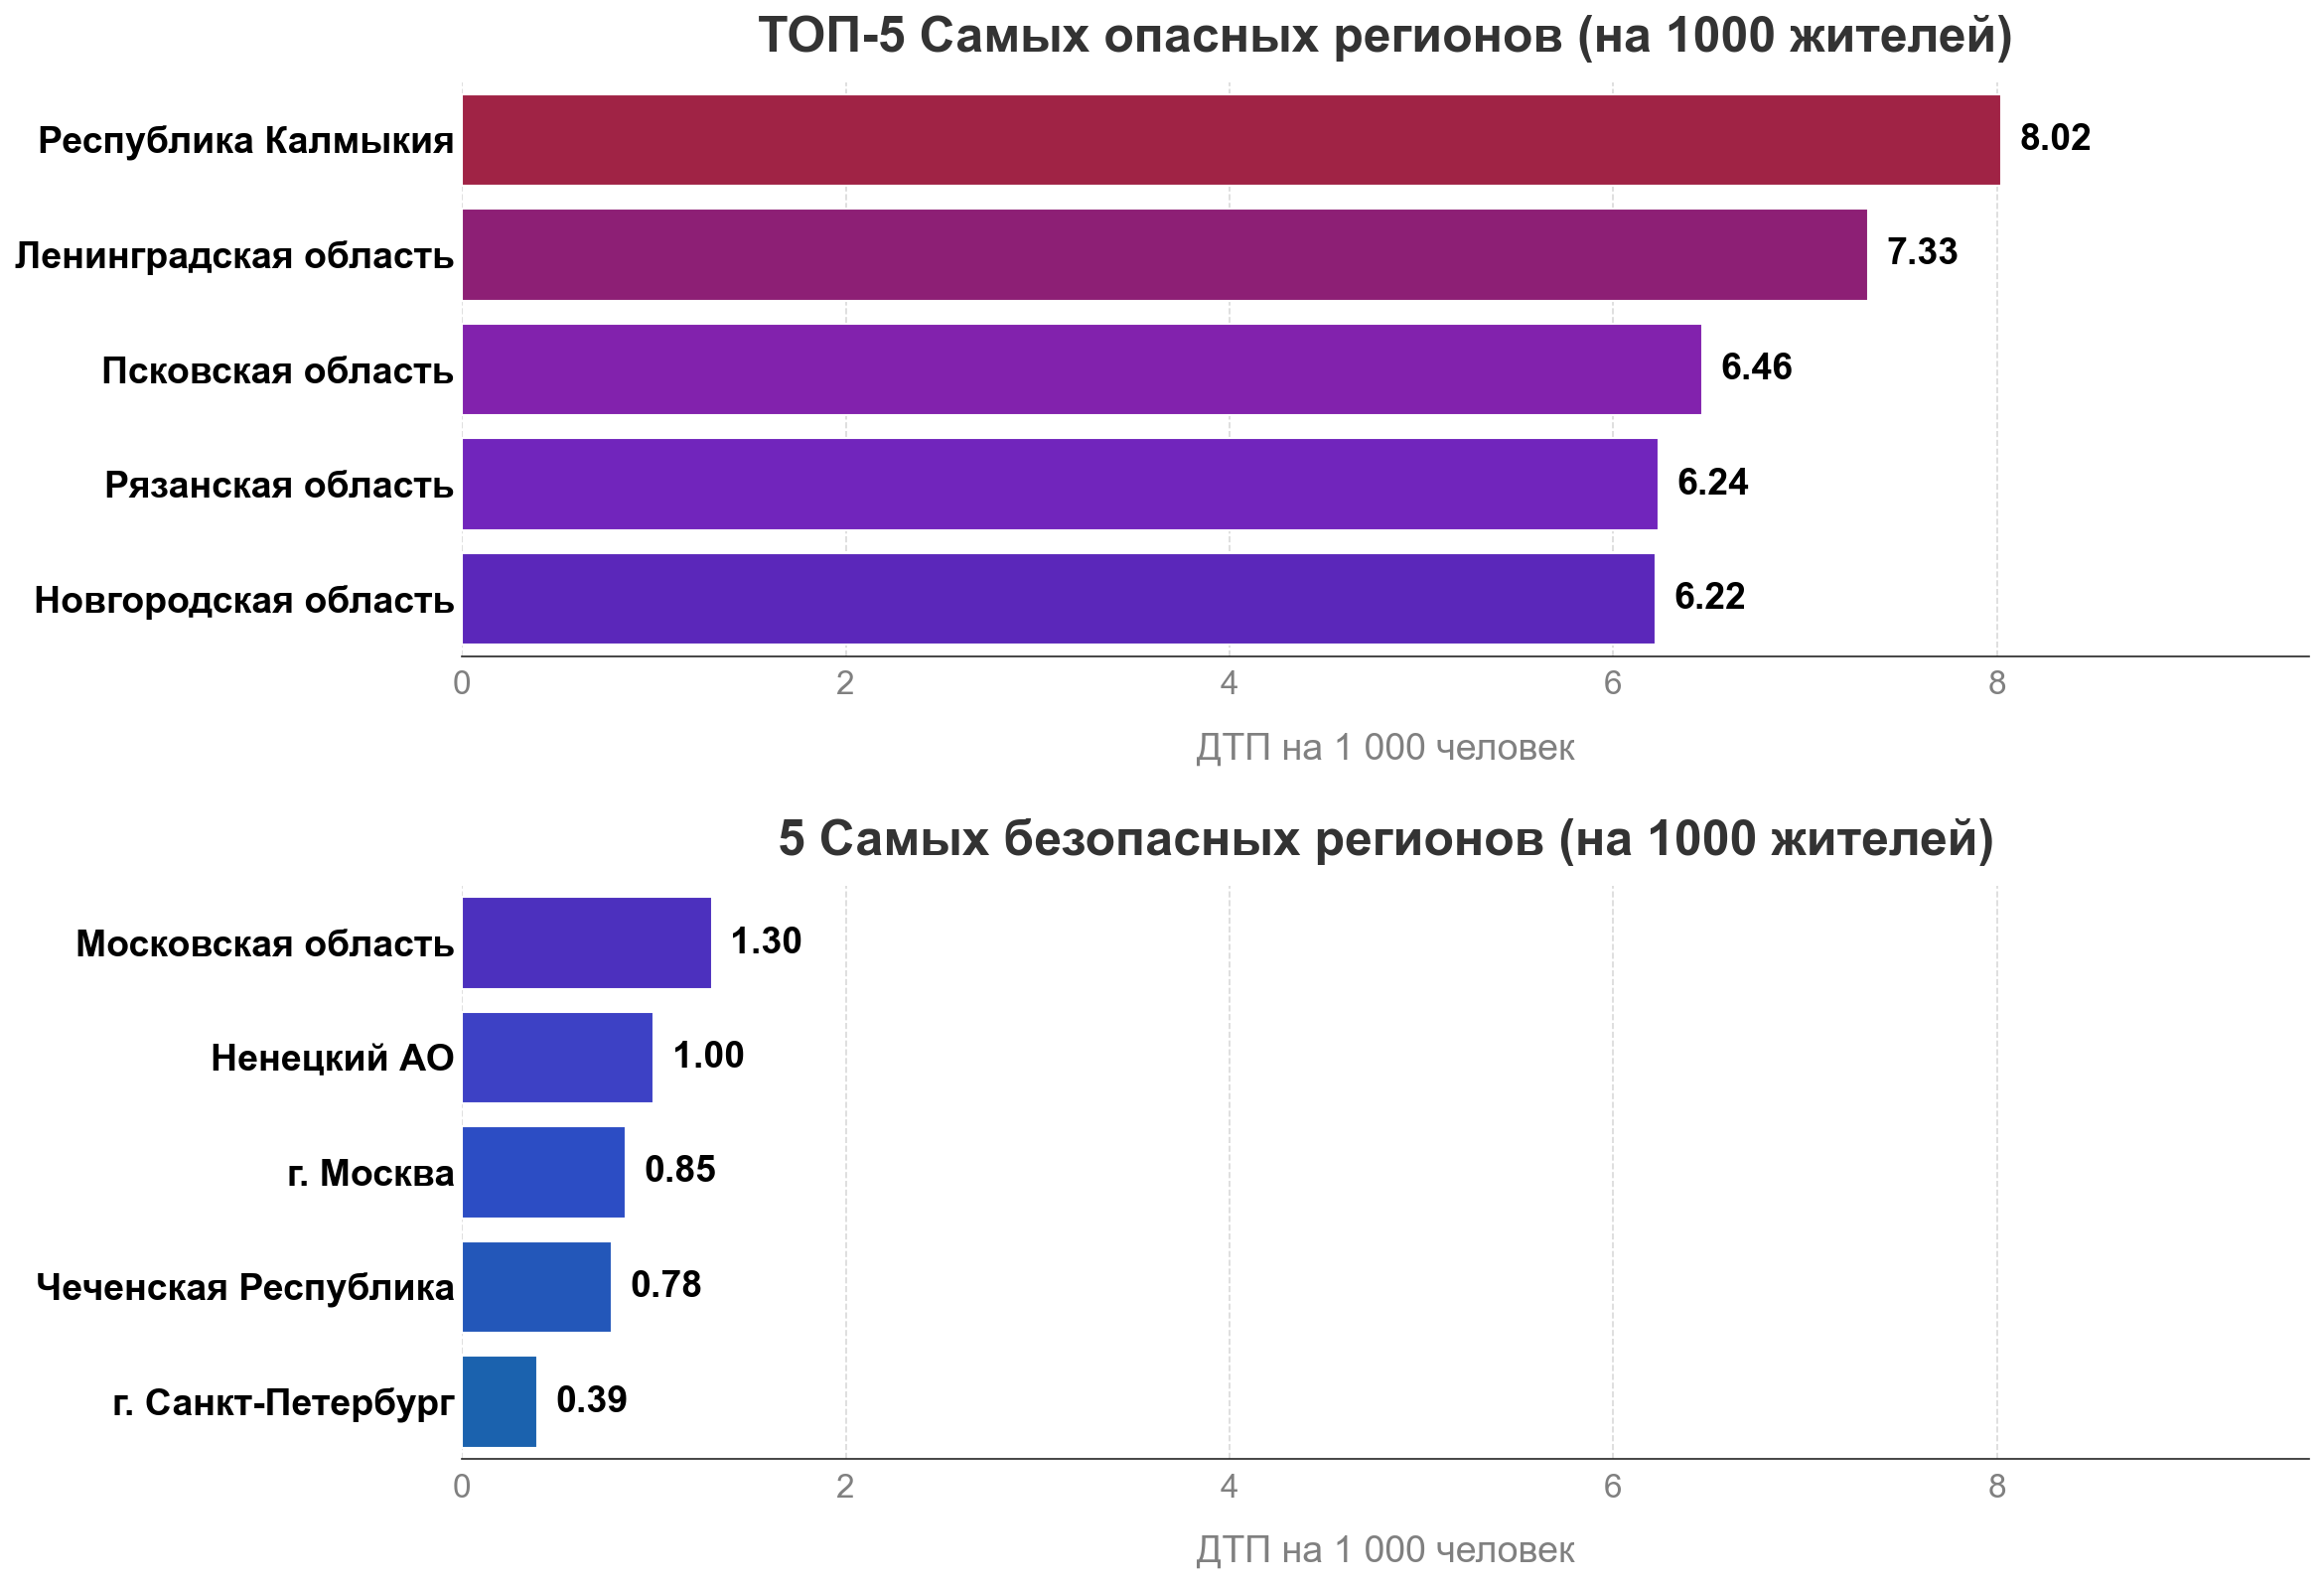

In [139]:
pop_df = pd.read_csv('regions_people.csv', index_col=0)

accidents = df['region_name'].value_counts().reset_index()
accidents.columns = ['region_name', 'accident_count']

# Объединяем таблицы (LEFT JOIN, чтобы не потерять регионы ДТП, но лучше INNER если уверены в названиях)
# В CSV колонка 'name', в df 'region_name'
merged = pd.merge(accidents, pop_df, left_on='region_name', right_on='name', how='inner')

# Считаем относительную величину: (ДТП / Население) * 1000
merged['rate_per_1000'] = (merged['accident_count'] / merged['man']) * 1000

# Сортируем
merged_sorted = merged.sort_values(by='rate_per_1000', ascending=False)

top_5 = merged_sorted.head(5)
bottom_5 = merged_sorted.tail(5)

# --- 3. ВИЗУАЛИЗАЦИЯ (Финальный стиль) ---

# Настройки
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']
hex_colors = ['#B50E3B', '#850AD6', '#490FD2', '#153AE0', '#0261C7']
full_cmap = mcolors.LinearSegmentedColormap.from_list("custom", hex_colors, N=100)
colors_top = full_cmap(np.linspace(0, 0.45, 5))
colors_bottom = full_cmap(np.linspace(0.55, 1, 5))

# Фигура
fig, axes = plt.subplots(2, 1, figsize=(16, 12), dpi=150)
plt.subplots_adjust(hspace=0.4) # Чуть больше места между заголовком и графиком

# Определяем масштаб (здесь лучше не делать единый, если разрыв огромен, но для честности оставим)
# Если в топе цифра 5.0, а внизу 0.2, то единый масштаб "убьет" нижний график.
# Давай сделаем адаптивный масштаб, но визуально схожий стиль.
# ИЛИ, если хочешь показать разрыв, берем max от топа.
global_max = top_5['rate_per_1000'].max() * 1.2

# --- ГРАФИКИ ---
sns.barplot(data=top_5, x='rate_per_1000', y='region_name', palette=colors_top, ax=axes[0], hue='region_name', legend=False)
axes[0].set_title('ТОП-5 Самых опасных регионов (на 1000 жителей)', fontsize=24, fontweight='heavy', color='#333333', pad=15)

sns.barplot(data=bottom_5, x='rate_per_1000', y='region_name', palette=colors_bottom, ax=axes[1], hue='region_name', legend=False)
axes[1].set_title('5 Самых безопасных регионов (на 1000 жителей)', fontsize=24, fontweight='heavy', color='#333333', pad=15)

# --- ОФОРМЛЕНИЕ ---
def style_ax(ax):
    # Оставляем единый масштаб для честности сравнения (можно убрать, если низ совсем плоский)
    ax.set_xlim(0, global_max) 
    
    sns.despine(ax=ax, left=True, bottom=False)
    ax.set_ylabel('')
    ax.set_xlabel('ДТП на 1 000 человек', fontsize=18, color='gray', labelpad=15)
    
    # Сетка и шрифт шкалы
    ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.3)
    ax.tick_params(axis='x', labelsize=16, labelcolor='gray')
    
    # Названия регионов
    ax.tick_params(axis='y', length=0)
    plt.setp(ax.get_yticklabels(), fontsize=18, fontweight='bold', color='black')

style_ax(axes[0])
style_ax(axes[1])

# --- ЦИФРЫ ---
def add_labels(ax, subset):
    for i, row in enumerate(subset.itertuples()):
        val = row.rate_per_1000
        ax.text(
            val + (global_max * 0.01), 
            i, 
            f'{val:.2f}', # 2 знака после запятой
            va='center', 
            fontsize=18, 
            fontweight='bold', 
            color='black'
        )

add_labels(axes[0], top_5)
add_labels(axes[1], bottom_5)

plt.show()

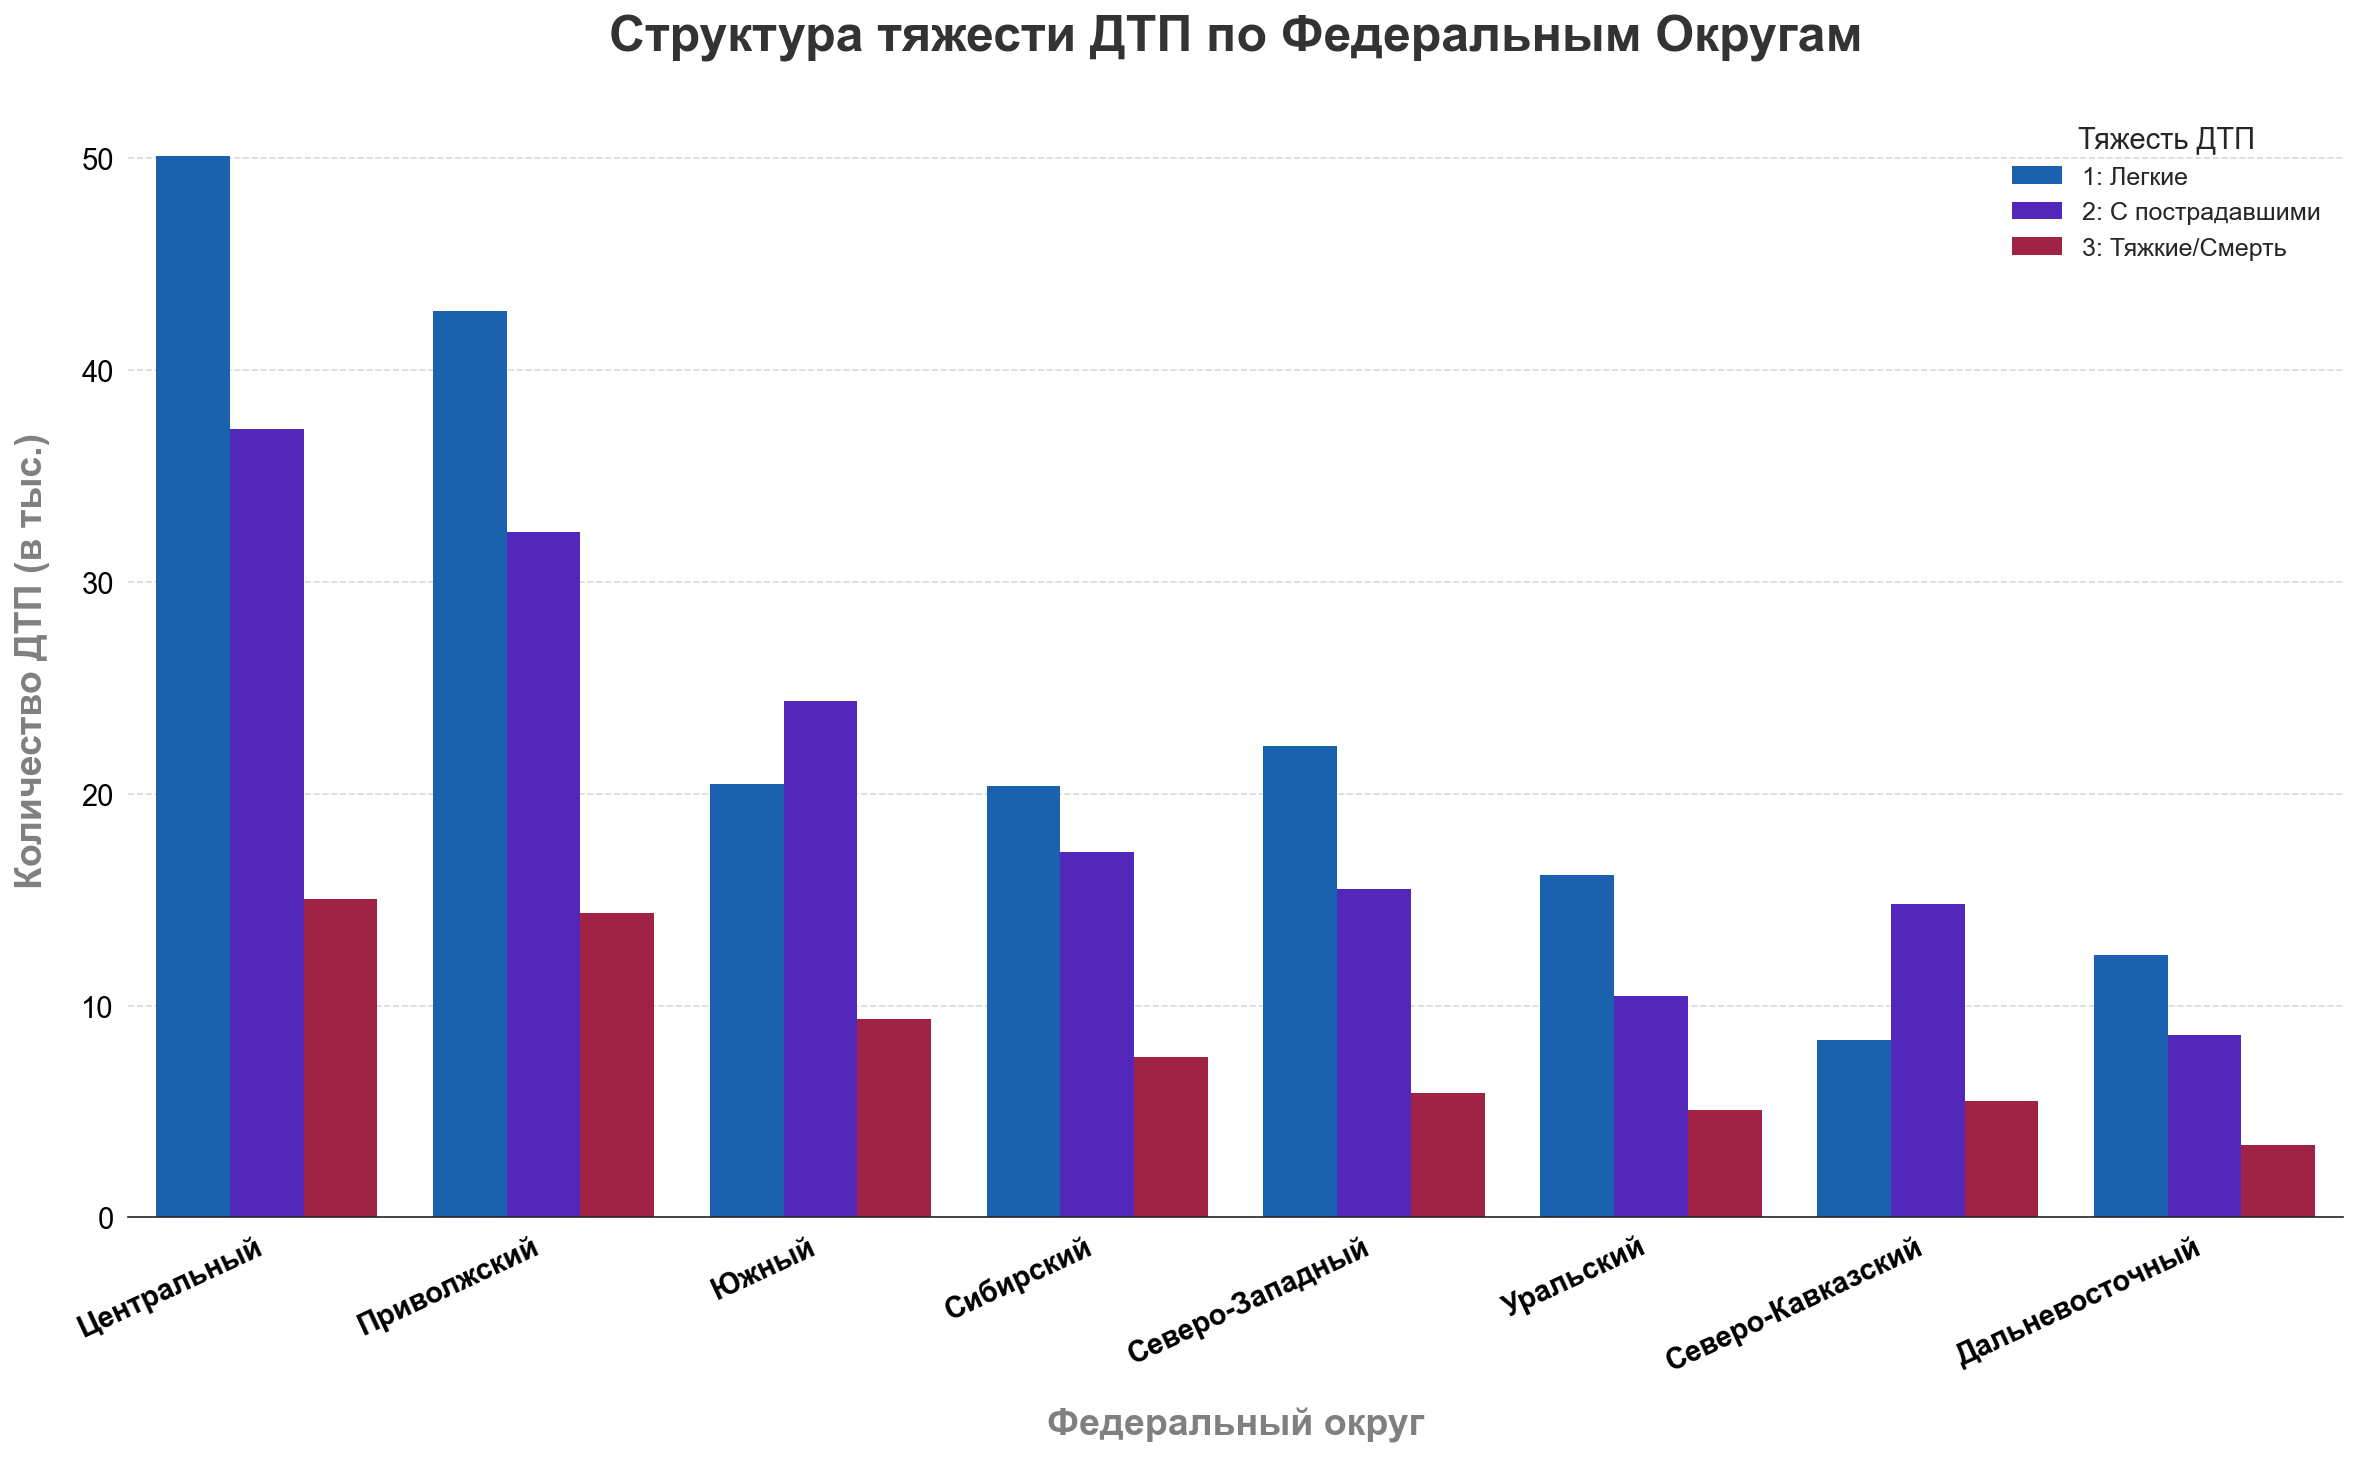

In [140]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']
sns.set_style("white")

# 2. Подготовка данных
# Сортируем округа по общему количеству ДТП (чтобы слева были самые крупные)
district_order = df['district'].value_counts().index

# 3. Палитра
# Нам нужно 3 цвета (для Severity 1, 2, 3) из твоей градиентной палитры.
# Твоя палитра идет от Малинового (Danger) к Синему (Safe).
# Логично сделать: 3 (Смерть) = Малиновый, 1 (Легкие) = Синий.
hex_colors = ['#B50E3B', '#850AD6', '#490FD2', '#153AE0', '#0261C7']
full_cmap = mcolors.LinearSegmentedColormap.from_list("custom", hex_colors, N=100)

# Берем 3 цвета: Начало (красный), Середина (фиолетовый), Конец (синий)
# Но так как hue обычно сортируется 1->2->3, а мы хотим 3=Красный, нам нужно перевернуть порядок цветов
# или просто взять их вручную.
# Сделаем так: 1 (Легкие) - Синий, 2 (Травмы) - Фиолетовый, 3 (Тяжкие) - Малиновый
severity_palette = [hex_colors[-1], hex_colors[2], hex_colors[0]] # Синий, Фиолетовый, Красный

# 4. Фигура
plt.figure(figsize=(16, 10), dpi=150)

# 5. Строим график
# Используем countplot, он сам посчитает количество
ax = sns.countplot(
    data=df, 
    x='district', 
    hue='severity', 
    order=district_order,
    palette=severity_palette,
    edgecolor='none' # Убираем обводку для чистоты
)

# 6. Оформление
# Заголовок
plt.title('Структура тяжести ДТП по Федеральным Округам', fontsize=24, fontweight='heavy', color='#333333', pad=25)

# Оси
plt.xlabel('Федеральный округ', fontsize=18, fontweight='bold', color='gray', labelpad=15)
plt.ylabel('Количество ДТП (в тыс.)', fontsize=18, fontweight='bold', color='gray', labelpad=15)

# Ось Y (Тысячи)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}'))
ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.3)
ax.tick_params(axis='y', labelsize=14, labelcolor='black')

# Ось X (Округа)
# Поворачиваем текст, так как названия округов длинные
plt.xticks(rotation=25, ha='right', fontsize=14, fontweight='bold', color='black')

# Убираем рамки
sns.despine(left=True, bottom=False)

# 7. Легенда
# Делаем её красивой и понятной
leg = plt.legend(
    title='Тяжесть ДТП', 
    title_fontsize=14, 
    fontsize=12, 
    frameon=False, 
    loc='upper right'
)
# Меняем названия в легенде (если у тебя severity 1, 2, 3)
new_labels = ['1: Легкие', '2: С пострадавшими', '3: Тяжкие/Смерть']
for t, l in zip(leg.texts, new_labels): 
    t.set_text(l)

plt.tight_layout()
plt.show()

# Математическая модель

## Подготовка датасета

In [21]:
df['road_category'] = df['road_category'].astype(int)

In [22]:
# 1. Списки признаков
categorical_cols = [
    'district', 'road_defects_cat', 
    'road_surface_cat', 'lighting_cat', 'SEASON'
]

numerical_cols = [
    'n_VEHICLES', 'n_guilty', 'guilty_exp_avg',
    'vehicle_failure', 'female_driver', 'no_seatbelt_injury', 
    'impaired_driving', 'wrong_way'
    # Эти столбцы обычно бинарные (0/1), их можно считать численными для модели
]

target = 'severity'

# 2. Собираем X и y
# Берем только нужные колонки и сразу удаляем пустые строки
model_data = df[categorical_cols + numerical_cols + [target]].dropna()

y = model_data[target]
X_cat = model_data[categorical_cols].astype(str) # Категории в строки
X_num = model_data[numerical_cols].astype(float) # Числа во флоат

# 3. One-Hot Encoding для категорий
# drop_first=False, чтобы мы могли сами выбрать базы вручную
X_dummies = pd.get_dummies(X_cat, prefix_sep='_', drop_first=False)

# 4. Объединяем числа и dummy-категории
X = pd.concat([X_num, X_dummies], axis=1)
print(X.columns)

# 5. --- ВЫБОР БАЗОВЫХ КАТЕГОРИЙ ---
# Удаляем столбцы, с которыми будем сравнивать.
# Для новых полей выберем логичные базы (например, самый частый округ или Лето)

cols_to_drop = [
    # Старые базы
    'lighting_cat_0',       # Светлое время
    'road_surface_cat_7',   # Сухое покрытие
    'road_defects_cat_5',   # Недостатки содержания (или Нет дефектов)

    'SEASON_3',        # Сравниваем Зиму/Осень с Летом
    'district_Центральный',
]

# Фильтруем, удаляем только те, что реально есть в данных
existing_cols_to_drop = [c for c in cols_to_drop if c in X.columns]
X = X.drop(columns=existing_cols_to_drop)

print(f"Итоговая размерность X: {X.shape}")
print(f"Базовые категории (удалены): {existing_cols_to_drop}")

Index(['n_VEHICLES', 'n_guilty', 'guilty_exp_avg', 'vehicle_failure',
       'female_driver', 'no_seatbelt_injury', 'impaired_driving', 'wrong_way',
       'district_Дальневосточный', 'district_Приволжский',
       'district_Северо-Западный', 'district_Северо-Кавказский',
       'district_Сибирский', 'district_Уральский', 'district_Центральный',
       'district_Южный', 'road_defects_cat_0', 'road_defects_cat_1',
       'road_defects_cat_10', 'road_defects_cat_11', 'road_defects_cat_12',
       'road_defects_cat_13', 'road_defects_cat_14', 'road_defects_cat_2',
       'road_defects_cat_3', 'road_defects_cat_4', 'road_defects_cat_5',
       'road_defects_cat_6', 'road_defects_cat_7', 'road_defects_cat_8',
       'road_defects_cat_9', 'road_surface_cat_0', 'road_surface_cat_1',
       'road_surface_cat_2', 'road_surface_cat_3', 'road_surface_cat_4',
       'road_surface_cat_5', 'road_surface_cat_6', 'road_surface_cat_7',
       'lighting_cat_0', 'lighting_cat_1', 'lighting_cat_2', 'light

In [23]:
scaler = StandardScaler()
# Масштабируем только численные колонки
num_cols_to_scale = ['n_VEHICLES', 'n_guilty', 'guilty_exp_avg'] # добавь сюда свои численные

# Перезаписываем их в X
X[num_cols_to_scale] = scaler.fit_transform(X[num_cols_to_scale])

## Проверка требований

Используем порядковую линейную регрессию, target-переменную берём severity, проверяем выполнение ограничения - пропорциональные шансы

Обучаем бинарную модель 1 (Легкие vs Травмы/Смерть)...


/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/skuril/.venv/li

Обучаем бинарную модель 2 (Выживание vs Смерть)...


/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/skuril/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/skuril/.venv/li

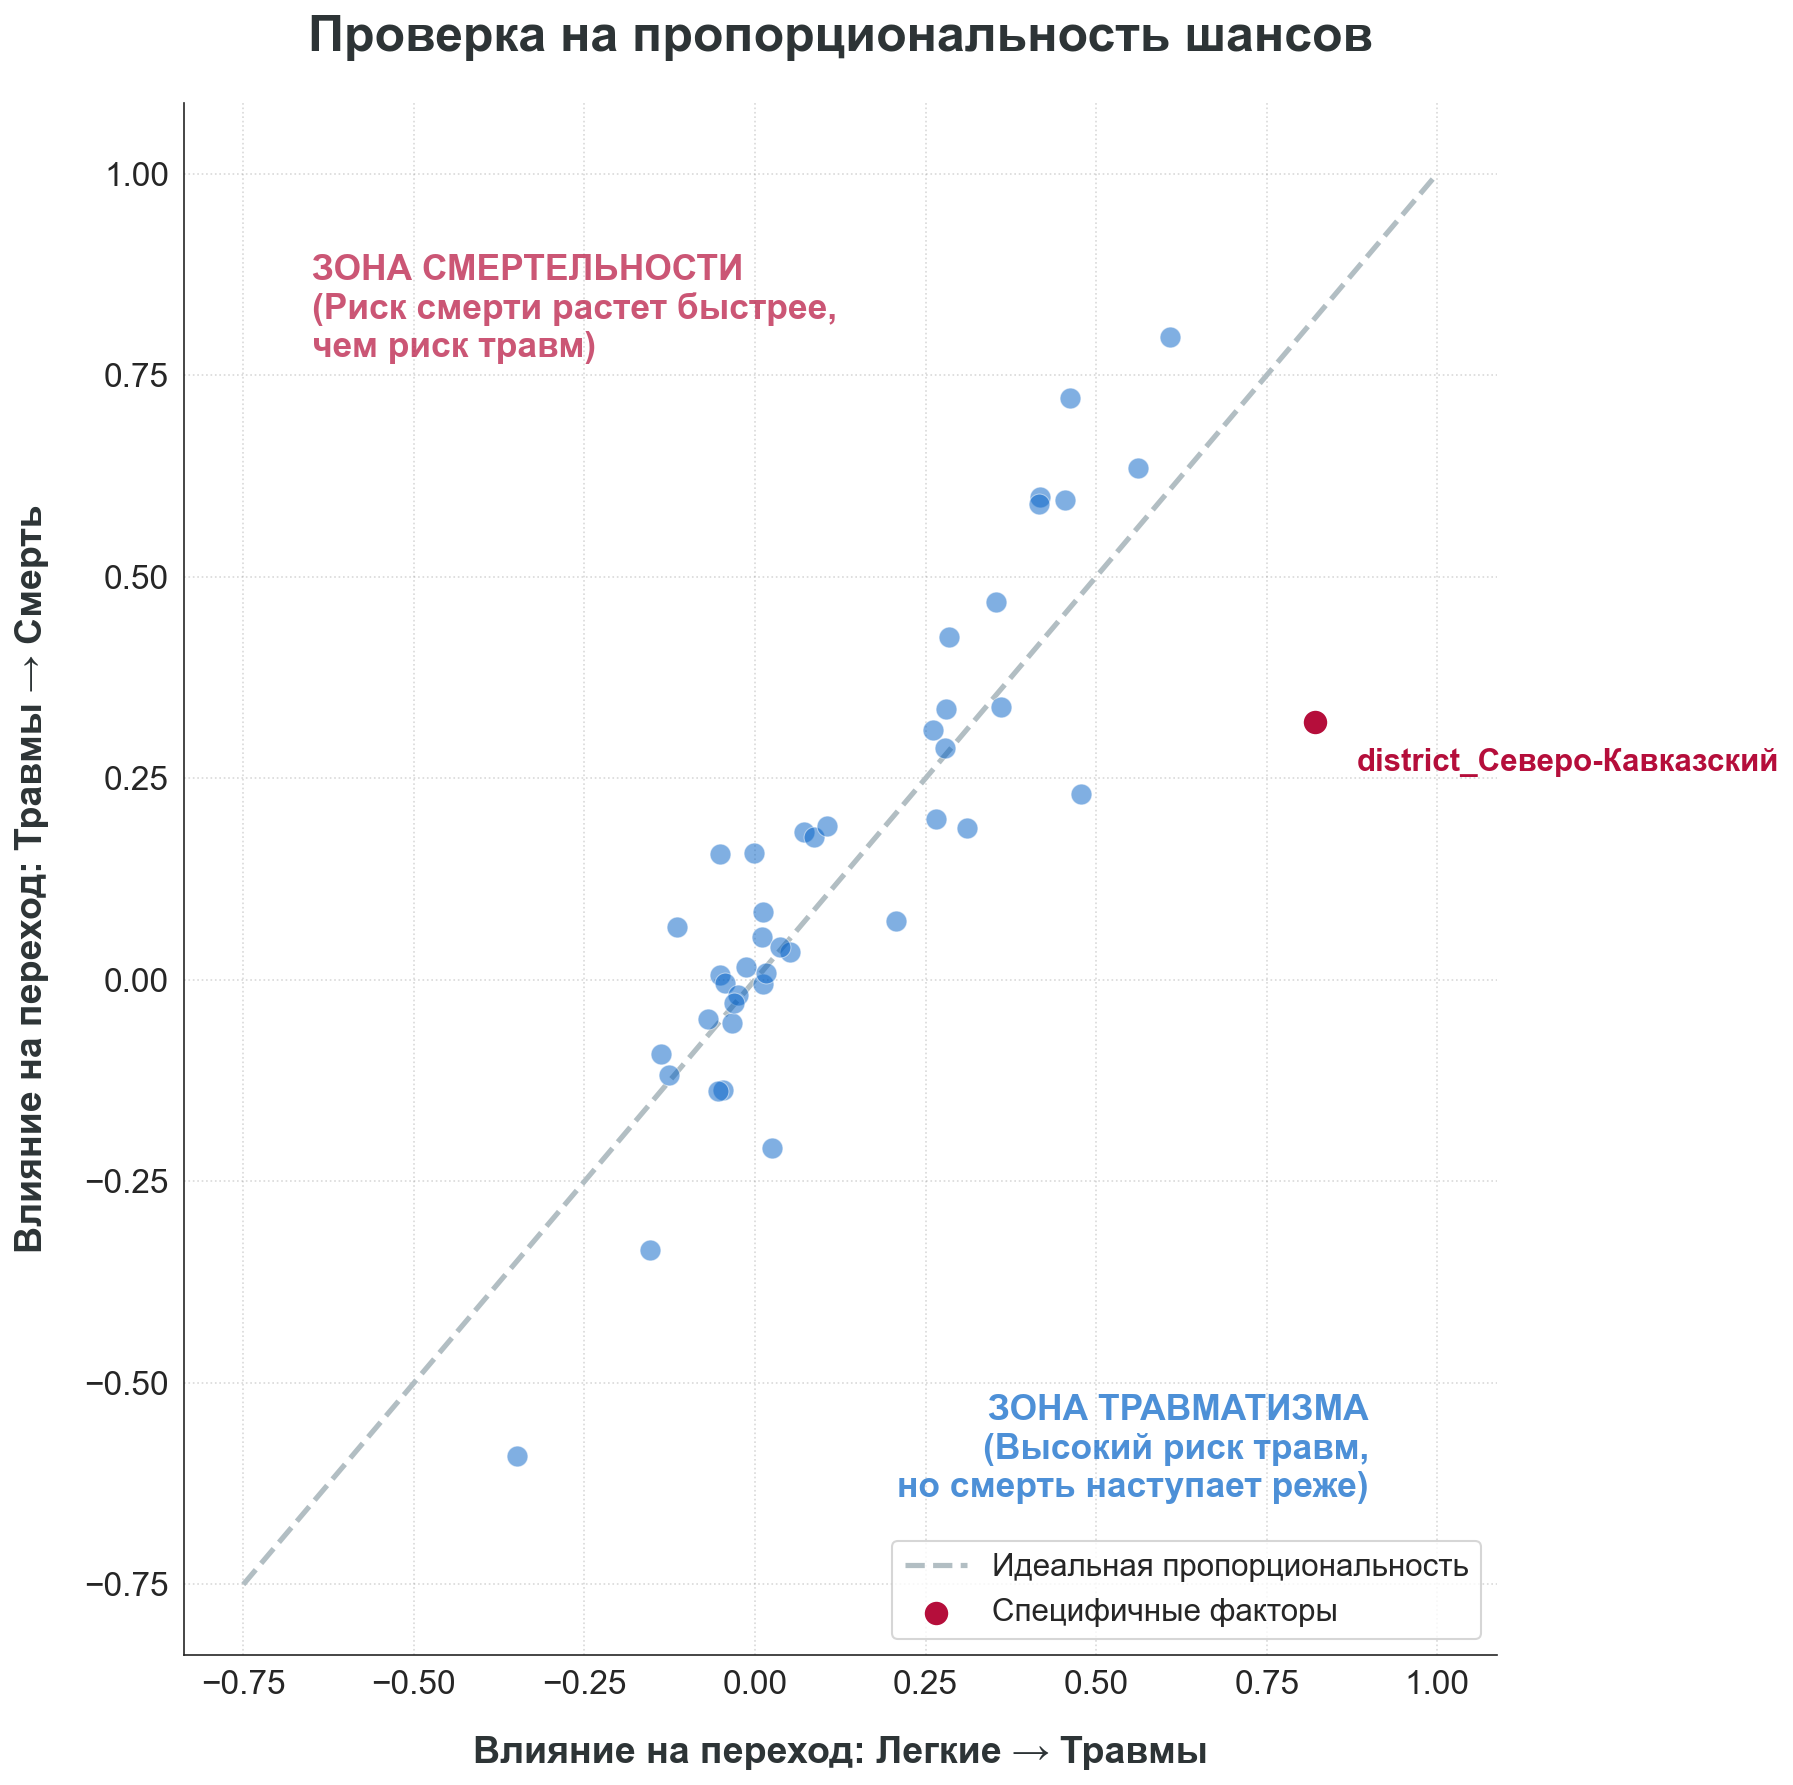

Коэфф (1 vs 2+3)  Коэфф (1+2 vs 3)   Разница
district_Северо-Кавказский          0.821361          0.319458  0.501903
wrong_way                           0.462329          0.722238  0.259909
district_Южный                      0.477841          0.229927  0.247914
female_driver                      -0.348171         -0.591082  0.242911
road_surface_cat_6                  0.024725         -0.209180  0.233905
road_defects_cat_4                 -0.050776          0.155795  0.206570
impaired_driving                    0.608675          0.796796  0.188121
road_defects_cat_7                  0.417215          0.599050  0.181835
district_Уральский                 -0.115036          0.065883  0.180919
road_surface_cat_1                 -0.154668         -0.334737  0.180070

In [26]:
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']

sns.set_style("white")

y_binary_1 = y.apply(lambda x: 0 if x == 1 else 1)

# Модель Б: Граница между {1,2} и 3
# "Отличает ли фактор Выживание (Легкие + Травмы) от Смерти?"
# 0 = Severity 1 или 2
# 1 = Severity 3
y_binary_2 = y.apply(lambda x: 0 if x <= 2 else 1)

# --- 2. Обучение двух обычных логистических регрессий ---

# Используем тот же X, что и для основной модели!
# class_weight='balanced' обязателен, так как смертельных случаев мало
print("Обучаем бинарную модель 1 (Легкие vs Травмы/Смерть)...")
model_1 = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')
model_1.fit(X, y_binary_1)

print("Обучаем бинарную модель 2 (Выживание vs Смерть)...")
model_2 = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')
model_2.fit(X, y_binary_2)

# --- 3. Сравнение коэффициентов ---

# Собираем все в один DataFrame
comparison_df = pd.DataFrame({
    'Коэфф (1 vs 2+3)': model_1.coef_[0],
    'Коэфф (1+2 vs 3)': model_2.coef_[0]
}, index=X.columns)

# Считаем разницу (по модулю)
comparison_df['Разница'] = (comparison_df['Коэфф (1 vs 2+3)'] - comparison_df['Коэфф (1+2 vs 3)']).abs()

# Сортируем: сверху те, кто сильнее всего нарушает правило
comparison_df = comparison_df.sort_values(by='Разница', ascending=False)

# 2. Данные (Те же, что и раньше)
threshold = 0.5
outliers = comparison_df[comparison_df['Разница'] > threshold].copy()
normals = comparison_df[comparison_df['Разница'] <= threshold].copy()

# 3. Фигура (Чуть больше, чтобы влез крупный текст)
plt.figure(figsize=(12, 12), dpi=150)

# 4. Диагональ
lims = [
    -0.75, 
    np.max([comparison_df.max().max(), 1])
]
plt.plot(lims, lims, color='#b2bec3', linestyle='--', linewidth=2.5, label='Идеальная пропорциональность', zorder=1)

# 5. Точки
sns.scatterplot(
    x=normals['Коэфф (1 vs 2+3)'], 
    y=normals['Коэфф (1+2 vs 3)'], 
    color='#0261C7', alpha=0.5, s=100, edgecolor='white', linewidth=0.5, zorder=2
)

sns.scatterplot(
    x=outliers['Коэфф (1 vs 2+3)'], 
    y=outliers['Коэфф (1+2 vs 3)'], 
    color='#B50E3B', alpha=1, s=150, edgecolor='white', linewidth=1, zorder=3, label='Специфичные факторы'
)

# 6. Подписи точек (КРУПНЕЕ)
for idx, row in outliers.iterrows():
    x_pos = row['Коэфф (1 vs 2+3)']
    y_pos = row['Коэфф (1+2 vs 3)']
    
    offset_x = 0.03 if x_pos < y_pos else 0.06
    offset_y = 0.03 if x_pos < y_pos else -0.06
    
    plt.text(
        x_pos + offset_x, 
        y_pos + offset_y, 
        idx, 
        fontsize=15,       # <--- Было 10, стало 13
        fontweight='bold', 
        color='#B50E3B',
        zorder=4
    )

# 7. Аннотации зон (КРУПНЕЕ)
plt.text(
    lims[0] + 0.1, lims[1] - 0.1, 
    "ЗОНА СМЕРТЕЛЬНОСТИ\n(Риск смерти растет быстрее,\nчем риск травм)", 
    fontsize=17,           # <--- Было 11, стало 15
    color='#B50E3B', alpha=0.7, ha='left', va='top', fontweight='bold'
)

plt.text(
    lims[1] - 0.1, lims[0] + 0.1, 
    "ЗОНА ТРАВМАТИЗМА\n(Высокий риск травм,\nно смерть наступает реже)", 
    fontsize=17,           # <--- Было 11, стало 15
    color='#0261C7', alpha=0.7, ha='right', va='bottom', fontweight='bold'
)

# 8. Оси и Заголовок (КРУПНЕЕ)
plt.xlabel('Влияние на переход: Легкие → Травмы', fontsize=18, fontweight='bold', color='#2d3436', labelpad=17)
plt.ylabel('Влияние на переход: Травмы → Смерть', fontsize=18, fontweight='bold', color='#2d3436', labelpad=17)
plt.title('Проверка на пропорциональность шансов', fontsize=24, fontweight='heavy', color='#2d3436', pad=25)

# Увеличиваем цифры на осях
plt.tick_params(axis='both', which='major', labelsize=16) 

# Сетка и рамки
plt.grid(True, linestyle=':', color='grey', alpha=0.3)
sns.despine()

# Легенда
plt.legend(frameon=True, loc='lower right', fontsize=15)

plt.tight_layout()
plt.show()

display(comparison_df.head(10))

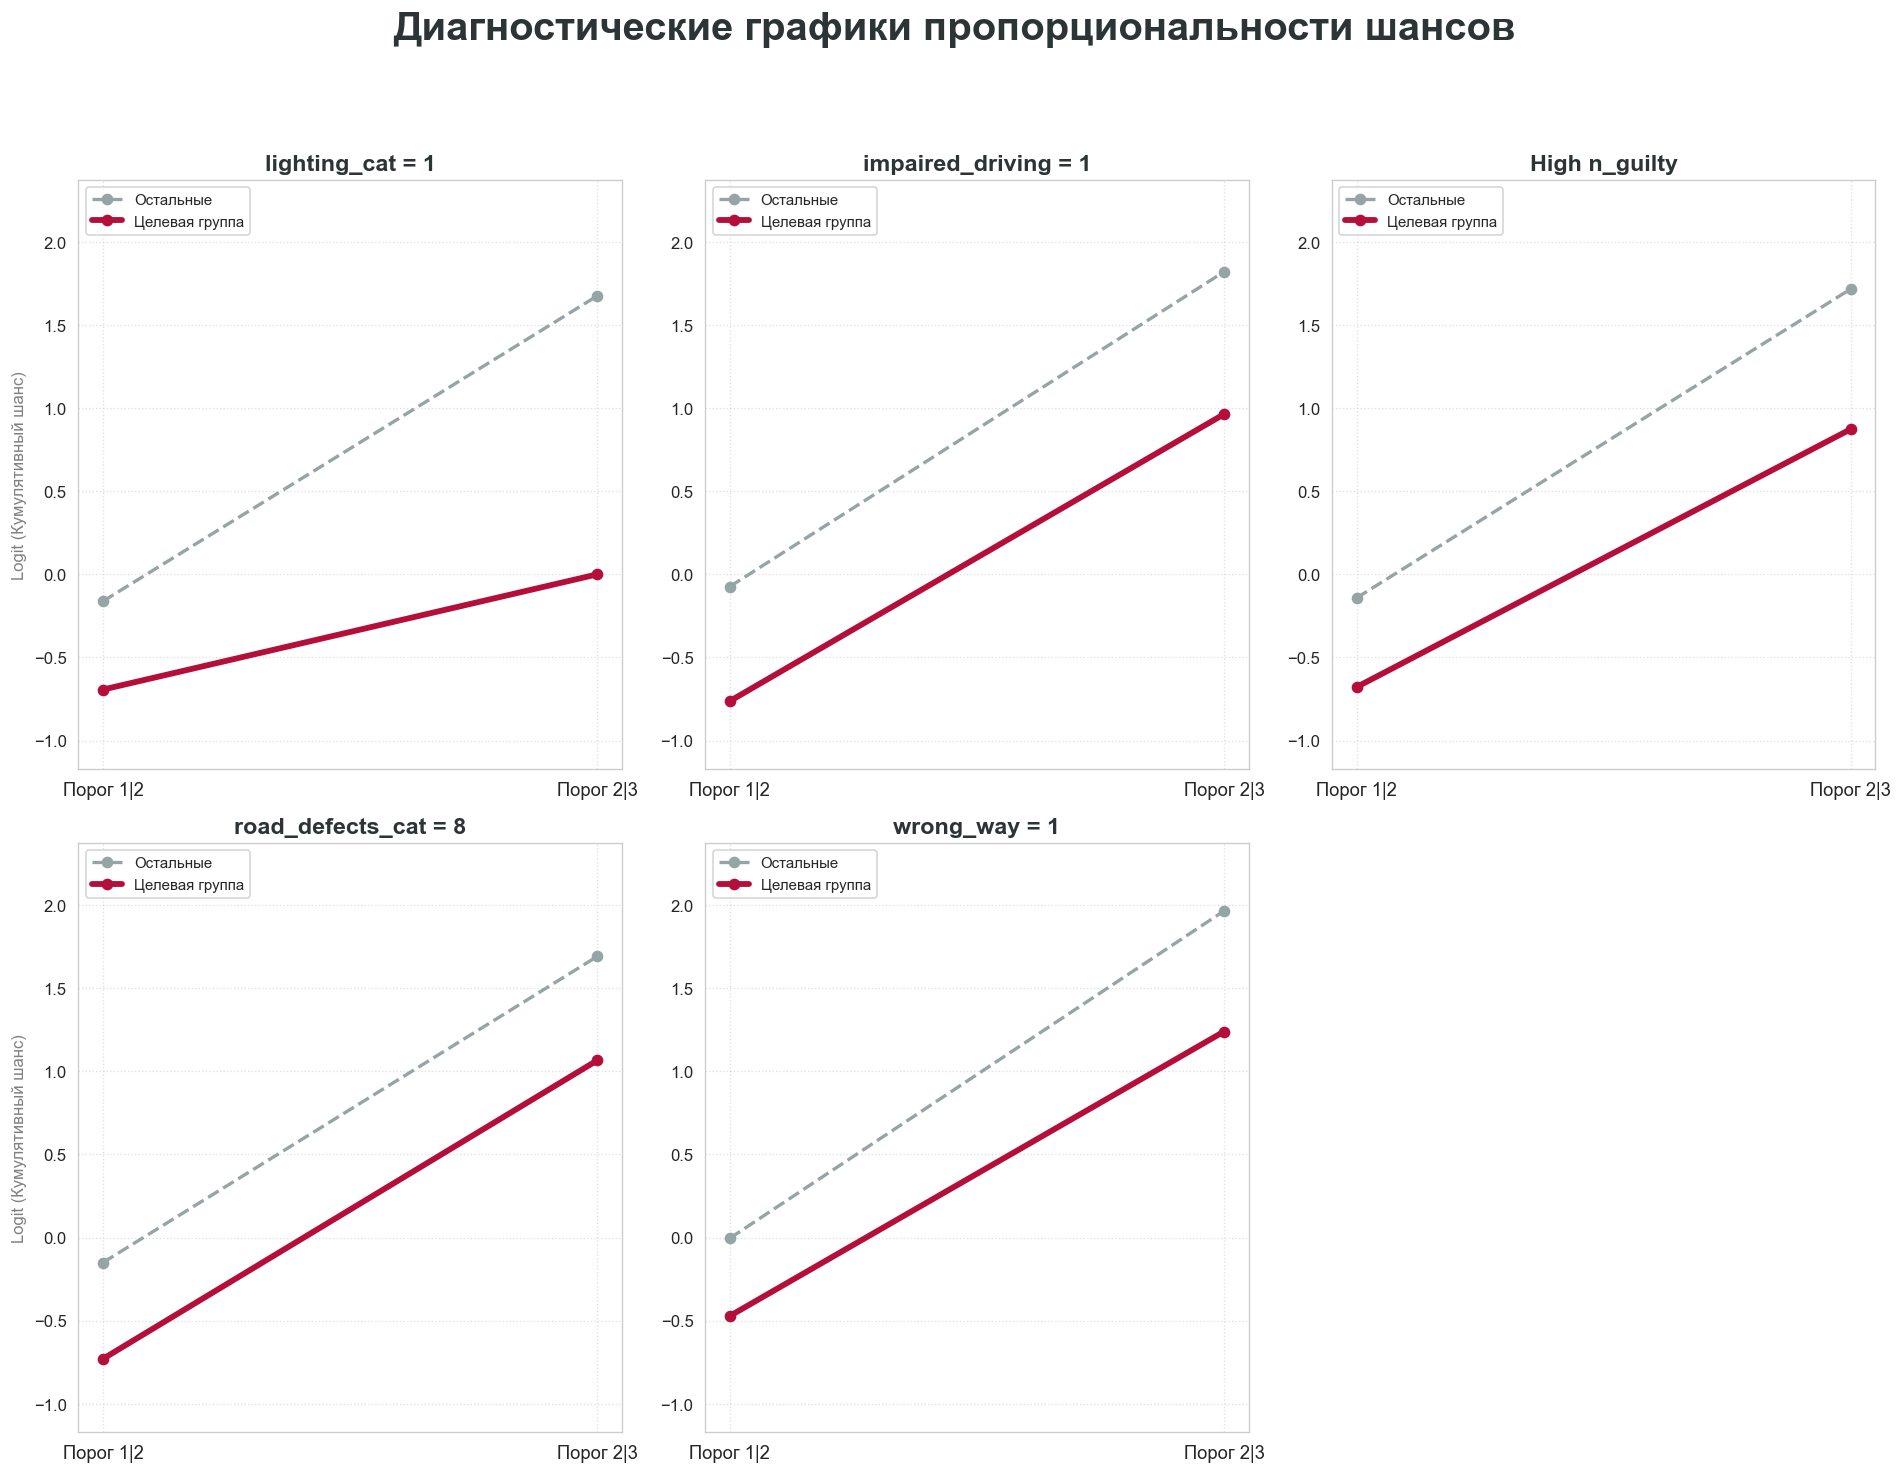

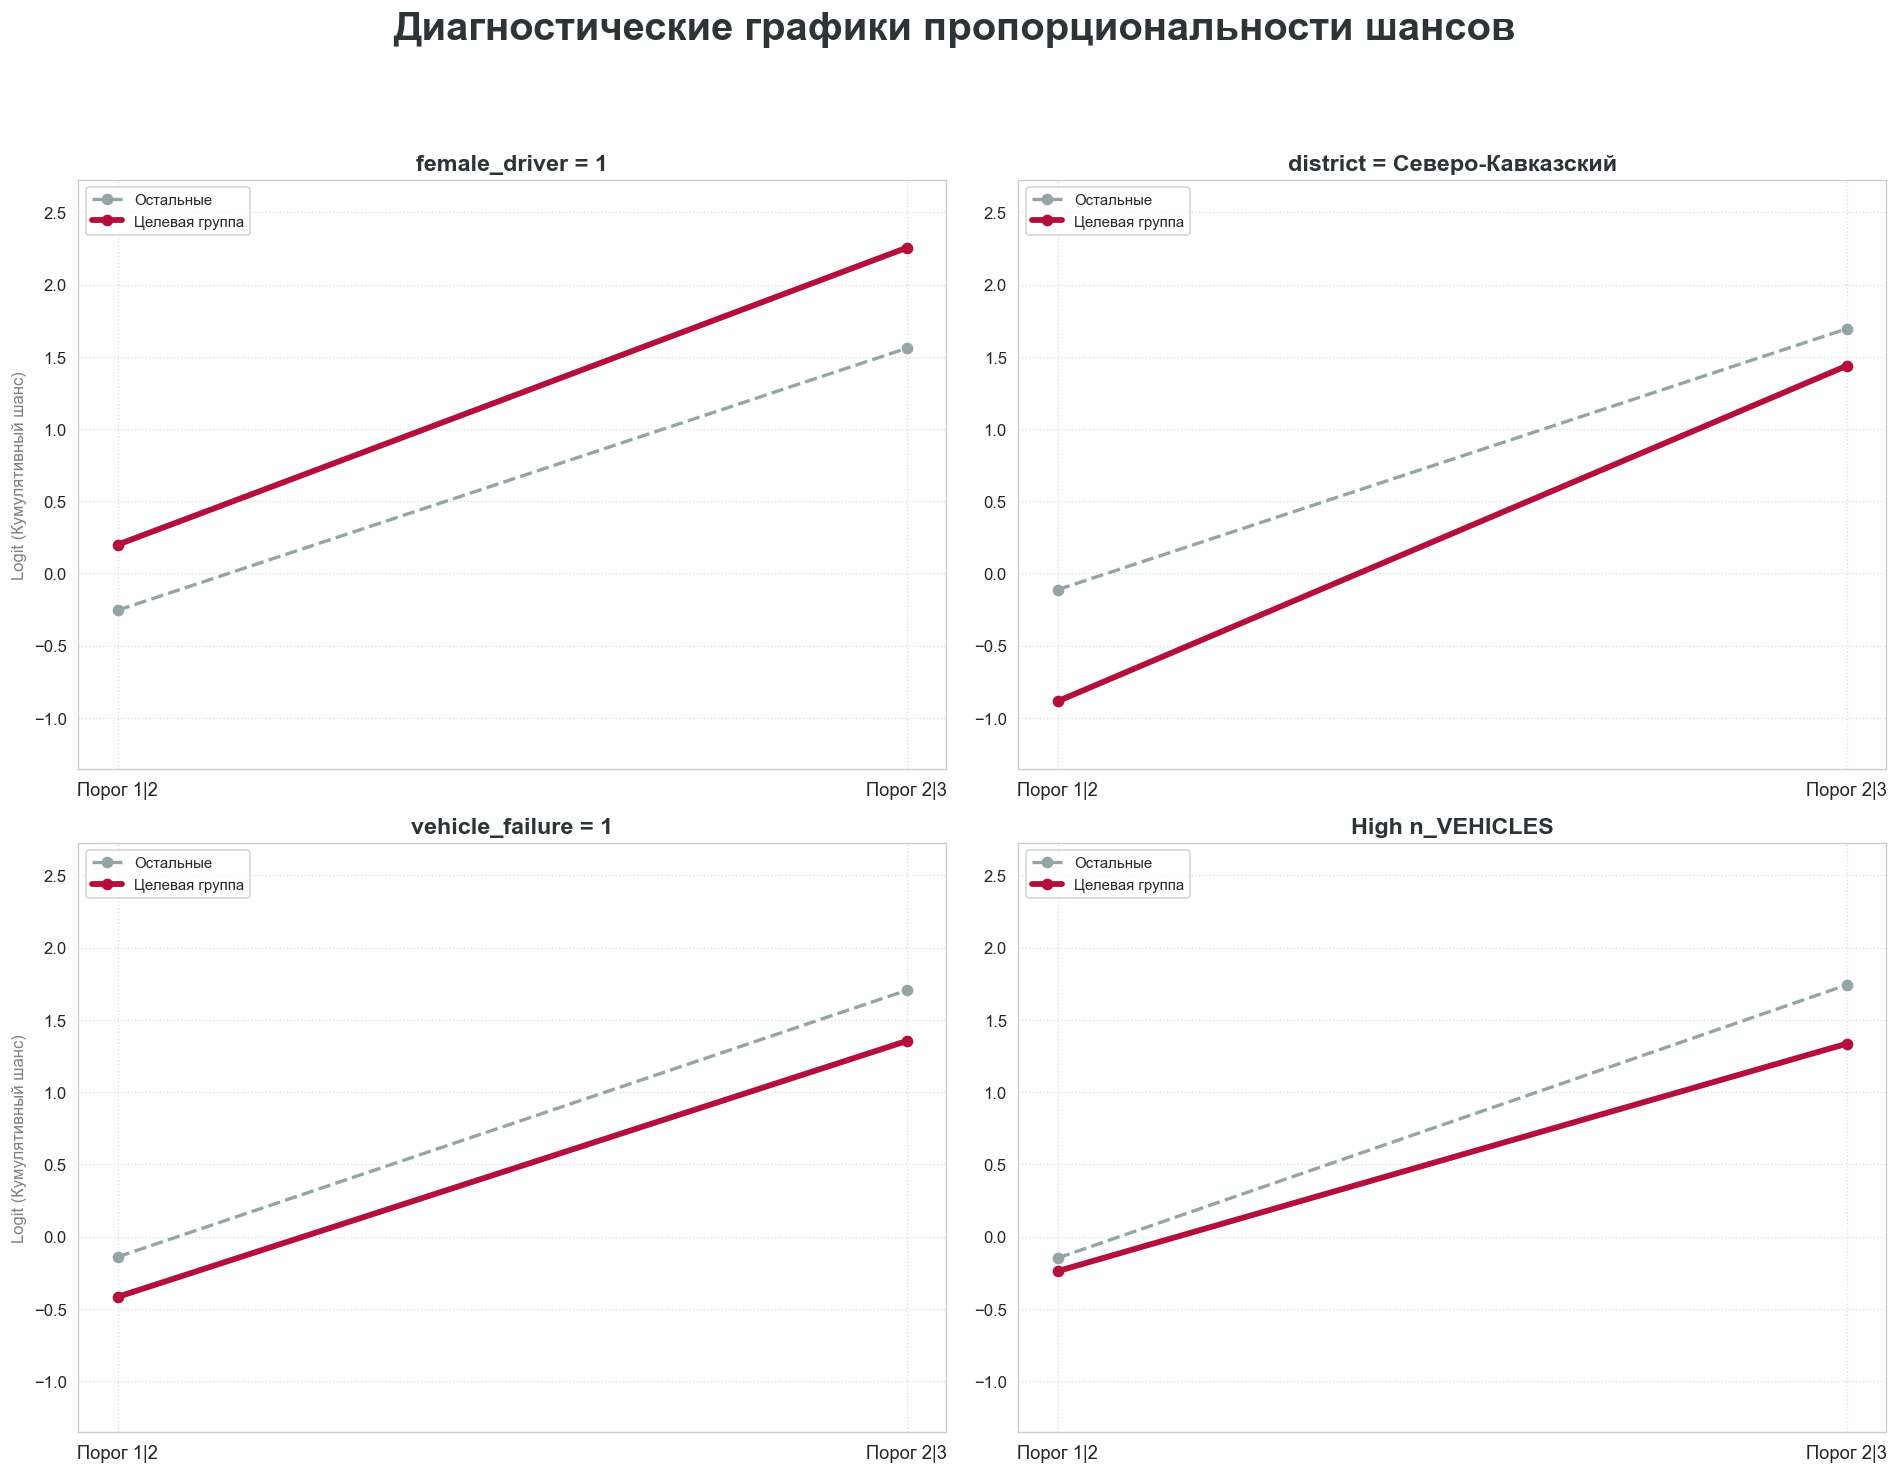

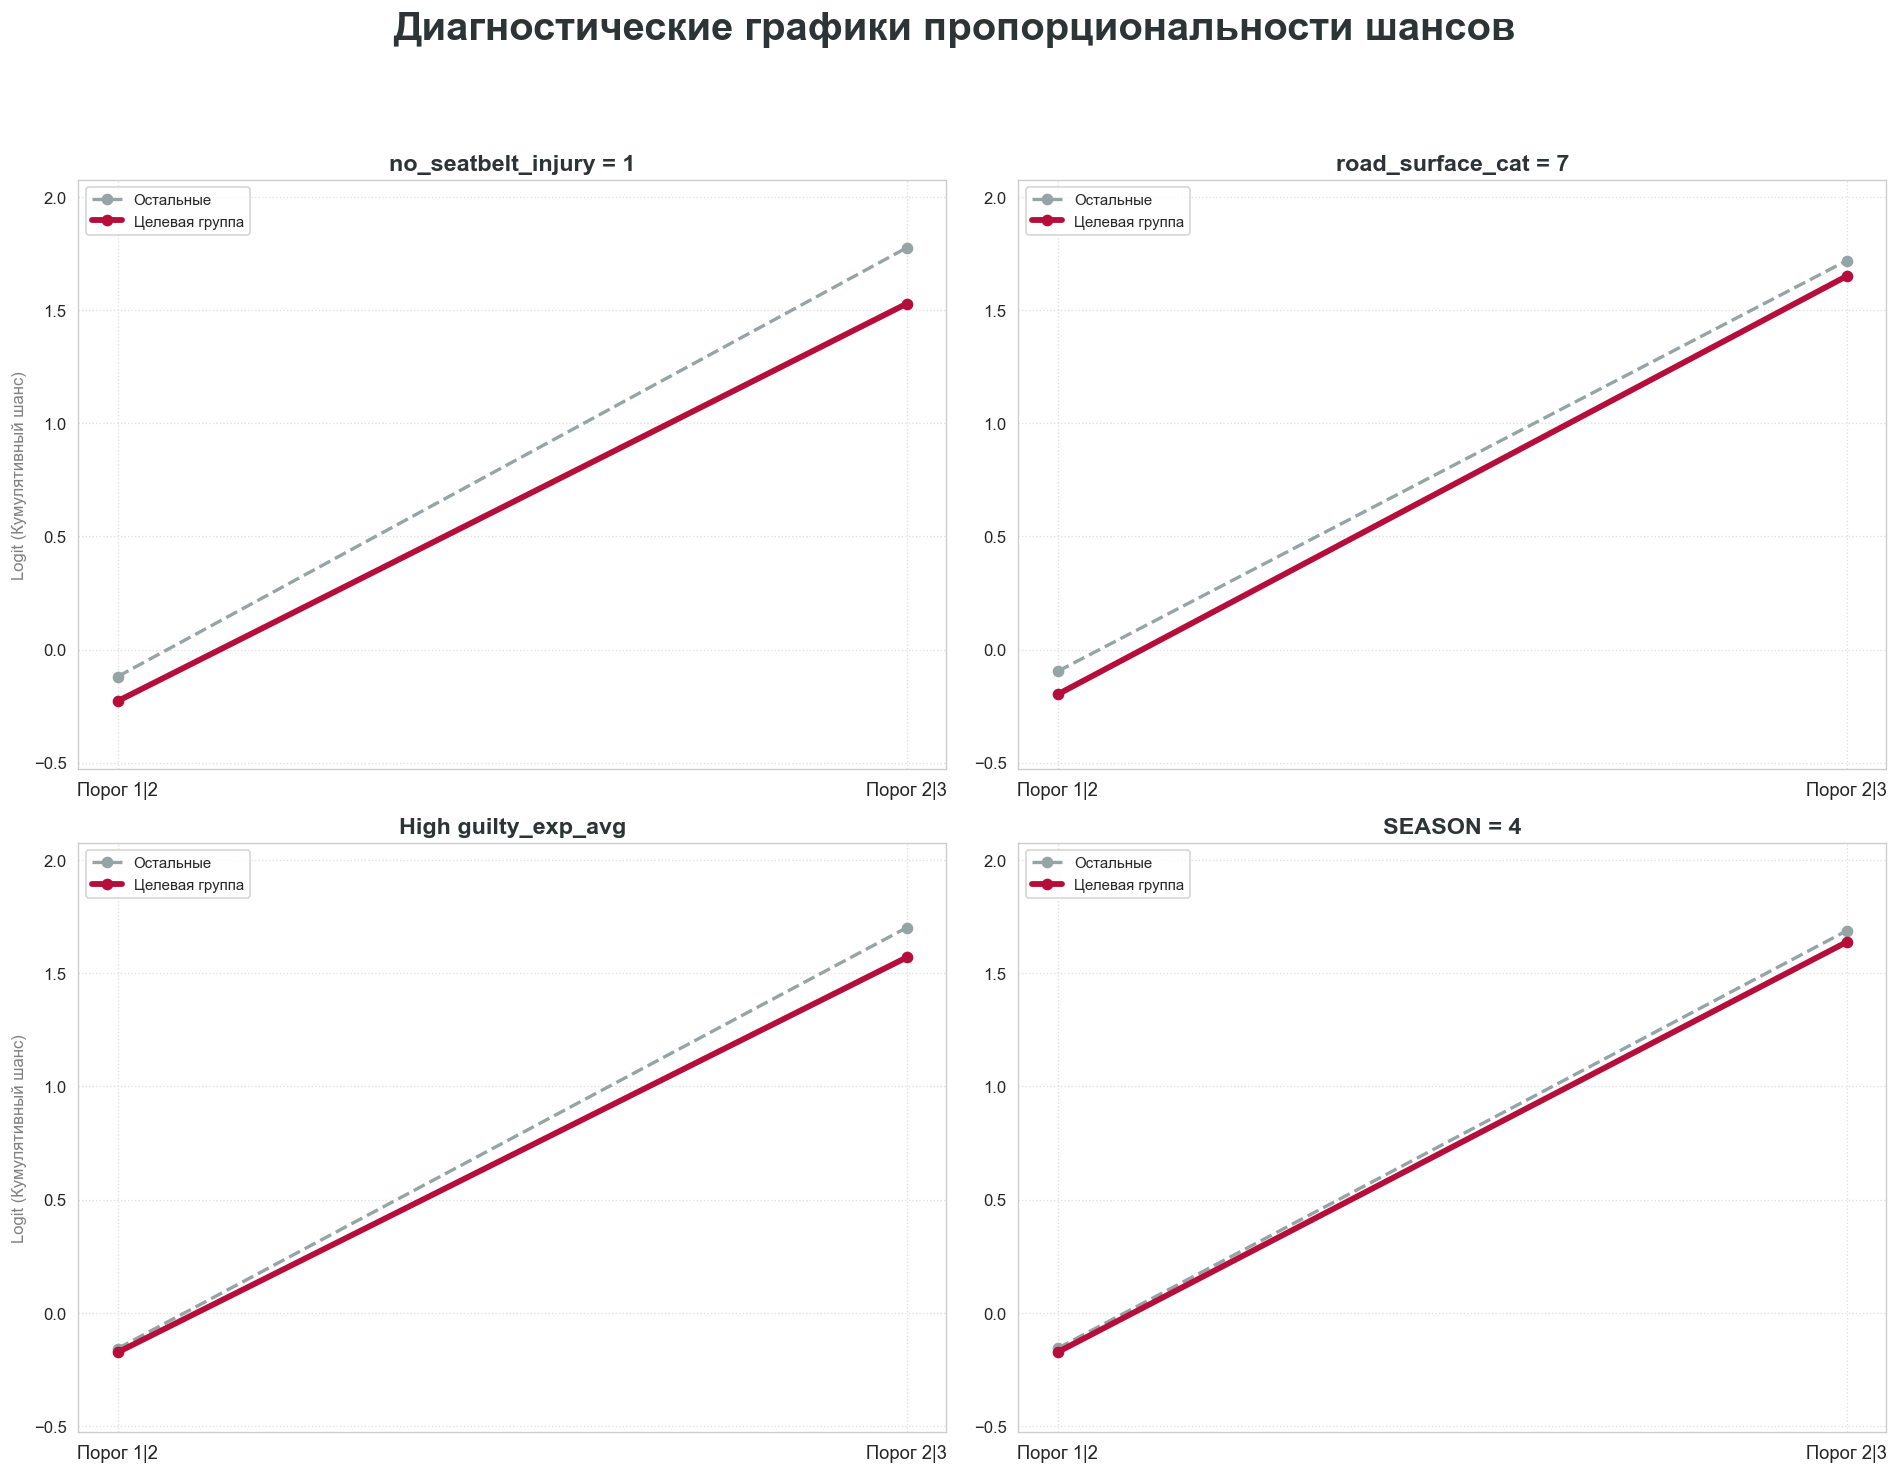

In [52]:
# --- 1. Настройки стиля ---
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']

sns.set_style("whitegrid")

# --- 2. Ваши переменные ---
categorical_cols = [
    'district', 'road_defects_cat', 
    'road_surface_cat', 'lighting_cat', 'SEASON'
]
numerical_cols = [
    'n_VEHICLES', 'n_guilty', 'guilty_exp_avg',
    'vehicle_failure', 'female_driver', 'no_seatbelt_injury', 
    'impaired_driving', 'wrong_way'
]
all_vars = numerical_cols + categorical_cols

# --- 3. Вспомогательные функции ---

def get_logits(subset):
    """Считает логиты для группы"""
    # P(Y <= 1)
    p1 = (subset['severity'] == 1).mean()
    # P(Y <= 2)
    p2 = (subset['severity'] <= 2).mean()
    
    # Защита от деления на ноль
    epsilon = 1e-3
    p1 = np.clip(p1, epsilon, 1 - epsilon)
    p2 = np.clip(p2, epsilon, 1 - epsilon)
    
    return np.array([np.log(p1 / (1 - p1)), np.log(p2 / (1 - p2))])

def find_intersection(y_base, y_target):
    """Находит координаты пересечения отрезков"""
    yb1, yb2 = y_base
    yt1, yt2 = y_target
    diff1 = yt1 - yb1
    diff2 = yt2 - yb2
    
    # Если знаки разные — было пересечение
    if np.sign(diff1) != np.sign(diff2) and diff1 != 0 and diff2 != 0:
        m_base = yb2 - yb1
        m_target = yt2 - yt1
        x_cross = 1 + (yb1 - yt1) / (m_target - m_base)
        y_cross = m_base * (x_cross - 1) + yb1
        return x_cross, y_cross
    return None

def analyze_variable(data, feature):
    """Анализирует переменную и готовит данные для графика"""
    # 1. Определяем "Опасную" группу и формируем ЧИТАЕМОЕ название
    if data[feature].nunique() == 2:
        target_mask = data[feature] == 1
        # Название: impaired_driving = 1
        label_title = f"{feature} = 1"
        
    elif feature in categorical_cols or data[feature].dtype == 'object':
        # Ищем категорию с макс. смертностью
        worst_cat = data.groupby(feature)['severity'].apply(lambda x: (x==3).mean()).idxmax()
        target_mask = data[feature] == worst_cat
        # Название: district = Южный
        label_title = f"{feature} = {worst_cat}"
        
    else:
        # Численные
        threshold = data[feature].quantile(0.8)
        target_mask = data[feature] > threshold
        # Название: High n_VEHICLES
        label_title = f"High {feature}"

    # 2. Считаем логиты
    l_base = get_logits(data[~target_mask])
    l_target = get_logits(data[target_mask])
    
    # 3. Метрика Gap (расстояние между линиями)
    gap = np.mean(np.abs(l_target - l_base))
    
    return {
        'var': feature,         # Исходное имя переменной
        'title': label_title,   # Красивый заголовок для графика
        'gap': gap,
        'logits_base': l_base,
        'logits_target': l_target
    }

# --- 4. Расчет и Сортировка ---
results = []
for var in all_vars:
    results.append(analyze_variable(df, var))

# Сортируем: Сначала большие разрывы (Group 1), в конце слипающиеся (Group 3)
sorted_results = sorted(results, key=lambda x: x['gap'], reverse=True)

# Делим на группы
group_1 = sorted_results[:5]      # Топ-5 (Далекие линии)
group_2 = sorted_results[5:9]    # Средние 5
group_3 = sorted_results[9:13]     # Боттом-4 (Близкие/Пересекающиеся)

# --- Обновленная функция с ЕДИНЫМ МАСШТАБОМ Y ---
def plot_clean_grid_shared_axis(group_data, title, desc, n_charts):
    
    # 1. Сначала вычисляем общие границы (min и max) для всей группы
    all_values = []
    for item in group_data:
        all_values.extend(item['logits_base'])
        all_values.extend(item['logits_target'])
    
    y_min_global = min(all_values)
    y_max_global = max(all_values)
    
    # Добавляем отступы сверху и снизу (10% от размаха), чтобы точки не прилипали к краям
    y_range = y_max_global - y_min_global
    margin = y_range * 0.15 
    ylim_shared = (y_min_global - margin, y_max_global + margin)
    
    # 2. Настройка сетки
    n_cols = 3 if n_charts > 4 else 2
    n_rows = int(np.ceil(n_charts / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows), dpi=120)
    axes = axes.flatten()
    
    for i, item in enumerate(group_data):
        ax = axes[i]
        
        y_base = item['logits_base']
        y_target = item['logits_target']
        
        # --- ПРИМЕНЯЕМ ЕДИНЫЙ МАСШТАБ ---
        ax.set_ylim(ylim_shared)
        
        # ЛИНИИ
        ax.plot([1, 2], y_base, color='#95a5a6', linestyle='--', linewidth=2, marker='o', label='Остальные')
        ax.plot([1, 2], y_target, color='#B50E3B', linestyle='-', linewidth=3.5, marker='o', label='Целевая группа')
        
        # ПЕРЕСЕЧЕНИЕ
        cross_point = find_intersection(y_base, y_target)
        if cross_point:
            cx, cy = cross_point
            
            # Жирная красная точка
            ax.plot(cx, cy, marker='o', markersize=14, color='#B50E3B', zorder=10)
            
            # Надпись КАПСОМ
            # Считаем отступ относительно общего масштаба, чтобы текст не прыгал
            text_offset_y = (ylim_shared[1] - ylim_shared[0]) * 0.05
            
            ax.text(cx - 0.08, cy + text_offset_y, "ПЕРЕСЕЧЕНИЕ", 
                    color='#B50E3B', fontsize=11, fontweight='black', 
                    ha='center', va='bottom', zorder=11)

        # ОФОРМЛЕНИЕ
        ax.set_title(item['title'], fontsize=14, fontweight='bold', color='#2d3436')
        
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['Порог 1|2', 'Порог 2|3'], fontsize=11)
        
        # Подпись оси Y только слева (но цифры оставляем везде для удобства)
        if i % n_cols == 0:
            ax.set_ylabel('Logit (Кумулятивный шанс)', fontsize=10, color='gray')
            
        ax.grid(True, linestyle=':', alpha=0.6)
        
        # Легенда
        ax.legend(fontsize=9, loc='upper left', frameon=True)

    # Удаляем пустые графики
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.suptitle(f"{title}\n{desc}", fontsize=24, fontweight='heavy', y=1.02, color='#2d3436')
    plt.tight_layout()
    plt.show()
# --- ЗАПУСК ПО ГРУППАМ ---

# Группа 1: Сильное влияние (Линии далеко)
plot_clean_grid_shared_axis(group_1, 
                "Диагностические графики пропорциональности шансов", 
                "", 
                5)

# Группа 2: Умеренное влияние
plot_clean_grid_shared_axis(group_2, 
                "Диагностические графики пропорциональности шансов", 
                "", 
                4)

# Группа 3: Близкие линии / Пересечения
plot_clean_grid_shared_axis(group_3, 
                "Диагностические графики пропорциональности шансов", 
                "", 
                4)

## Обучение модели

In [29]:
X = X.astype(float)
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs', disp=False)

print(res.summary())

                             OrderedModel Results                             
Dep. Variable:               severity   Log-Likelihood:            -4.1057e+05
Model:                   OrderedModel   AIC:                         8.212e+05
Method:            Maximum Likelihood   BIC:                         8.217e+05
Date:                Mon, 15 Dec 2025                                         
Time:                        20:47:08                                         
No. Observations:              419576                                         
Df Residuals:                  419531                                         
Df Model:                          43                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
n_VEHICLES                     0.0415      0.003     13.587      0.000       0.036       0.048
n_gu

## Отображение результатов

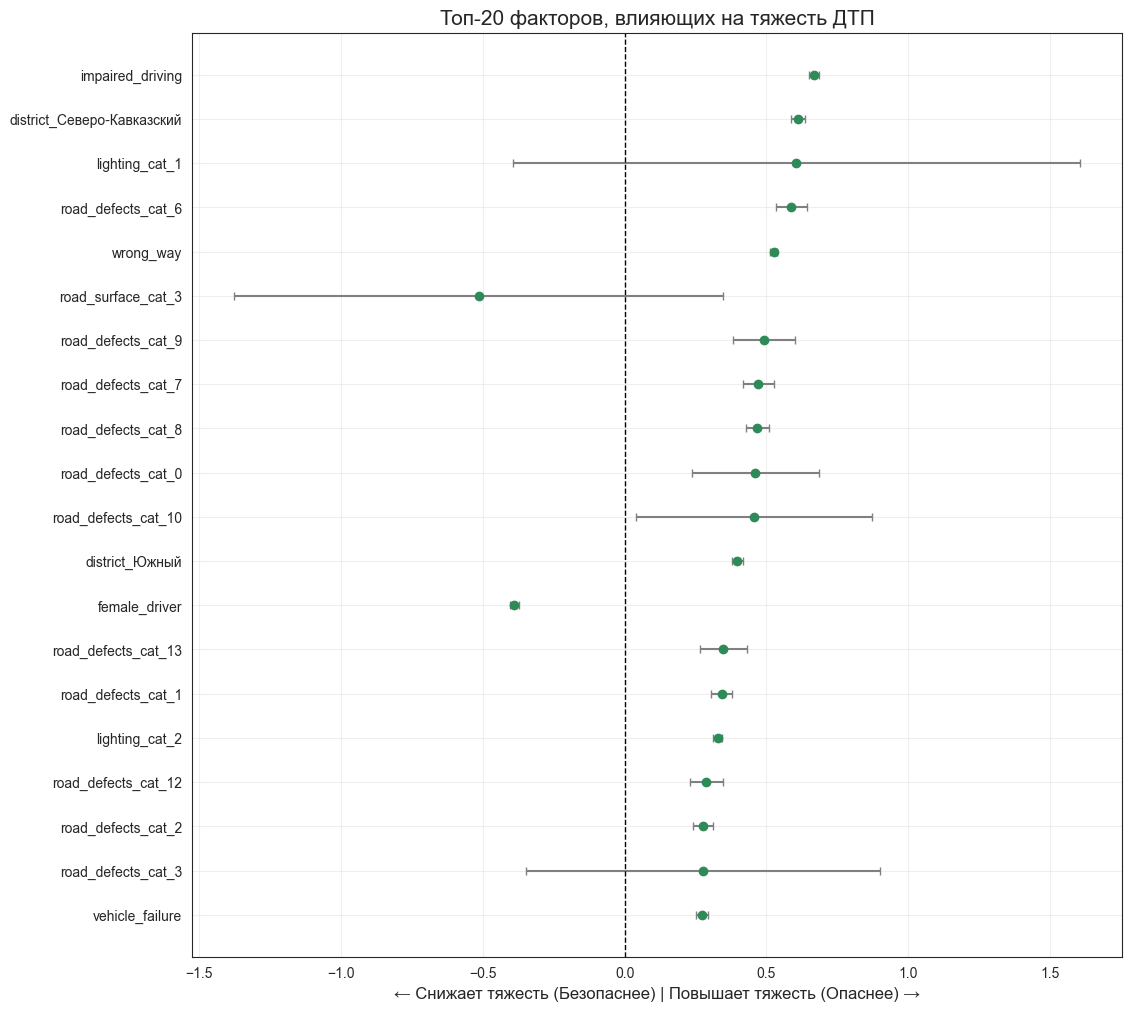


🔥 ТОП-5 Факторов, ПОВЫШАЮЩИХ риск тяжких последствий:
                            Odds_Ratio
impaired_driving              1.950499
district_Северо-Кавказский    1.840937
lighting_cat_1                1.832033
road_defects_cat_6            1.799826
wrong_way                     1.690238

🛡️ ТОП-5 Факторов, СНИЖАЮЩИХ риск (делают ДТП легче):
                          Odds_Ratio
road_surface_cat_3          0.597858
female_driver               0.677555
road_surface_cat_1          0.820100
district_Северо-Западный    0.880530
district_Дальневосточный    0.883222


In [30]:
num_thresholds = len(y.unique()) - 1
params = res.params[:-num_thresholds]
conf = res.conf_int().iloc[:-num_thresholds]
conf.columns = ['Lower', 'Upper']

results_df = pd.DataFrame({
    'coef': params,
    'lower': conf['Lower'],
    'upper': conf['Upper']
})

# Считаем Odds Ratio
results_df['Odds_Ratio'] = np.exp(results_df['coef'])

# --- ГРАФИК: Топ-20 самых влиятельных факторов ---
# Сортируем по модулю коэффициента (самые сильные отклонения в любую сторону)
results_df['abs_coef'] = results_df['coef'].abs()
top_factors = results_df.sort_values(by='abs_coef', ascending=True).tail(20)

plt.figure(figsize=(12, 12))

# Рисуем
plt.errorbar(
    top_factors['coef'], 
    top_factors.index, 
    xerr=[top_factors['coef'] - top_factors['lower'], 
          top_factors['upper'] - top_factors['coef']],
    fmt='o', color='#2E8B57', ecolor='gray', capsize=3
)

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.title('Топ-20 факторов, влияющих на тяжесть ДТП', fontsize=15)
plt.xlabel('← Снижает тяжесть (Безопаснее) | Повышает тяжесть (Опаснее) →', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# --- Вывод Топ-5 Опасных и Безопасных ---
print("\n🔥 ТОП-5 Факторов, ПОВЫШАЮЩИХ риск тяжких последствий:")
print(results_df.sort_values(by='Odds_Ratio', ascending=False)[['Odds_Ratio']].head(5))

print("\n🛡️ ТОП-5 Факторов, СНИЖАЮЩИХ риск (делают ДТП легче):")
print(results_df.sort_values(by='Odds_Ratio', ascending=True)[['Odds_Ratio']].head(5))

In [31]:
num_thresholds = len(y.unique()) - 1
params = res.params[:-num_thresholds]
conf = res.conf_int().iloc[:-num_thresholds]
conf.columns = ['Lower_Coef', 'Upper_Coef']
pvalues = res.pvalues[:-num_thresholds]

# 2. Собираем DataFrame
eval_df = pd.DataFrame({
    'Coef': params,
    'P-value': pvalues,
    'Lower_Coef': conf['Lower_Coef'],
    'Upper_Coef': conf['Upper_Coef']
})

# 3. Переводим в Odds Ratio (Отношение шансов)
# Это понятнее: "Риск выше в X раз"
eval_df['OR'] = np.exp(eval_df['Coef'])
eval_df['OR_Lower'] = np.exp(eval_df['Lower_Coef']) # Нижняя граница риска (в разах)
eval_df['OR_Upper'] = np.exp(eval_df['Upper_Coef']) # Верхняя граница риска (в разах)

# 4. Считаем ширину интервала (меру неопределенности)
eval_df['Uncertainty'] = eval_df['OR_Upper'] - eval_df['OR_Lower']

# 5. Категоризация значимости
def get_status(row):
    if row['P-value'] > 0.05:
        return '❌ Мусор (Незначимо)'
    # Если интервал пересекает 1.0 (для OR), это тоже незначимо, но P-value это уже отловил
    return '✅ Значимо'

eval_df['Status'] = eval_df.apply(get_status, axis=1)

# Сортируем по силе влияния (Odds Ratio)
eval_df = eval_df.sort_values(by='OR', ascending=False)

# Выводим Топ факторов с интервалами
print("Таблица влияния с учетом доверительных интервалов:")
# Показываем только значимые
display(eval_df[eval_df['Status'] == '✅ Значимо'][['OR', 'OR_Lower', 'OR_Upper', 'Uncertainty']].head(10))

Таблица влияния с учетом доверительных интервалов:


OR  OR_Lower  OR_Upper  Uncertainty
impaired_driving            1.950499  1.916682  1.984913     0.068231
district_Северо-Кавказский  1.840937  1.796289  1.886694     0.090405
road_defects_cat_6          1.799826  1.703204  1.901929     0.198724
wrong_way                   1.690238  1.669246  1.711494     0.042249
road_defects_cat_9          1.634395  1.462610  1.826356     0.363746
road_defects_cat_7          1.601111  1.516480  1.690466     0.173985
road_defects_cat_8          1.596914  1.533250  1.663221     0.129971
road_defects_cat_0          1.584712  1.267451  1.981388     0.713937
road_defects_cat_10         1.577737  1.041736  2.389527     1.347791
district_Южный              1.488351  1.458997  1.518294     0.059297

In [78]:
summary_df = pd.DataFrame({
    'Коэффициент (Log-Odds)': res.params.round(3)[:-2],
    'P-value': res.pvalues.round(3)[:-2],
    'Odds Ratio (Шансы)': np.exp(res.params[:-2]) # Экспонента от коэффициента
})

# 2. Добавляем столбец с "человеческим" вердиктом о значимости
summary_df['Значимо?'] = summary_df['P-value'].apply(lambda x: '✅ ДА' if x < 0.05 else '❌ нет')
    
# 3. Сортируем по убыванию коэффициента (сверху самые опасные, снизу самые безопасные)
summary_df = summary_df.sort_values(by='Коэффициент (Log-Odds)', ascending=False)

summary_df.to_csv('sex.csv')


In [79]:
summary_df

Коэффициент (Log-Odds)  P-value  \
impaired_driving                             0.668    0.000   
district_Северо-Кавказский                   0.610    0.000   
lighting_cat_1                               0.605    0.235   
road_defects_cat_6                           0.588    0.000   
wrong_way                                    0.525    0.000   
road_defects_cat_9                           0.491    0.000   
road_defects_cat_7                           0.471    0.000   
road_defects_cat_8                           0.468    0.000   
road_defects_cat_0                           0.460    0.000   
road_defects_cat_10                          0.456    0.031   
district_Южный                               0.398    0.000   
road_defects_cat_13                          0.348    0.000   
road_defects_cat_1                           0.342    0.000   
lighting_cat_2                               0.328    0.000   
road_defects_cat_12                          0.287    0.000   
road_defects_cat_2                           0.276    0.000   
road_defects_cat_3                           0.276    0.386   
vehicle_failure                              0.274    0.000   
road_defects_cat_14                          0.241    0.000   
road_defects_cat_11                          0.224    0.000   
n_guilty                                     0.131    0.000   
lighting_cat_4                               0.113    0.000   
no_seatbelt_injury                           0.105    0.000   
district_Сибирский                           0.044    0.000   
n_VEHICLES                                   0.042    0.000   
guilty_exp_avg                               0.022    0.000   
road_defects_cat_4                           0.010    0.919   
road_surface_cat_2                           0.009    0.267   
SEASON_4                                    -0.006    0.441   
road_surface_cat_4                          -0.029    0.022   
road_surface_cat_6                          -0.035    0.485   
SEASON_2                                    -0.038    0.000   
SEASON_1                                    -0.039    0.000   
lighting_cat_3                              -0.041    0.000   
road_surface_cat_0                          -0.060    0.029   
district_Приволжский                        -0.064    0.000   
district_Уральский                          -0.072    0.000   
road_surface_cat_5                          -0.092    0.187   
district_Дальневосточный                    -0.124    0.000   
district_Северо-Западный                    -0.127    0.000   
road_surface_cat_1                          -0.198    0.000   
female_driver                               -0.389    0.000   
road_surface_cat_3                          -0.514    0.242   

                            Odds Ratio (Шансы) Значимо?  
impaired_driving                      1.950499     ✅ ДА  
district_Северо-Кавказский            1.840937     ✅ ДА  
lighting_cat_1                        1.832033    ❌ нет  
road_defects_cat_6                    1.799826     ✅ ДА  
wrong_way                             1.690238     ✅ ДА  
road_defects_cat_9                    1.634395     ✅ ДА  
road_defects_cat_7                    1.601111     ✅ ДА  
road_defects_cat_8                    1.596914     ✅ ДА  
road_defects_cat_0                    1.584712     ✅ ДА  
road_defects_cat_10                   1.577737     ✅ ДА  
district_Южный                        1.488351     ✅ ДА  
road_defects_cat_13                   1.415849     ✅ ДА  
road_defects_cat_1                    1.407677     ✅ ДА  
lighting_cat_2                        1.387678     ✅ ДА  
road_defects_cat_12                   1.333023     ✅ ДА  
road_defects_cat_2                    1.317847     ✅ ДА  
road_defects_cat_3                    1.317477    ❌ нет  
vehicle_failure                       1.314658     ✅ ДА  
road_defects_cat_14                   1.272374     ✅ ДА  
road_defects_cat_11                   1.251563     ✅ ДА  
n_guilty                             

### Обработанные результаты

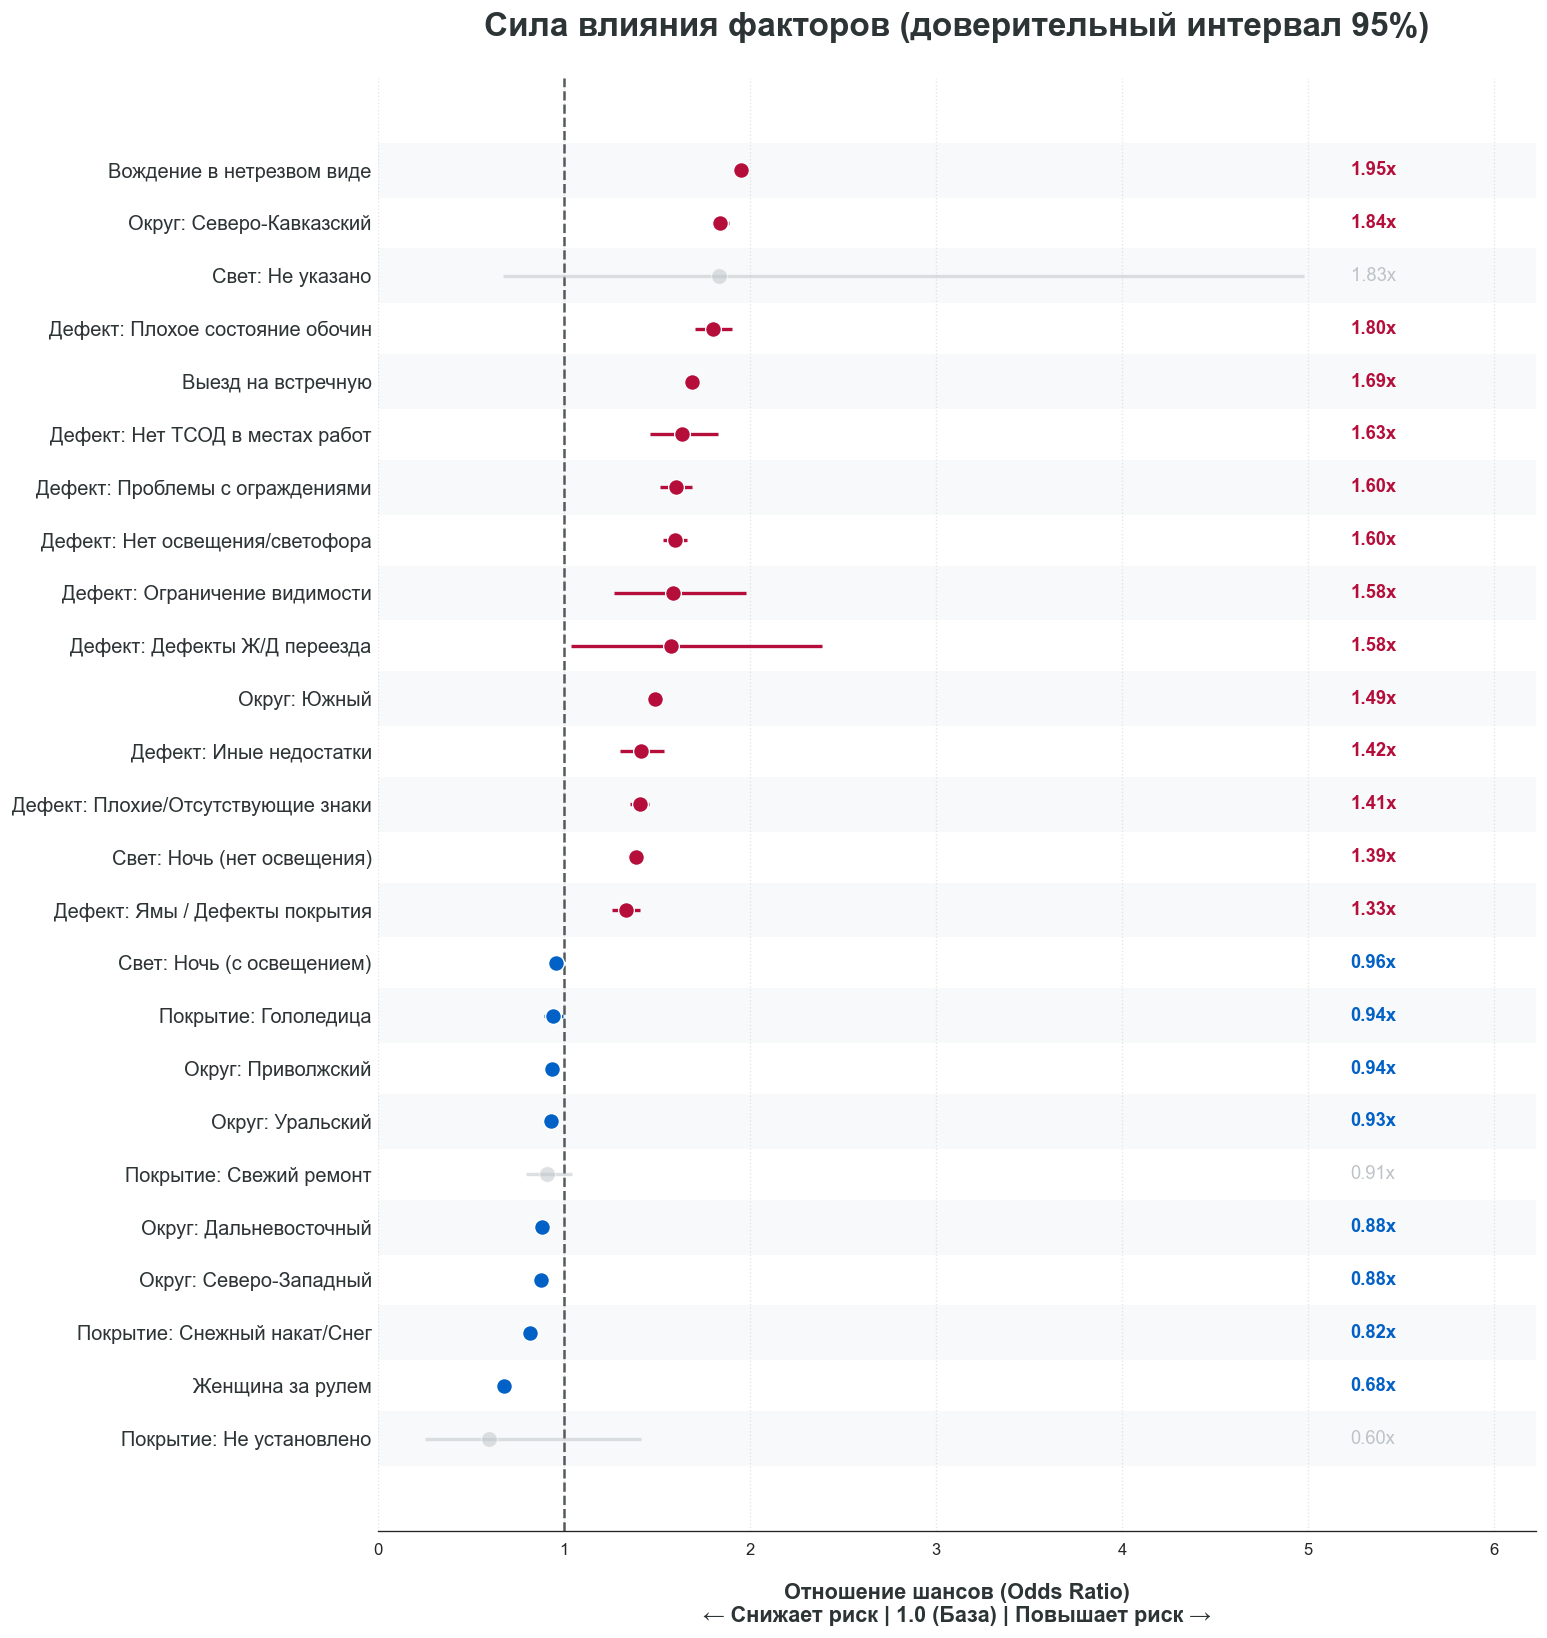

In [41]:
# --- 1. СЛОВАРИ И ПЕРЕВОД ---

# Свет (по порядку LabelEncoder: День, Не указано, Ночь без, Ночь с, Сумерки)
lighting_d = {
    0: 'День', 
    1: 'Не указано', 
    2: 'Ночь (нет освещения)', 
    3: 'Ночь (с освещением)', 
    4: 'Сумерки'
}

# Покрытие
surface_d = {
    0: 'Гололедица', 
    1: 'Снежный накат/Снег', 
    2: 'Мокрое',
    3: 'Не установлено', 
    4: 'Обработано реагентами',
    5: 'Свежий ремонт', 
    6: 'Грязное/Пыльное', 
    7: 'Сухое'
}

# Дефекты (сократил до сути, чтобы влезло на график)
road_defects_d = {
    0: 'Ограничение видимости',
    1: 'Плохие/Отсутствующие знаки',
    2: 'Плохая зимняя уборка',
    3: 'Проблемы с люками/ливневкой',
    4: 'Нарушения рекламы',
    5: 'Нет дефектов / Не уст.',
    6: 'Плохое состояние обочин',
    7: 'Проблемы с ограждениями',
    8: 'Нет освещения/светофора',
    9: 'Нет ТСОД в местах работ',
    10: 'Дефекты Ж/Д переезда',
    11: 'Нет тротуаров/остановок',
    12: 'Ямы / Дефекты покрытия',
    13: 'Иные недостатки',
    14: 'Разметка не соотв. требованиям'
}

# Прочие переменные
static_map = {
    'impaired_driving': 'Вождение в нетрезвом виде',
    'wrong_way': 'Выезд на встречную',
    'female_driver': 'Женщина за рулем',
    'vehicle_failure': 'Техническая неисправность',
    'no_seatbelt_injury': 'Непристегнутый ремень',
    'n_guilty': 'Кол-во виновников',
    'n_VEHICLES': 'Кол-во машин',
    'guilty_exp_avg': 'Стаж водителя'
}

def get_readable_label(raw_name):
    # 1. Статические имена
    if raw_name in static_map:
        return static_map[raw_name]
    
    # 2. Округа
    if 'district_' in raw_name:
        return f"Округ: {raw_name.replace('district_', '')}"
    
    # 3. Сезоны
    if 'SEASON_' in raw_name:
        seasons = {'1': 'Зима', '2': 'Весна', '3': 'Лето', '4': 'Осень'}
        val = raw_name.split('_')[-1]
        return f"Сезон: {seasons.get(val, val)}"

    # 4. Категории с номерами
    try:
        val = int(raw_name.split('_')[-1])
        
        if 'road_defects_cat' in raw_name:
            return f"Дефект: {road_defects_d.get(val, str(val))}"
        
        if 'lighting_cat' in raw_name:
            return f"Свет: {lighting_d.get(val, str(val))}"
            
        if 'road_surface_cat' in raw_name:
            return f"Покрытие: {surface_d.get(val, str(val))}"
            
        if 'road_category' in raw_name:
            return f"Категория дороги: {val}"
            
    except:
        return raw_name
        
    return raw_name

# --- 2. ПОДГОТОВКА ДАННЫХ ---

try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']

sns.set_style("white")

# Вытаскиваем данные из модели
num_thresholds = len(df['severity'].unique()) - 1
params = res.params[:-num_thresholds]
conf = res.conf_int().iloc[:-num_thresholds]
conf.columns = ['Lower_Log', 'Upper_Log']
pvalues = res.pvalues[:-num_thresholds]

eval_df = pd.DataFrame({
    'OR': np.exp(params),
    'OR_Lower': np.exp(conf['Lower_Log']),
    'OR_Upper': np.exp(conf['Upper_Log']),
    'P-value': pvalues
})

# Переименовываем индексы
eval_df.index = [get_readable_label(idx) for idx in eval_df.index]

# Фильтруем Топ-25 самых значимых
eval_df['abs_impact'] = (eval_df['OR'] - 1).abs()
plot_df = eval_df.sort_values('OR', ascending=True)

if len(plot_df) > 25:
    top_risk = plot_df.tail(15)
    top_safe = plot_df.head(10)
    plot_df = pd.concat([top_safe, top_risk])

# --- 3. ПОСТРОЕНИЕ ГРАФИКА ---

fig, ax = plt.subplots(figsize=(13, len(plot_df) * 0.55), dpi=120)
y_range = range(len(plot_df))

for i, idx in enumerate(plot_df.index):
    row = plot_df.loc[idx]
    
    # Цвета
    if row['P-value'] > 0.05:
        color = '#bdc3c7' # Серый
        alpha = 0.5
        fontweight = 'normal'
    else:
        # Малиновый (Риск) / Синий (Защита)
        color = '#B50E3B' if row['OR'] > 1 else '#0261C7' 
        alpha = 1.0
        fontweight = 'bold'

    # Зебра
    if i % 2 == 0:
        ax.axhspan(i - 0.5, i + 0.5, color='#f7f9fa', zorder=0)

    # Усы
    ax.hlines(i, row['OR_Lower'], row['OR_Upper'], color=color, linewidth=2, alpha=alpha, zorder=2)
    
    # Точка
    ax.scatter(row['OR'], i, color=color, s=90, alpha=alpha, zorder=3, edgecolor='white', linewidth=0.8)
    
    # Текст значения
    ax.text(
        x=plot_df['OR_Upper'].max() * 1.05, 
        y=i,
        s=f"{row['OR']:.2f}x",
        va='center', ha='left',
        fontsize=11, fontweight=fontweight, color=color
    )

# Вертикальная линия (База)
ax.axvline(x=1, color='#2d3436', linestyle='--', linewidth=1.5, alpha=0.8, zorder=1)

# Оси
ax.set_yticks(y_range)
ax.set_yticklabels(plot_df.index, fontsize=12, fontweight='medium', color='#2d3436')

ax.set_xlabel('Отношение шансов (Odds Ratio)\n← Снижает риск | 1.0 (База) | Повышает риск →', 
              fontsize=13, fontweight='bold', color='#2d3436', labelpad=15)

ax.set_title('Сила влияния факторов (доверительный интервал 95%)', fontsize=20, fontweight='heavy', color='#2d3436', pad=25)

# Чистка
sns.despine(left=True, bottom=False, right=True, top=True)
ax.tick_params(axis='y', length=0)
ax.grid(axis='x', linestyle=':', alpha=0.5)

# Границы графика (с запасом под текст справа)
plt.xlim(0, plot_df['OR_Upper'].max() * 1.25)

plt.tight_layout()
plt.show()

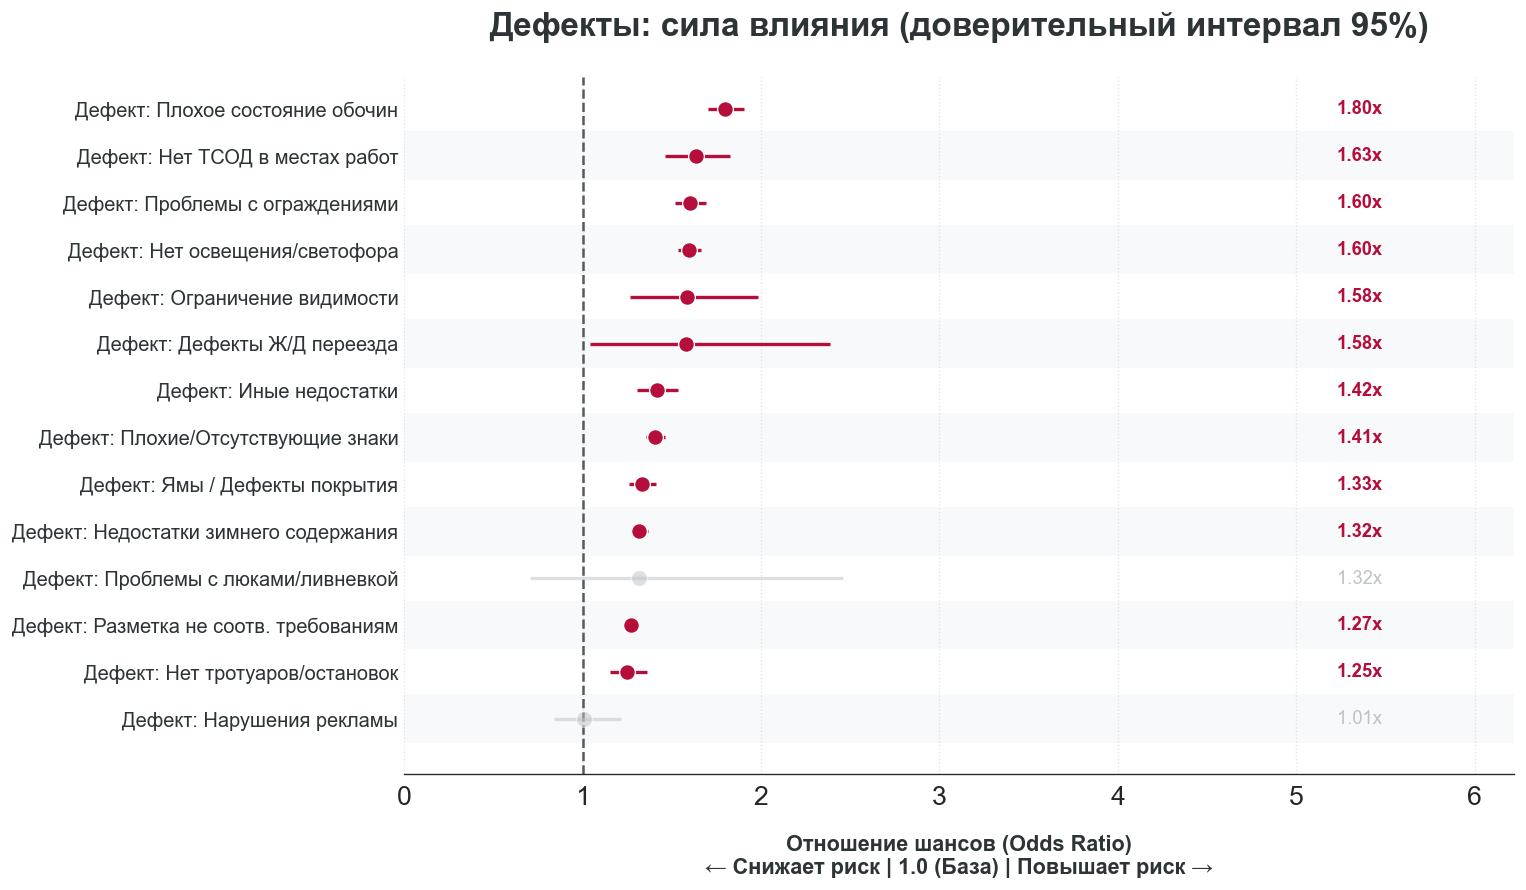

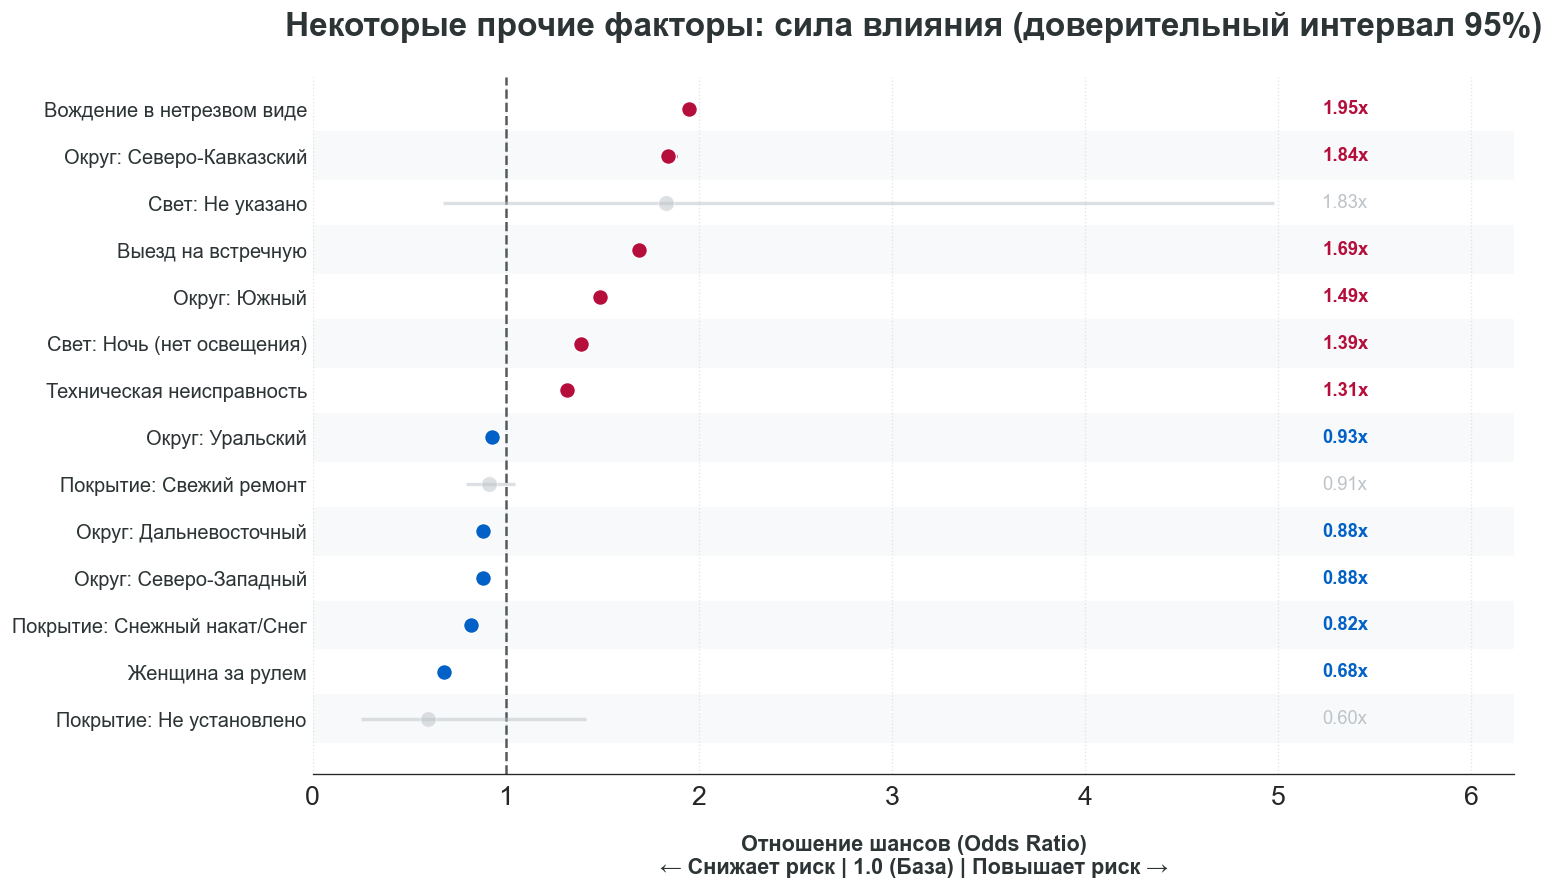

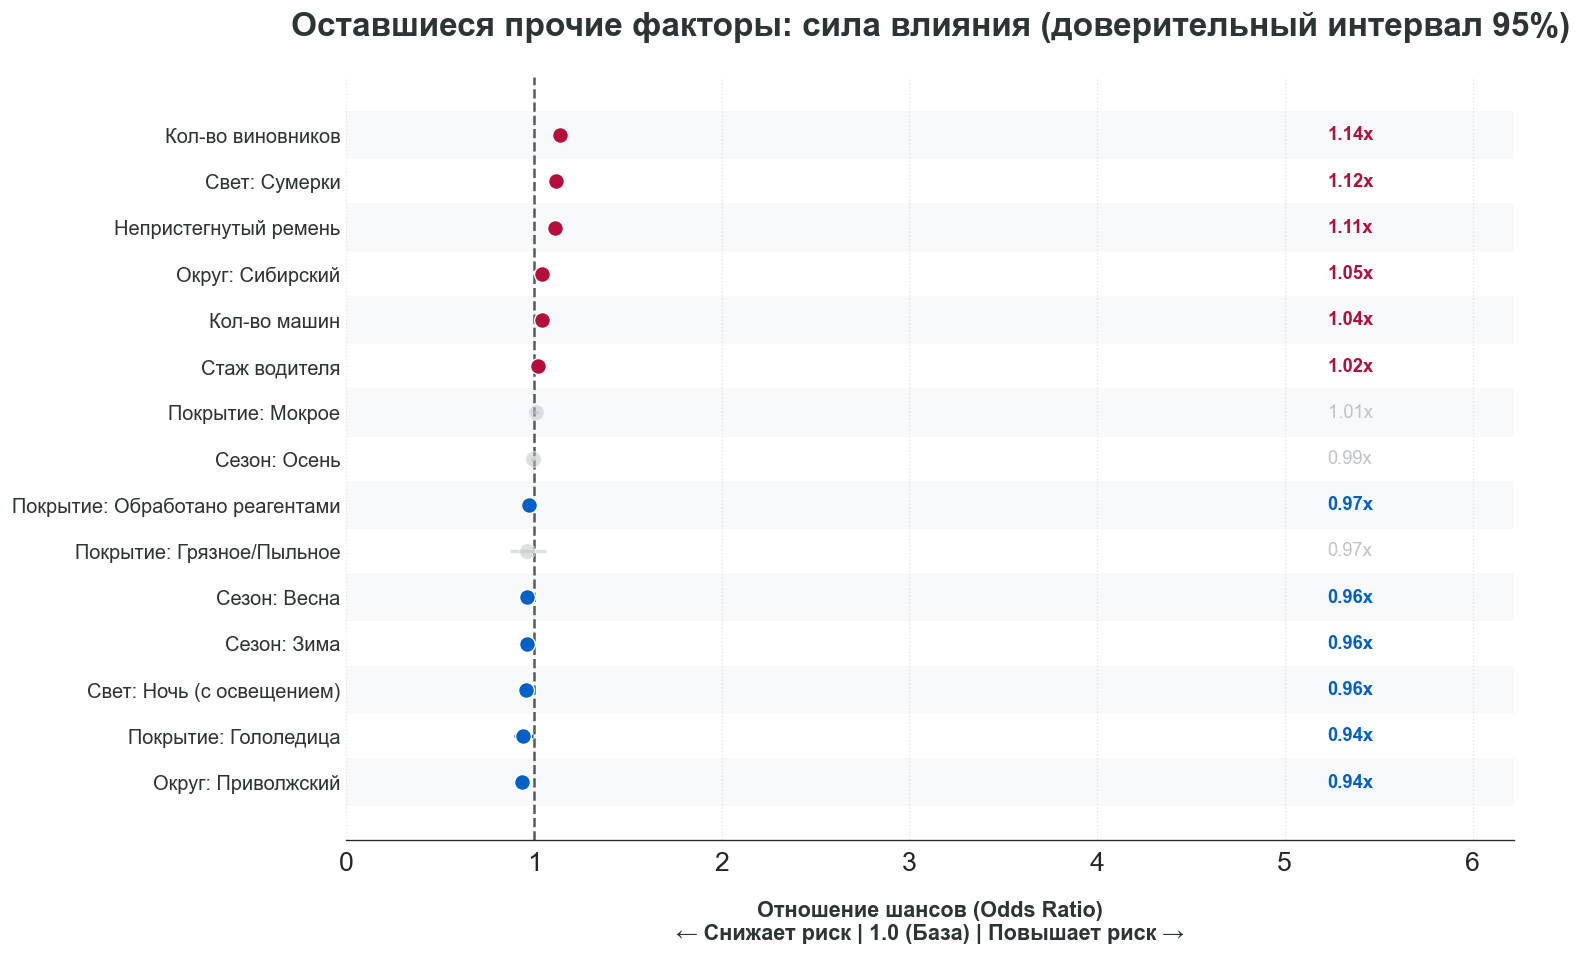

In [115]:
# --- 1. СЛОВАРИ И ПЕРЕВОД ---

# Свет (по порядку LabelEncoder: День, Не указано, Ночь без, Ночь с, Сумерки)
lighting_d = {
    0: 'День', 
    1: 'Не указано', 
    2: 'Ночь (нет освещения)', 
    3: 'Ночь (с освещением)', 
    4: 'Сумерки'
}

# Покрытие
surface_d = {
    0: 'Гололедица', 
    1: 'Снежный накат/Снег', 
    2: 'Мокрое',
    3: 'Не установлено', 
    4: 'Обработано реагентами',
    5: 'Свежий ремонт', 
    6: 'Грязное/Пыльное', 
    7: 'Сухое'
}

# Дефекты (сократил до сути, чтобы влезло на график)
road_defects_d = {
    0: 'Ограничение видимости',
    1: 'Плохие/Отсутствующие знаки',
    2: 'Недостатки зимнего содержания',
    3: 'Проблемы с люками/ливневкой',
    4: 'Нарушения рекламы',
    5: 'Нет дефектов / Не уст.',
    6: 'Плохое состояние обочин',
    7: 'Проблемы с ограждениями',
    8: 'Нет освещения/светофора',
    9: 'Нет ТСОД в местах работ',
    10: 'Дефекты Ж/Д переезда',
    11: 'Нет тротуаров/остановок',
    12: 'Ямы / Дефекты покрытия',
    13: 'Иные недостатки',
    14: 'Разметка не соотв. требованиям'
}

# Прочие переменные
static_map = {
    'impaired_driving': 'Вождение в нетрезвом виде',
    'wrong_way': 'Выезд на встречную',
    'female_driver': 'Женщина за рулем',
    'vehicle_failure': 'Техническая неисправность',
    'no_seatbelt_injury': 'Непристегнутый ремень',
    'n_guilty': 'Кол-во виновников',
    'n_VEHICLES': 'Кол-во машин',
    'guilty_exp_avg': 'Стаж водителя'
}

def get_readable_label(raw_name):
    # 1. Статические имена
    if raw_name in static_map:
        return static_map[raw_name]
    
    # 2. Округа
    if 'district_' in raw_name:
        return f"Округ: {raw_name.replace('district_', '')}"
    
    # 3. Сезоны
    if 'SEASON_' in raw_name:
        seasons = {'1': 'Зима', '2': 'Весна', '3': 'Лето', '4': 'Осень'}
        val = raw_name.split('_')[-1]
        return f"Сезон: {seasons.get(val, val)}"

    # 4. Категории с номерами
    try:
        val = int(raw_name.split('_')[-1])
        
        if 'road_defects_cat' in raw_name:
            return f"Дефект: {road_defects_d.get(val, str(val))}"
        
        if 'lighting_cat' in raw_name:
            return f"Свет: {lighting_d.get(val, str(val))}"
            
        if 'road_surface_cat' in raw_name:
            return f"Покрытие: {surface_d.get(val, str(val))}"
            
        if 'road_category' in raw_name:
            return f"Категория дороги: {val}"
            
    except:
        return raw_name
        
    return raw_name

# --- 2. ПОДГОТОВКА ДАННЫХ ---

try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']

sns.set_style("white")

# --- 0) (ваш код подготовки словарей/labeling/обучения модели — без изменений) ---

# --- 1) Вытаскиваем данные из модели (ваш блок — без изменений) ---
num_thresholds = len(df['severity'].unique()) - 1
params = res.params[:-num_thresholds]
conf = res.conf_int().iloc[:-num_thresholds]
conf.columns = ['Lower_Log', 'Upper_Log']
pvalues = res.pvalues[:-num_thresholds]

eval_df = pd.DataFrame({
    'OR': np.exp(params),
    'OR_Lower': np.exp(conf['Lower_Log']),
    'OR_Upper': np.exp(conf['Upper_Log']),
    'P-value': pvalues
})

# Переименовываем индексы (ваша функция get_readable_label)
eval_df.index = [get_readable_label(idx) for idx in eval_df.index]

# --- 2) Функция отрисовки одного forest-plot ---
def plot_forest(plot_df, title, x_max=None):
    plot_df = plot_df.sort_values('OR', ascending=True)

    try:
        plt.rcParams['font.family'] = 'Montserrat'
    except:
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Verdana']

    sns.set_style("white")

    fig, ax = plt.subplots(figsize=(13, max(4, len(plot_df) * 0.55)), dpi=120)
    y_range = range(len(plot_df))

    for i, idx in enumerate(plot_df.index):
        row = plot_df.loc[idx]

        # Цвета
        if row['P-value'] > 0.05:
            color = '#bdc3c7'  # Серый
            alpha = 0.5
            fontweight = 'normal'
        else:
            color = '#B50E3B' if row['OR'] > 1 else '#0261C7'  # Риск / Защита
            alpha = 1.0
            fontweight = 'bold'

        # Зебра
        if i % 2 == 0:
            ax.axhspan(i - 0.5, i + 0.5, color='#f7f9fa', zorder=0)

        # Усы (CI)
        ax.hlines(i, row['OR_Lower'], row['OR_Upper'], color=color, linewidth=2, alpha=alpha, zorder=2)

        # Точка (OR)
        ax.scatter(row['OR'], i, color=color, s=90, alpha=alpha, zorder=3,
                   edgecolor='white', linewidth=0.8)

        # Текст значения
        right_text_x = (x_max if x_max is not None else plot_df['OR_Upper'].max()) * 1.05
        ax.text(
            x=right_text_x,
            y=i,
            s=f"{row['OR']:.2f}x",
            va='center', ha='left',
            fontsize=11, fontweight=fontweight, color=color
        )

    # Вертикальная линия (База)
    ax.axvline(x=1, color='#2d3436', linestyle='--', linewidth=1.5, alpha=0.8, zorder=1)

    # Оси/подписи
    ax.set_yticks(list(y_range))
    ax.set_yticklabels(plot_df.index, fontsize=12, fontweight='medium', color='#2d3436')

    ax.set_xlabel(
        'Отношение шансов (Odds Ratio)\n← Снижает риск | 1.0 (База) | Повышает риск →',
        fontsize=13, fontweight='bold', color='#2d3436', labelpad=15
    )
    ax.set_title(title, fontsize=20, fontweight='heavy', color='#2d3436', pad=25)

    sns.despine(left=True, bottom=False, right=True, top=True)
    ax.tick_params(axis='y', length=0)
    ax.grid(axis='x', linestyle=':', alpha=0.5)

    # Границы (с запасом под текст справа)
    xmax = x_max if x_max is not None else plot_df['OR_Upper'].max()
    ax.set_xlim(0, xmax * 1.25)

    plt.tight_layout()
    plt.show()


is_defect = pd.Index(eval_df.index).astype(str).str.startswith('Дефект:')

plot_df_defects = eval_df.loc[is_defect].copy()
plot_df_other   = eval_df.loc[~is_defect].copy()
tmp = plot_df_other.copy()

# --- Топ‑7 и бот‑7 ТОЛЬКО для прочих факторов ---
plot_df_other = plot_df_other.sort_values('OR', ascending=True)  # порядок по OR [web:35]

if len(plot_df_other) > 14:
    plot_df_other = pd.concat(
        [plot_df_other.head(7), plot_df_other.tail(7)]
    )  # берём 7 сверху и 7 снизу [web:22][web:42]
    plot_df_other = plot_df_other.sort_values('OR', ascending=True)  # вернуть правильный порядок [web:35]

# дефекты показываем все как есть (либо там можете своё ограничение сделать)
plot_df_defects = plot_df_defects.sort_values('OR', ascending=True)

plot_df_another = pd.concat([tmp, plot_df_other]).drop_duplicates(keep=False)

common_xmax = eval_df['OR_Upper'].max()

plot_forest(
    plot_df_defects,
    'Дефекты: сила влияния (доверительный интервал 95%)',
    x_max=common_xmax
)
plot_forest(
    plot_df_other,
    'Некоторые прочие факторы: сила влияния (доверительный интервал 95%)',
    x_max=common_xmax
)
plot_forest(
    plot_df_another,
    'Оставшиеся прочие факторы: сила влияния (доверительный интервал 95%)',
    x_max=common_xmax
)


### Переход к вероятностям

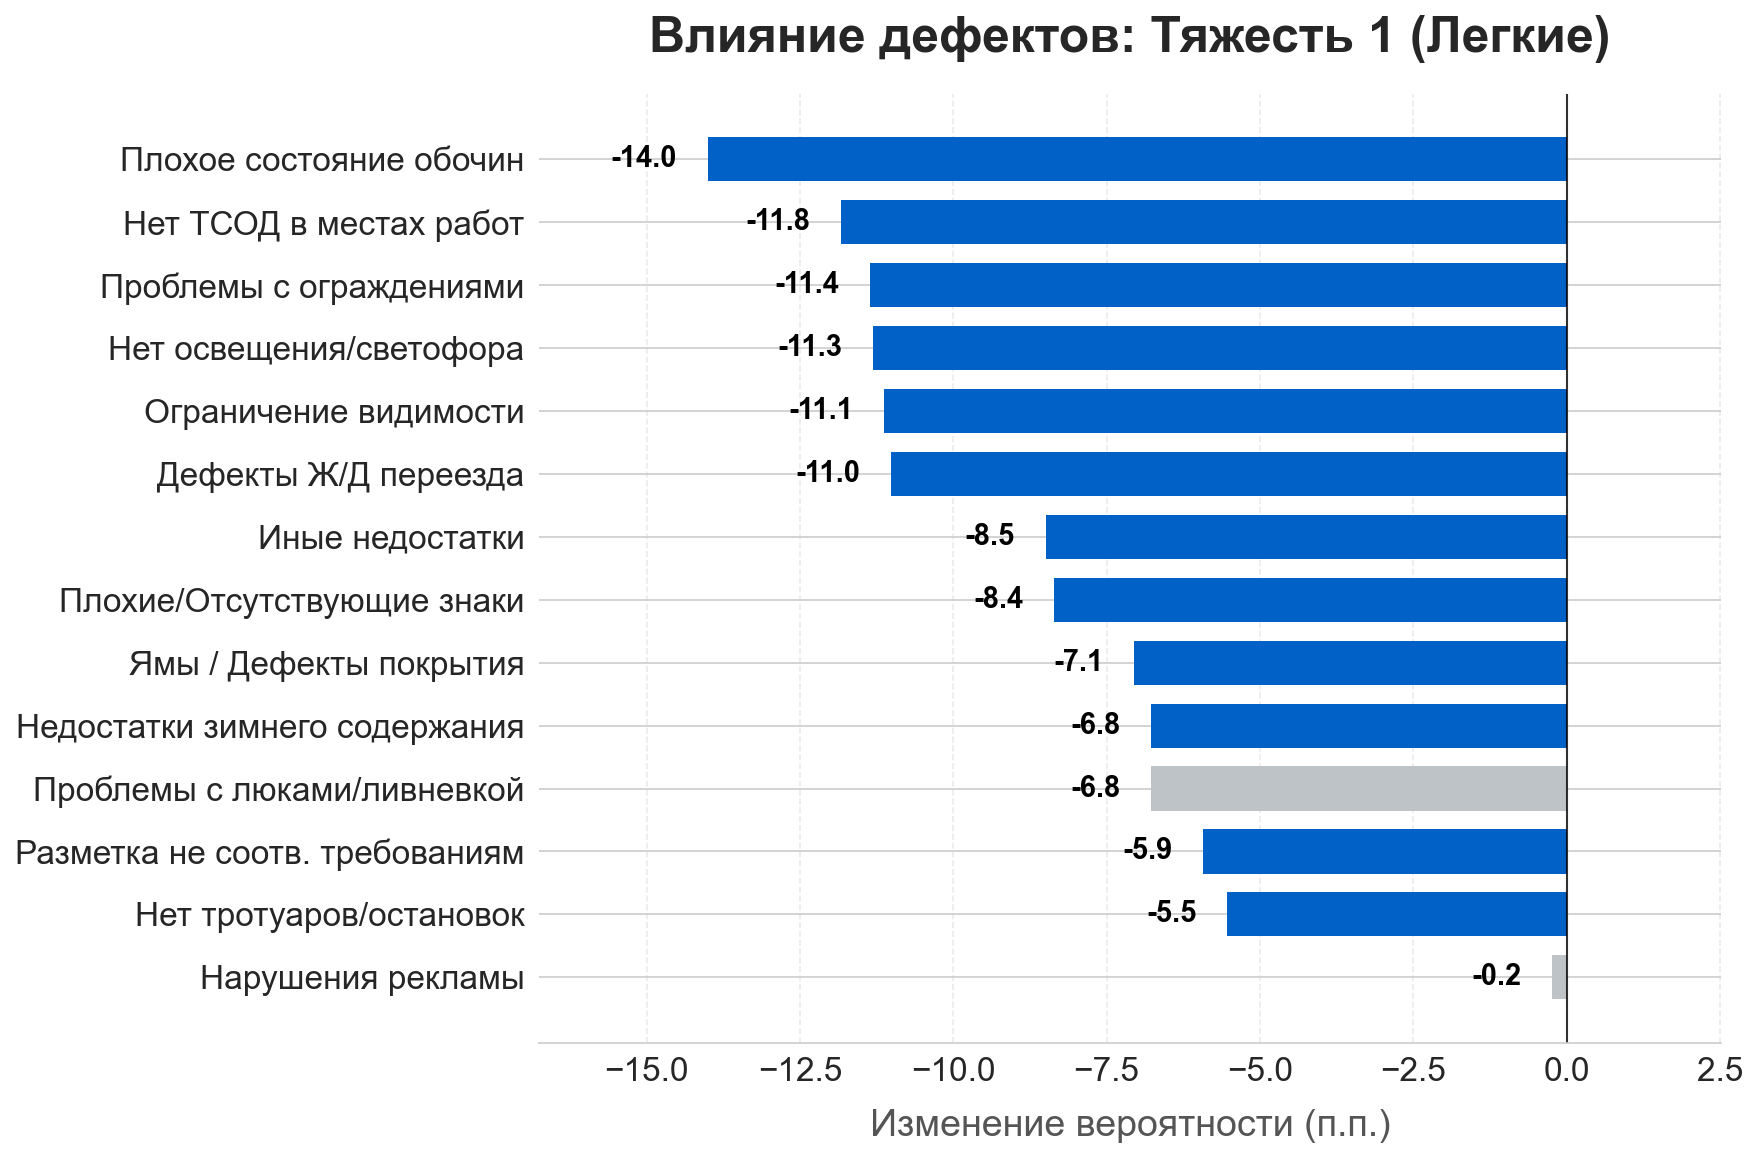

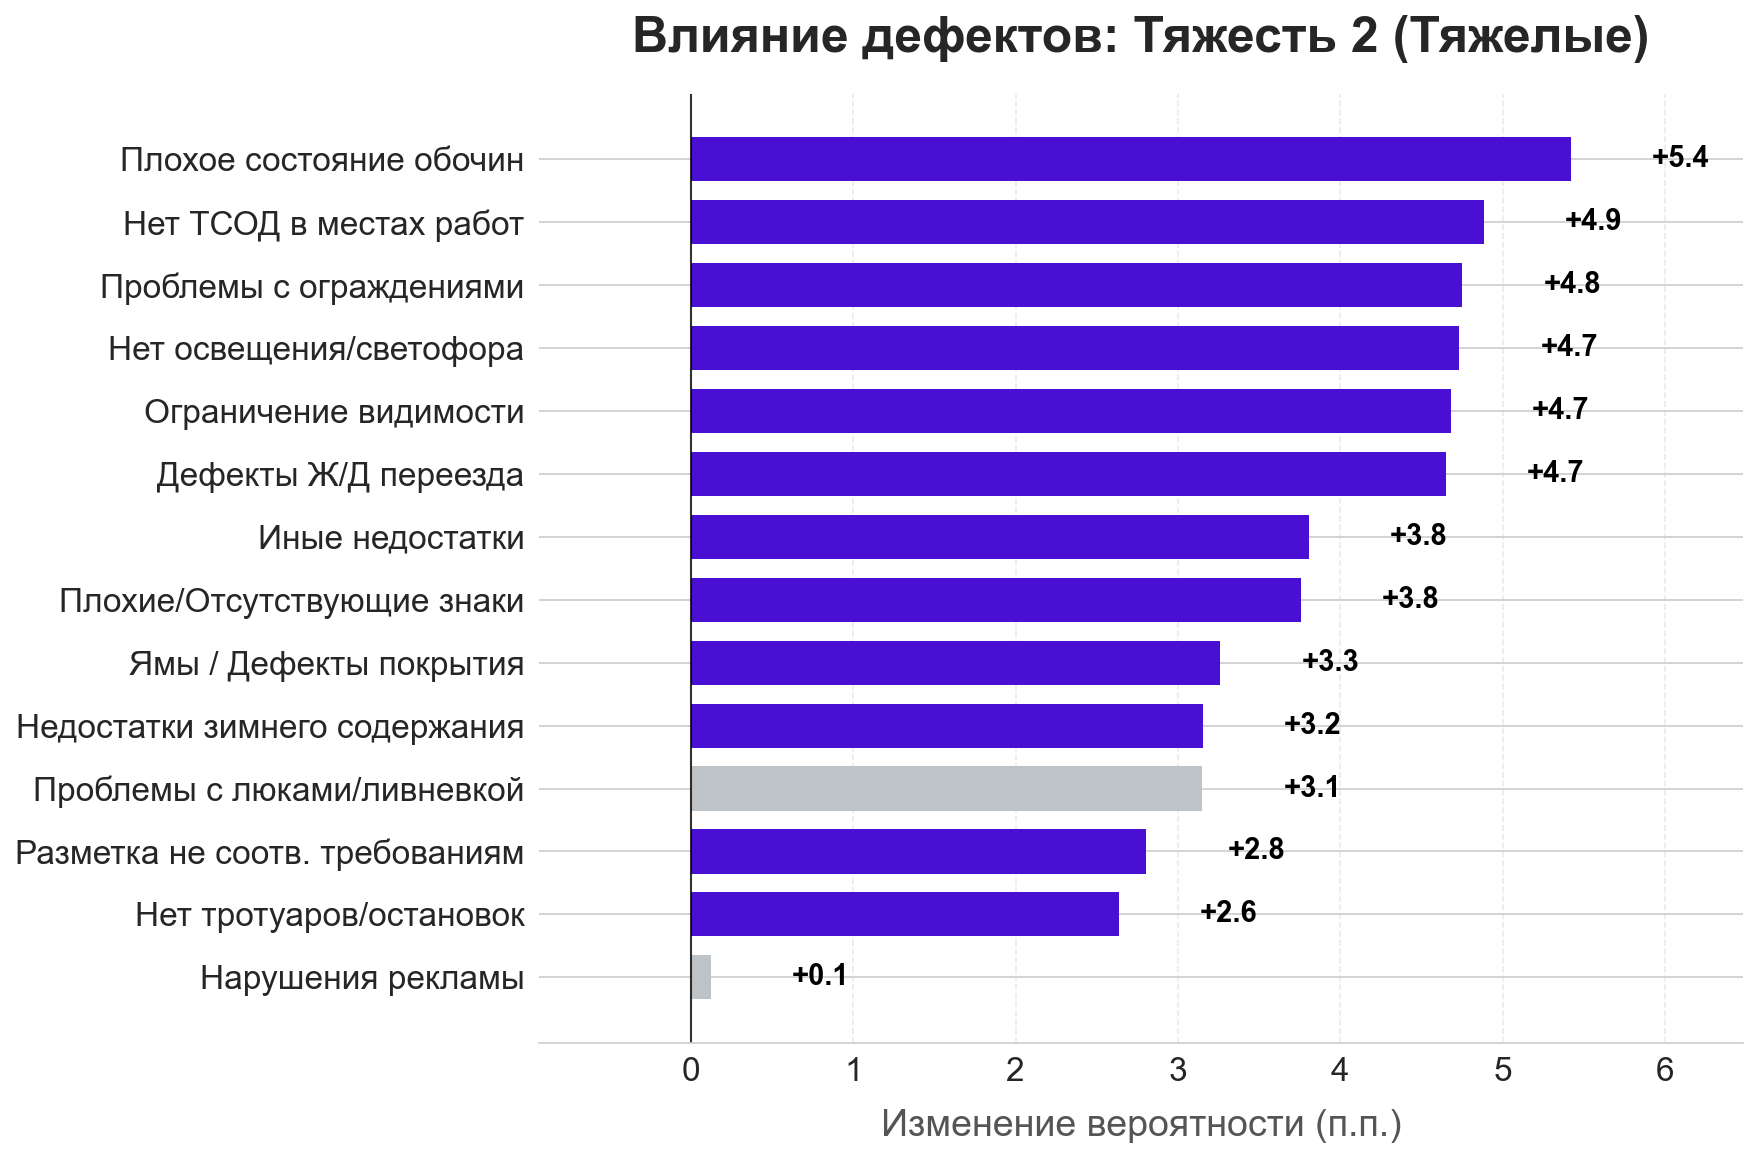

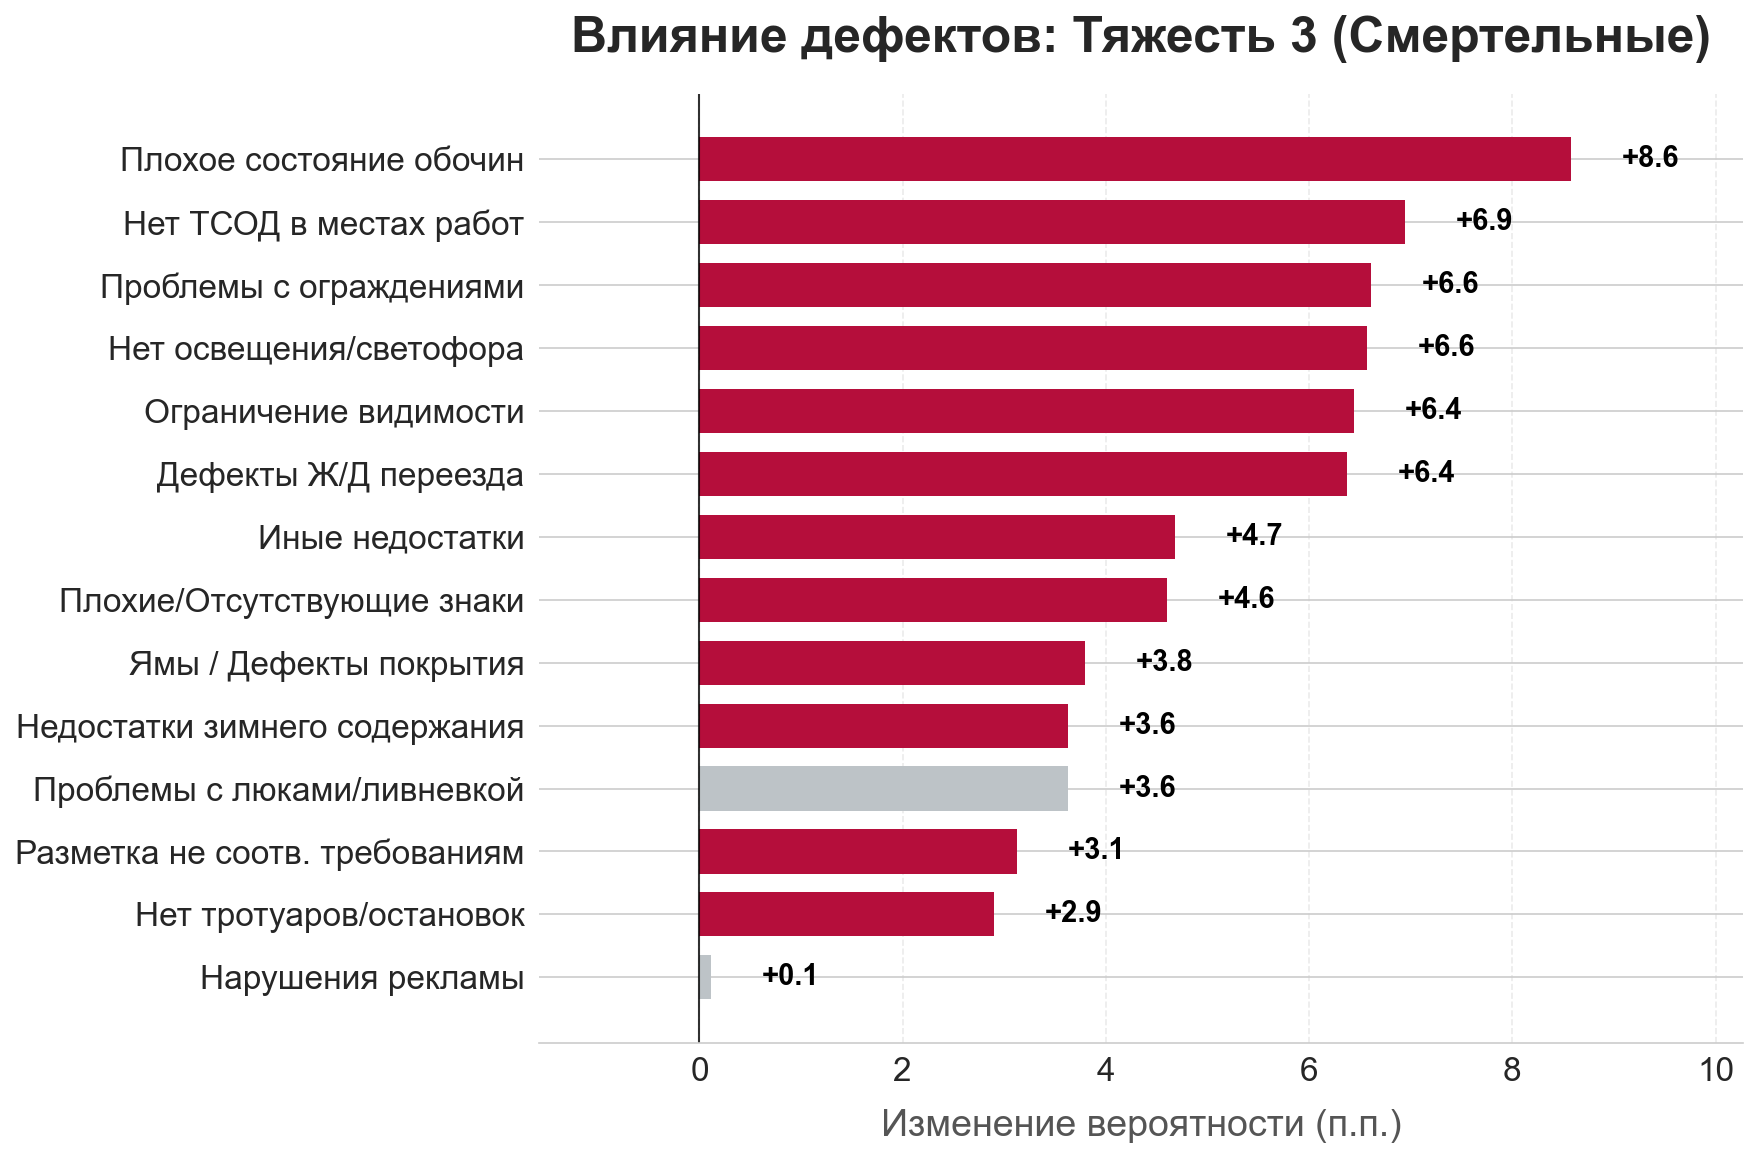

In [93]:
BASE_DEFECT_COL = "road_defects_cat_5"   # так, как в ноутбуке [file:57]
BASE_DEFECT_COL_NUM = 5

road_defects_d = {
    0: 'Ограничение видимости',
    1: 'Плохие/Отсутствующие знаки',
    2: 'Недостатки зимнего содержания',
    3: 'Проблемы с люками/ливневкой',
    4: 'Нарушения рекламы',
    5: 'Нет дефектов / Не уст.',
    6: 'Плохое состояние обочин',
    7: 'Проблемы с ограждениями',
    8: 'Нет освещения/светофора',
    9: 'Нет ТСОД в местах работ',
    10: 'Дефекты Ж/Д переезда',
    11: 'Нет тротуаров/остановок',
    12: 'Ямы / Дефекты покрытия',
    13: 'Иные недостатки',
    14: 'Разметка не соотв. требованиям'
}

# палитра (как в ноутбуке) [file:57]
hexcolors = ["#B50E3B", "#850AD6", "#490FD2", "#153AE0", "#0261C7"]
severity_palette = {1: hexcolors[-1], 2: hexcolors[2], 3: hexcolors[0]}

# --- 1. Настройки стиля (крупный шрифт, узкие графики) ---
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "Verdana"],
    "font.size": 16,            
    "axes.titlesize": 24,       
    "axes.labelsize": 18,       
    "xtick.labelsize": 16,      
    "ytick.labelsize": 16,      
})

# Параметры цветов
ALPHA = 0.05
gray_color = "#BDC3C7"  # Серый для незначимых
# Цвета для severity: 1 (синий), 2 (фиолетовый), 3 (красный)
hexcolors = ["#B50E3B", "#850AD6", "#490FD2", "#153AE0", "#0261C7"]
severity_palette = {1: hexcolors[-1], 2: hexcolors[2], 3: hexcolors[0]}

# --- 2. Расчет Marginal Effects (MEM) ---

# Ищем колонки дефектов (имена должны совпадать с X.columns)
defect_cols = sorted([c for c in X.columns if "roaddefectscat" in c or "road_defects_cat" in c])

if not defect_cols:
    raise ValueError("Колонки дефектов не найдены! Проверьте X.columns.")

# Базовая точка: средние значения, дефекты = 0
x0 = X.mean(axis=0).copy()
x0.loc[defect_cols] = 0.0

# Функция предсказания вероятностей
def predict_probs_ordered(model_res, exog_row):
    exog_df = pd.DataFrame([exog_row.values], columns=exog_row.index)
    probs = model_res.model.predict(model_res.params, exog=exog_df)
    return np.asarray(probs).flatten()

# Базовые вероятности (p0)
p0 = predict_probs_ordered(res, x0)
K = len(p0)  # Количество классов (обычно 3)

rows = []
# Достаем p-values прямо из модели
pvalues_series = res.pvalues

for col in defect_cols:
    # Симулируем наличие дефекта (1.0)
    xi = x0.copy()
    xi[col] = 1.0
    pi = predict_probs_ordered(res, xi)
    
    # P-value для этой переменной
    pval = pvalues_series.get(col, np.nan)
    
    for k in range(K):
        rows.append({
            "defect_col": col,
            "severity": k + 1,
            "delta_pp": 100.0 * (pi[k] - p0[k]), # Разница в % пунктах
            "p_value": float(pval)
        })

effects = pd.DataFrame(rows)

# --- 3. Перевод названий и сортировка ---

def get_defect_label(col_name):
    import re
    # Ищем цифру в конце названия колонки
    m = re.search(r"(\d+)$", col_name)
    if m:
        num = int(m.group(1))
        # road_defects_d - словарь из твоего ноутбука
        if 'road_defects_d' in globals() and num in road_defects_d:
            return road_defects_d[num]
    return col_name

effects["defect_ru"] = effects["defect_col"].apply(get_defect_label)

# Сортировка: определяем порядок по влиянию на самый тяжелый класс (например, 3)
target_sev = K 
order_df = effects[effects["severity"] == target_sev].sort_values("delta_pp", ascending=True)
order_list = order_df["defect_ru"].tolist()

# --- 4. Построение 3-х отдельных графиков ---

# --- 4. Построение 3-х отдельных графиков (с исправленным отступом) ---

for k in range(1, K + 1):
    fig, ax = plt.subplots(figsize=(12, 8), dpi=150) # Сделали чуть шире (12)
    
    subset = effects[effects["severity"] == k].copy()
    subset["defect_ru"] = pd.Categorical(subset["defect_ru"], categories=order_list, ordered=True)
    subset = subset.sort_values("defect_ru")
    
    # Цвета
    bar_colors = []
    for _, row in subset.iterrows():
        if row["p_value"] > ALPHA or pd.isna(row["p_value"]):
            bar_colors.append(gray_color)
        else:
            bar_colors.append(severity_palette.get(k, "#333333"))
    
    bars = ax.barh(subset["defect_ru"], subset["delta_pp"], color=bar_colors, edgecolor="none", height=0.7)
    
    # Расширяем границы оси X, чтобы влез текст
    # Находим мин и макс значения
    min_val = subset["delta_pp"].min()
    max_val = subset["delta_pp"].max()
    
    # Добавляем 15-20% запаса по краям для подписей
    range_span = max_val - min_val
    if range_span == 0: range_span = 1
    
    ax.set_xlim(min_val - range_span * 0.2, max_val + range_span * 0.2)
    
    # Заголовки
    severity_names = {1: "Тяжесть 1 (Легкие)", 2: "Тяжесть 2 (Тяжелые)", 3: "Тяжесть 3 (Смертельные)"}
    title_text = severity_names.get(k, f"Тяжесть {k}")
    
    ax.set_title(f"Влияние дефектов: {title_text}", pad=20, fontweight="bold")
    ax.set_xlabel("Изменение вероятности (п.п.)", color="#555555", labelpad=10)
    ax.axvline(0, color="black", linewidth=1, linestyle="-", alpha=0.8)
    ax.grid(axis="x", linestyle="--", alpha=0.4)
    sns.despine(ax=ax, left=True, bottom=False)
    
    # Подписи
    for bar, val in zip(bars, subset["delta_pp"]):
        # Смещаем текст сильнее
        offset = 0.5 if val >= 0 else -0.5
        ha_align = 'left' if val >= 0 else 'right'
        
        ax.text(val + offset, 
                bar.get_y() + bar.get_height()/2, 
                f"{val:+.1f}", 
                va='center', 
                ha=ha_align, 
                fontsize=14, 
                fontweight='bold',
                color="black")
    
    plt.tight_layout()
    plt.show()



# Проверка на устойчивость

## По годам

In [116]:
YEAR_PERIODS = [
    [2015, 2016],
    [2017, 2018],
    [2019, 2020],
    [2021, 2022],
    [2023, 2024]
]

# Колонки (как в вашем ноутбуке)
categorical_cols = ['district', 'road_defects_cat', 'road_surface_cat', 'lighting_cat', 'SEASON']
numerical_cols = ['n_VEHICLES', 'n_guilty', 'guilty_exp_avg', 'vehicle_failure', 
                  'female_driver', 'no_seatbelt_injury', 'impaired_driving', 'wrong_way']
target = 'severity'

# Базовые категории для удаления (как в ноутбуке)
cols_to_drop_base = [
    'lighting_cat_0',       # Светлое время
    'road_surface_cat_7',   # Сухое покрытие
    'road_defects_cat_5',   # Нет дефектов
    'SEASON_3',             # Лето
    'district_Центральный',
]

# Функция предобработки (чтобы не дублировать код 5 раз)
def prepare_data_for_period(df_source, period_years):
    # 1. Фильтруем по годам
    df_period = df_source[df_source['YEAR'].isin(period_years)].copy()
    
    # Если данных мало, пропускаем
    if len(df_period) < 1000:
        return None, None
    
    # 2. Формируем X и y
    model_data = df_period[categorical_cols + numerical_cols + [target]].dropna()
    y_p = model_data[target]
    
    X_cat_p = model_data[categorical_cols].astype(str)
    X_num_p = model_data[numerical_cols].astype(float)
    
    # 3. One-Hot
    X_dummies_p = pd.get_dummies(X_cat_p, prefix_sep='_', drop_first=False)
    X_p = pd.concat([X_num_p, X_dummies_p], axis=1)
    
    # 4. Удаляем базы
    # Важно: в конкретном году может не быть какой-то категории, проверяем наличие
    existing_drop = [c for c in cols_to_drop_base if c in X_p.columns]
    X_p = X_p.drop(columns=existing_drop)
    
    # 5. Scaling (фитим скейлер на ЭТОМ периоде, т.к. мы проверяем независимость)
    scaler_p = StandardScaler()
    num_to_scale = ['n_VEHICLES', 'n_guilty', 'guilty_exp_avg']
    X_p[num_to_scale] = scaler_p.fit_transform(X_p[num_to_scale])
    
    # Приводим к float
    X_p = X_p.astype(float)
    
    return X_p, y_p

# --- ЦИКЛ ОБУЧЕНИЯ ---
robustness_results = []

print("Начинаем проверку устойчивости по периодам...")

for period in YEAR_PERIODS:
    period_label = f"{period[0]}-{period[1]}"
    print(f"Обучение: {period_label}...", end=" ")
    
    try:
        X_curr, y_curr = prepare_data_for_period(df, period)
        
        if X_curr is None:
            print("Слишком мало данных.")
            continue
            
        # Обучение
        model_curr = OrderedModel(y_curr, X_curr, distr='logit')
        res_curr = model_curr.fit(method='bfgs', disp=False)
        
        # Сбор результатов
        num_thresh = len(y_curr.unique()) - 1
        params = res_curr.params[:-num_thresh]
        conf = res_curr.conf_int().iloc[:-num_thresh]
        conf.columns = ['Lower', 'Upper']
        pvalues = res_curr.pvalues[:-num_thresh]
        
        # Сохраняем в список словарей
        for idx in params.index:
            robustness_results.append({
                'Period': period_label,
                'Variable': idx,
                'Coef': params[idx],
                'OR': np.exp(params[idx]),
                'OR_Lower': np.exp(conf.loc[idx, 'Lower']),
                'OR_Upper': np.exp(conf.loc[idx, 'Upper']),
                'P-value': pvalues[idx]
            })
        print("Готово.")
        
    except Exception as e:
        print(f"Ошибка: {e}")

# Создаем общий DataFrame
rob_df = pd.DataFrame(robustness_results)

# Применяем человекочитаемые названия (функция из вашего ноутбука)
# Убедитесь, что функция get_readable_label определена выше
rob_df['Variable_Label'] = rob_df['Variable'].apply(get_readable_label)

print(f"\nВсего собрано {len(rob_df)} коэффициентов.")

Начинаем проверку устойчивости по периодам...
Обучение: 2015-2016... Готово.
Обучение: 2017-2018... Готово.
Обучение: 2019-2020... Готово.
Обучение: 2021-2022... Готово.
Обучение: 2023-2024... Готово.

Всего собрано 209 коэффициентов.


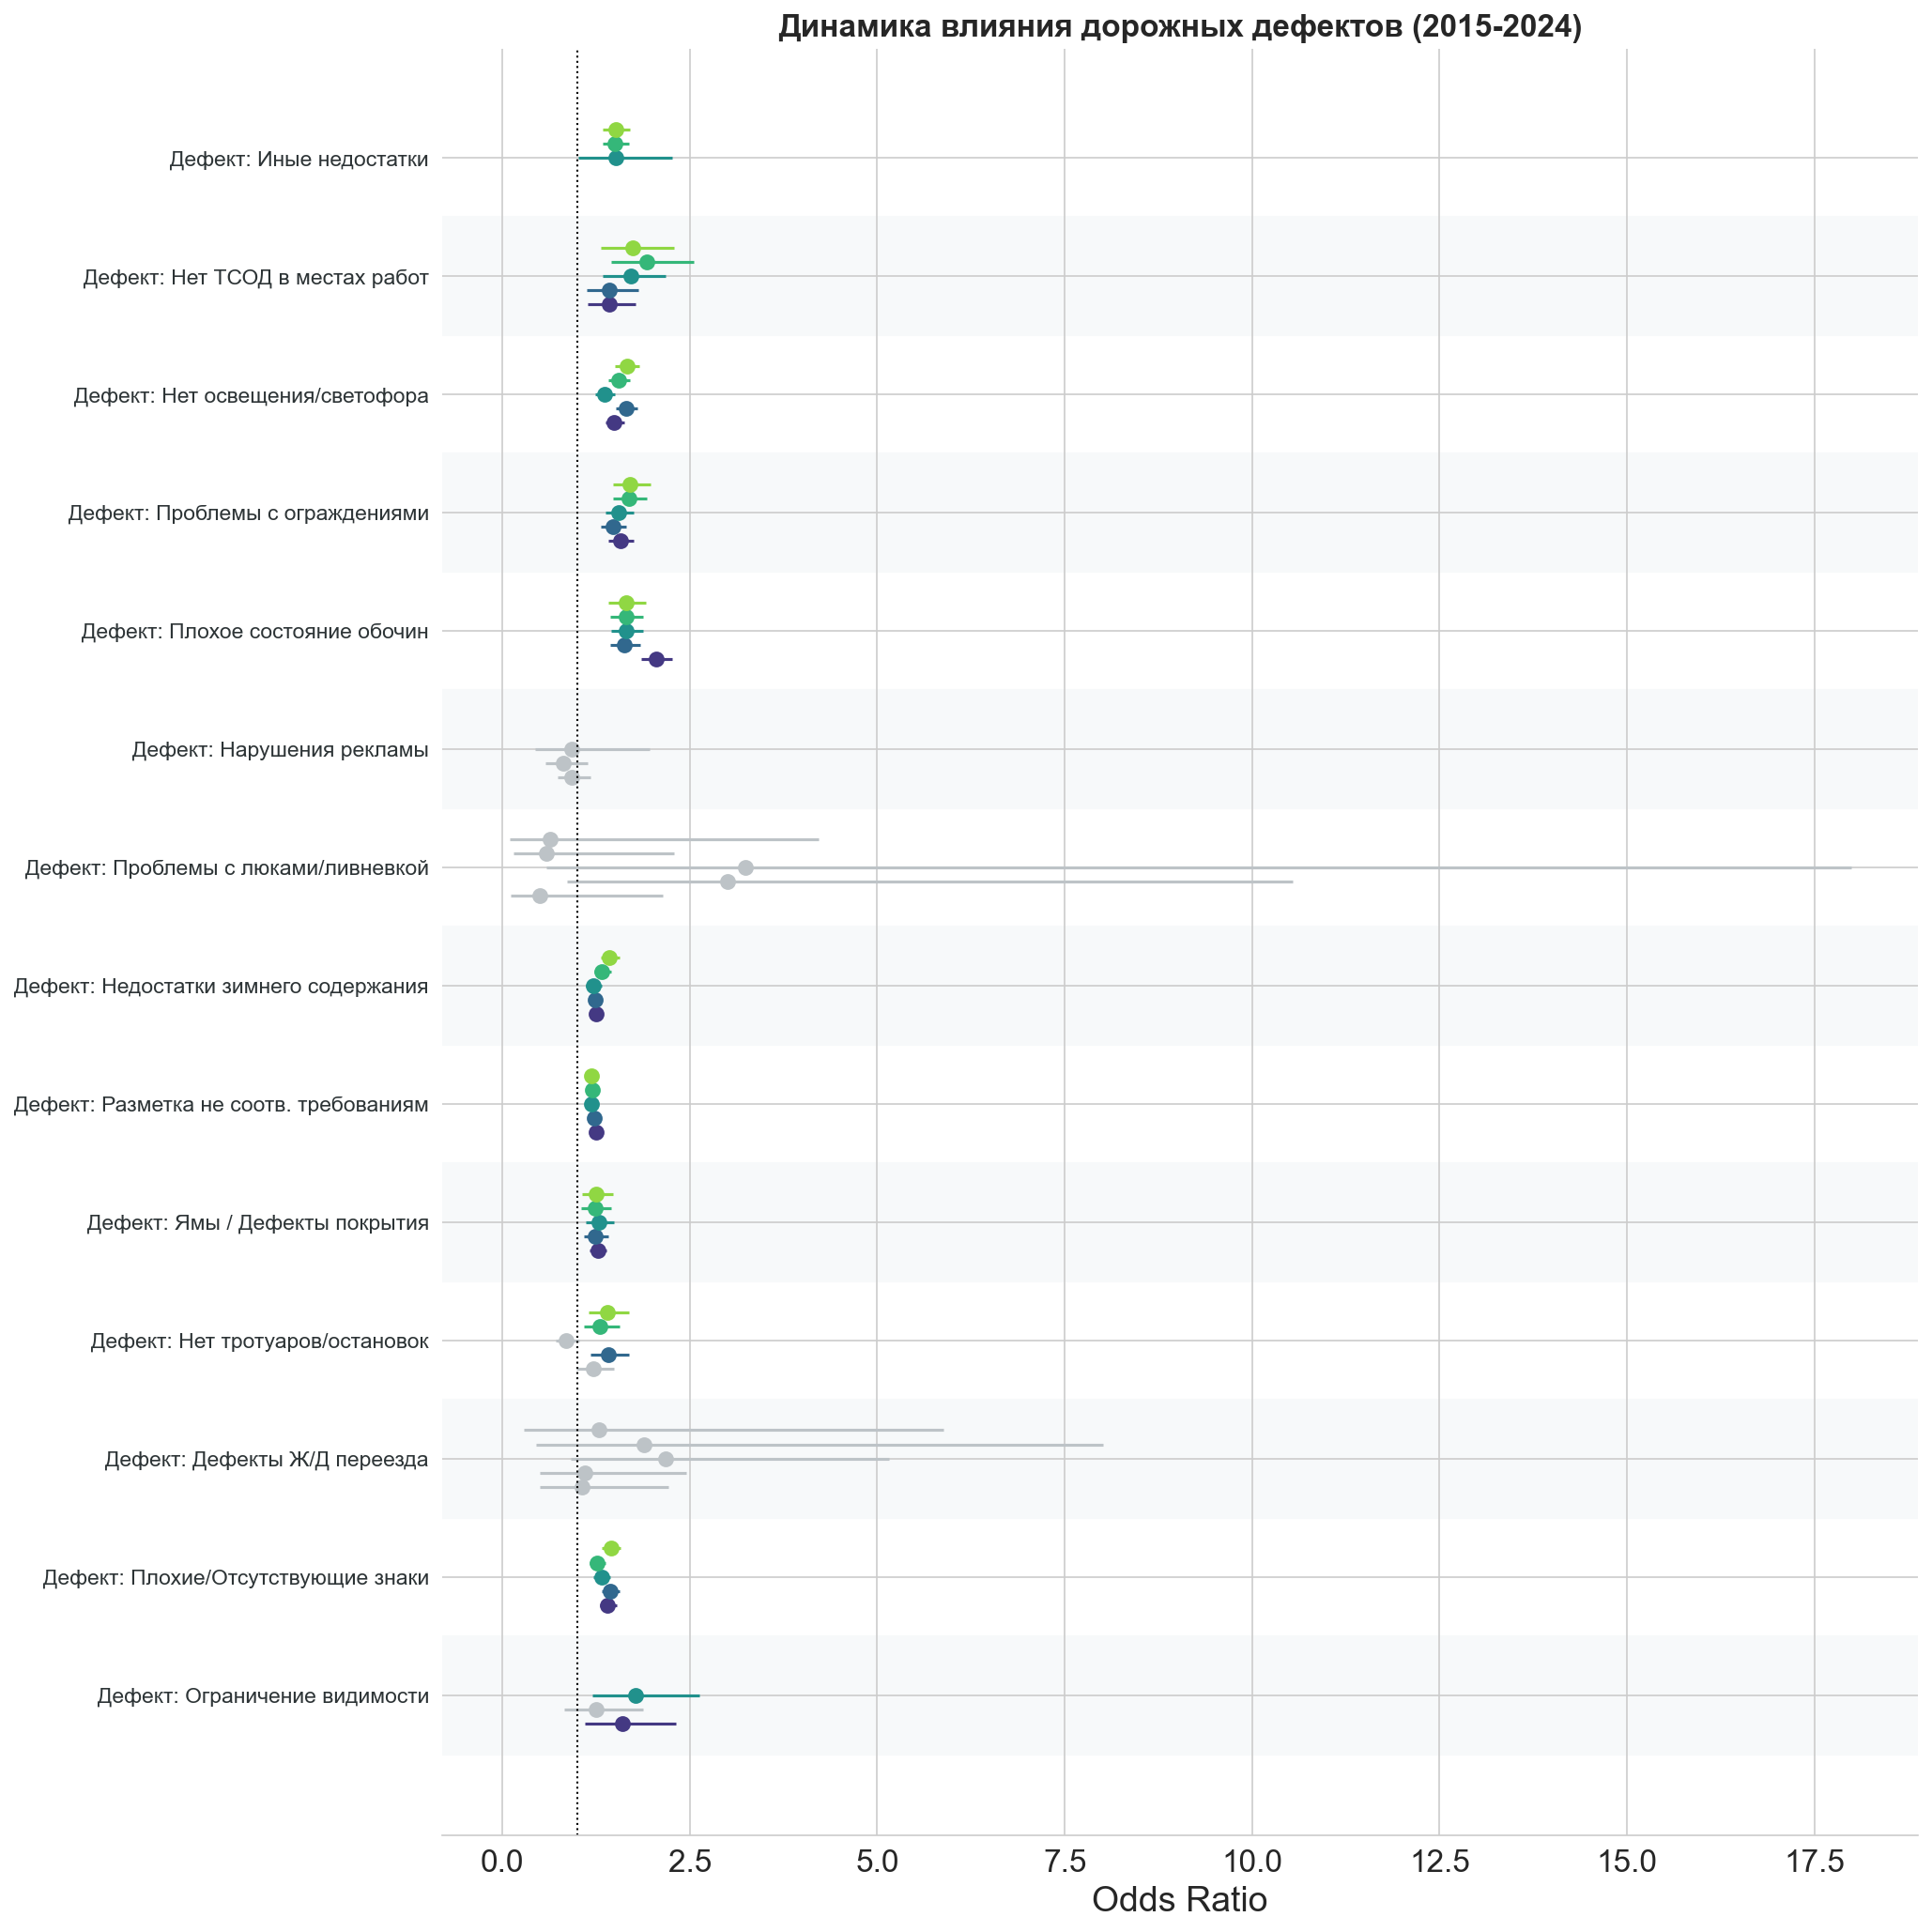

In [150]:
# Фильтруем только дефекты
defect_mask = rob_df['Variable'].str.contains('road_defects_cat')
defect_data = rob_df[defect_mask].copy()

periods = [f"{p[0]}-{p[1]}" for p in YEAR_PERIODS]
colors = sns.color_palette("viridis", n_colors=len(periods))
period_color_map = dict(zip(periods, colors))

# Сортируем по названию дефекта
defects_list = defect_data['Variable_Label'].unique()

fig, ax = plt.subplots(figsize=(14, len(defects_list) * 1.0), dpi=150)
y_positions = np.arange(len(defects_list))

for i, var_name in enumerate(defects_list):
    var_subset = defect_data[defect_data['Variable_Label'] == var_name]
    
    if i % 2 == 0:
        ax.axhspan(i - 0.5, i + 0.5, color='#f7f9fa', zorder=0)

    for j, period in enumerate(periods):
        row = var_subset[var_subset['Period'] == period]
        if row.empty: continue
        row = row.iloc[0]
        
        y_pos = i + (j - 2) * 0.12 # Чуть плотнее
        color = '#bdc3c7' if row['P-value'] > 0.05 else period_color_map[period]
        
        ax.hlines(y_pos, row['OR_Lower'], row['OR_Upper'], color=color, linewidth=1.5)
        ax.scatter(row['OR'], y_pos, color=color, s=50)

ax.set_yticks(y_positions)
ax.set_yticklabels(defects_list, fontsize=11, color='#2d3436')
ax.axvline(1, color='black', linestyle=':', linewidth=1)
ax.set_title('Динамика влияния дорожных дефектов (2015-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Odds Ratio')
sns.despine(left=True)
plt.tight_layout()
plt.show()

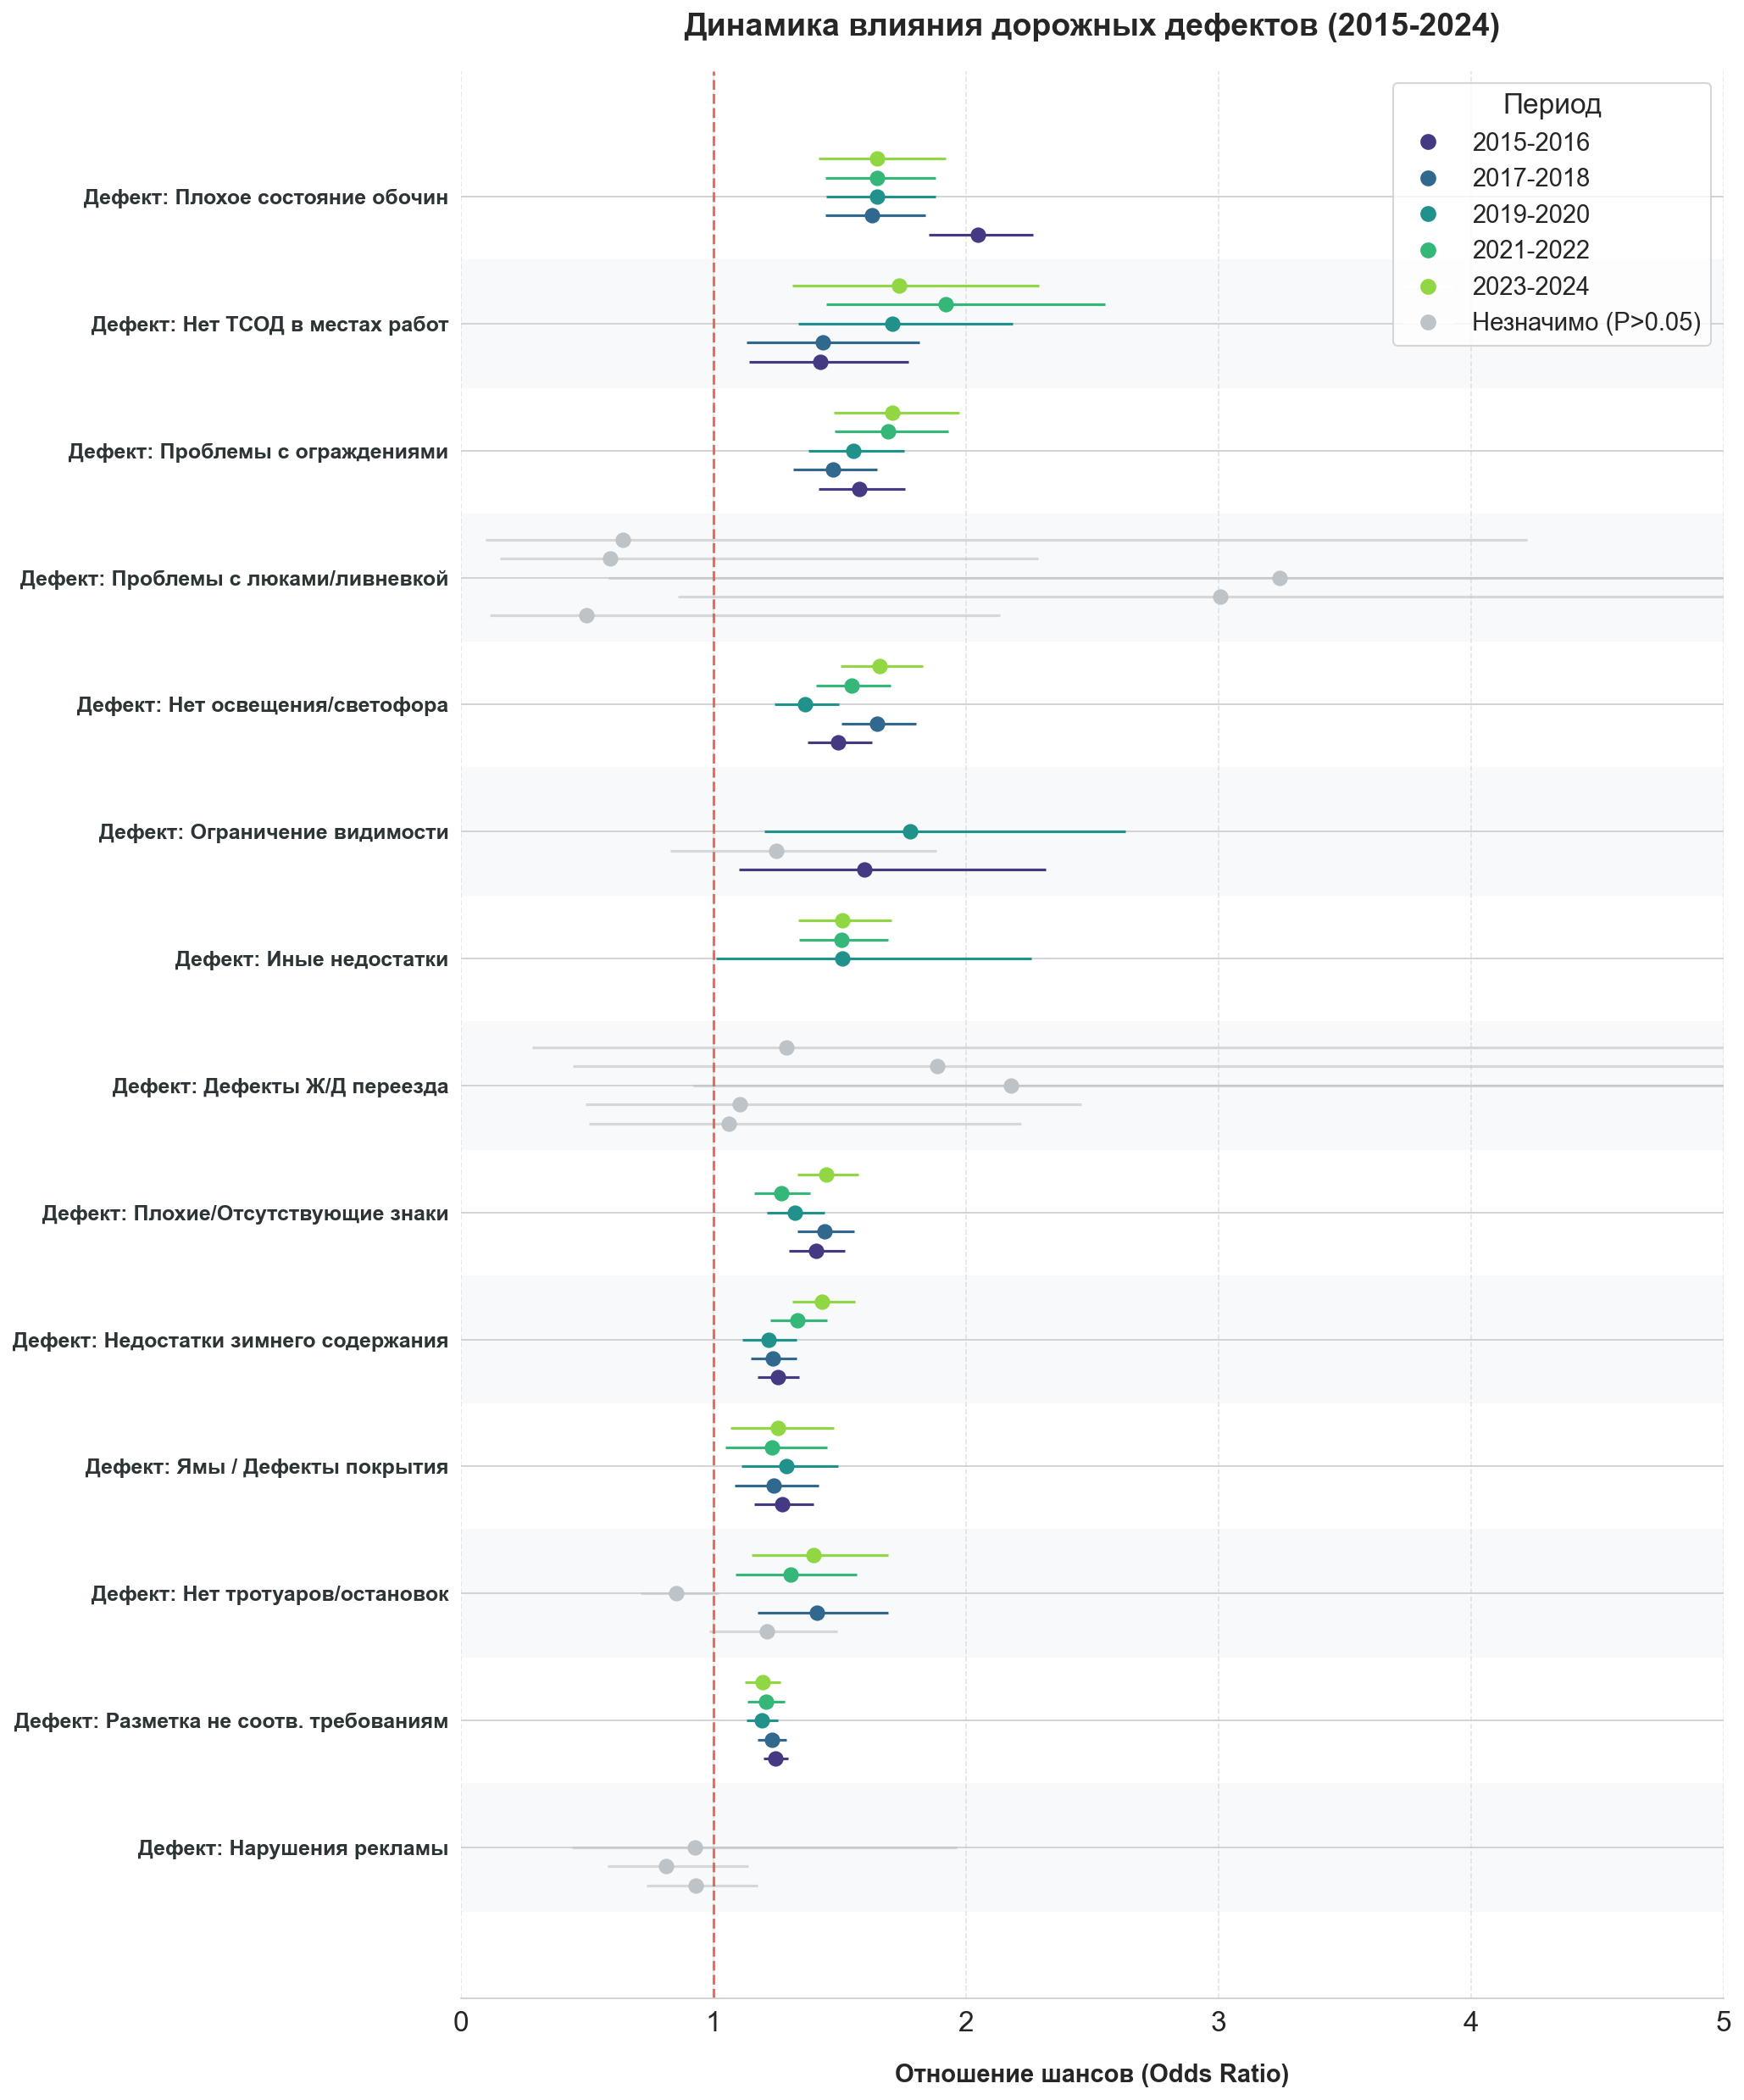

In [ ]:
# --- НАСТРОЙКИ ВИЗУАЛИЗАЦИИ ---
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'

sns.set_style("whitegrid")


# --- 1. ФУНКЦИЯ ДЛЯ ПОСТРОЕНИЯ УСТОЙЧИВОГО FOREST PLOT ---
def plot_robust_forest(data, variables_to_plot, title, x_limit=6):
    """
    Улучшенная функция, которая обрезает выбросы и зумирует график.
    """
    plot_data = data[data['Variable_Label'].isin(variables_to_plot)].copy()
    
    # --- ГЛАВНЫЙ ФИКС: ОБРЕЗКА ВЫБРОСОВ ---
    # Все, что больше 20, считаем равным 20 для визуализации
    CLIP_THRESHOLD = 20
    plot_data['OR'] = plot_data['OR'].clip(upper=CLIP_THRESHOLD)
    plot_data['OR_Upper'] = plot_data['OR_Upper'].clip(upper=CLIP_THRESHOLD)
    # ----------------------------------------

    # Цвета для периодов (как раньше)
    periods = [f"{p[0]}-{p[1]}" for p in YEAR_PERIODS]
    colors = sns.color_palette("viridis", n_colors=len(periods))
    period_color_map = dict(zip(periods, colors))
    
    # Сортируем переменные для графика по среднему влиянию
    var_order = plot_data.groupby('Variable_Label')['OR'].mean().sort_values(ascending=True).index
    
    fig, ax = plt.subplots(figsize=(14, len(var_order) * 1.2), dpi=150)
    y_positions = np.arange(len(var_order))
    height_offset = 0.15

    for i, var_name in enumerate(var_order):
        var_subset = plot_data[plot_data['Variable_Label'] == var_name]
        
        if i % 2 == 0:
            ax.axhspan(i - 0.5, i + 0.5, color='#f7f9fa', zorder=0)

        for j, period in enumerate(periods):
            row = var_subset[var_subset['Period'] == period]
            if row.empty: continue
            row = row.iloc[0]
            
            y_pos = i + (j - (len(periods)-1)/2) * height_offset # Центрируем точки
            color = '#bdc3c7' if row['P-value'] > 0.05 else period_color_map[period]
            alpha = 0.6 if row['P-value'] > 0.05 else 1.0
            
            ax.hlines(y_pos, row['OR_Lower'], row['OR_Upper'], color=color, linewidth=1.5, alpha=alpha)
            ax.scatter(row['OR'], y_pos, color=color, s=60, label=period if i == 0 else "", zorder=3)

    # Оформление
    ax.set_yticks(y_positions)
    ax.set_yticklabels(var_order, fontsize=12, fontweight='bold', color='#2d3436')

    ax.axvline(1, color='#e74c3c', linestyle='--', linewidth=1.5, alpha=0.8)
    
    # --- ГЛАВНЫЙ ФИКС: ПРИБЛИЖЕНИЕ (ZOOM) ---
    ax.set_xlim(0, x_limit)
    # -----------------------------------------

    ax.set_xlabel('Отношение шансов (Odds Ratio)', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_title(title, fontsize=18, fontweight='heavy', pad=20)
    
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=p) for p, c in period_color_map.items()]
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#bdc3c7', markersize=10, label='Незначимо (P>0.05)'))
    ax.legend(handles=handles, title='Период', loc='upper right', frameon=True)

    sns.despine(left=True)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# --- ЗАПУСК ДЛЯ ОБОИХ ГРАФИКОВ ---

# 2. График только для ДЕФЕКТОВ
defect_mask = rob_df['Variable'].str.contains('road_defects_cat')
defect_vars = rob_df[defect_mask]['Variable_Label'].unique()
plot_robust_forest(rob_df, defect_vars, 'Динамика влияния дорожных дефектов (2015-2024)', x_limit=5)

## По классам ТС

In [146]:
# Список колонок с классами
CLASS_COLS = ['n_class_a', 'n_class_b', 'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s']

# Словарь для красивых названий на графике
# (Обычно в ГИБДД: A-Мото, B-Легковые, C-Грузовые, D-Автобусы, E-Прицепы/Спец, S-Спецтехника?)
class_labels = {
    'n_class_a': 'A: Мини-автомобили',
    'n_class_b': 'B: Малый класс',
    'n_class_c': 'C: Средний (Гольф) класс',
    'n_class_d': 'D: Семейный',
    'n_class_e': 'E: Бизнес класс', # Уточни, если в твоих данных E это что-то другое
    'n_class_s': 'S: Спортивный класс'
}

# Колонки для модели (те же, что и раньше)
categorical_cols = ['district', 'road_defects_cat', 'road_surface_cat', 'lighting_cat', 'SEASON']
numerical_cols = ['n_VEHICLES', 'n_guilty', 'guilty_exp_avg', 'vehicle_failure', 
                  'female_driver', 'no_seatbelt_injury', 'impaired_driving', 'wrong_way']
target = 'severity'

# Базы для удаления
cols_to_drop_base = [
    'lighting_cat_0', 'road_surface_cat_7', 'road_defects_cat_5', 
    'SEASON_3', 'district_Центральный'
]

# Функция подготовки (фильтр по классу > 0)
def prepare_data_for_class(df_source, class_col):
    # 1. Фильтруем: берем ДТП, где есть хотя бы 1 ТС этого класса
    df_subset = df_source[df_source[class_col] > 0].copy()
    
    # Пропускаем, если данных слишком мало для статистики (< 500 строк)
    if len(df_subset) < 500:
        return None, None, len(df_subset)
    
    # 2. Формируем X и y
    model_data = df_subset[categorical_cols + numerical_cols + [target]].dropna()
    y_p = model_data[target]
    
    X_cat_p = model_data[categorical_cols].astype(str)
    X_num_p = model_data[numerical_cols].astype(float)
    
    # 3. One-Hot
    X_dummies_p = pd.get_dummies(X_cat_p, prefix_sep='_', drop_first=False)
    X_p = pd.concat([X_num_p, X_dummies_p], axis=1)
    
    # 4. Удаляем базы
    existing_drop = [c for c in cols_to_drop_base if c in X_p.columns]
    X_p = X_p.drop(columns=existing_drop)
    
    # 5. Scaling (на этом подмножестве)
    scaler_p = StandardScaler()
    num_to_scale = ['n_VEHICLES', 'n_guilty', 'guilty_exp_avg']
    X_p[num_to_scale] = scaler_p.fit_transform(X_p[num_to_scale])
    
    X_p = X_p.astype(float)
    
    return X_p, y_p, len(df_subset)

# --- ЦИКЛ ОБУЧЕНИЯ ---
class_results = []

print("Начинаем проверку устойчивости по классам ТС...")

for cls_col in CLASS_COLS:
    label = class_labels.get(cls_col, cls_col)
    print(f"Обучение для {label}...", end=" ")
    
    try:
        X_curr, y_curr, n_samples = prepare_data_for_class(df, cls_col)
        
        if X_curr is None:
            print(f"Пропущено (мало данных: {n_samples})")
            continue
            
        print(f"(n={n_samples})...", end=" ")
        
        # Обучение
        model_curr = OrderedModel(y_curr, X_curr, distr='logit')
        res_curr = model_curr.fit(method='bfgs', disp=False)
        
        # Сбор результатов
        num_thresh = len(y_curr.unique()) - 1
        params = res_curr.params[:-num_thresh]
        conf = res_curr.conf_int().iloc[:-num_thresh]
        conf.columns = ['Lower', 'Upper']
        pvalues = res_curr.pvalues[:-num_thresh]
        
        for idx in params.index:
            class_results.append({
                'Class': label,
                'Variable': idx,
                'Coef': params[idx],
                'OR': np.exp(params[idx]),
                'OR_Lower': np.exp(conf.loc[idx, 'Lower']),
                'OR_Upper': np.exp(conf.loc[idx, 'Upper']),
                'P-value': pvalues[idx]
            })
        print("Готово.")
        
    except Exception as e:
        print(f"Ошибка: {e}")

# Создаем DataFrame
class_rob_df = pd.DataFrame(class_results)
class_rob_df['Variable_Label'] = class_rob_df['Variable'].apply(get_readable_label)

print(f"\nСобрано результатов: {len(class_rob_df)}")

Начинаем проверку устойчивости по классам ТС...
Обучение для A: Мини-автомобили... (n=18036)... Готово.
Обучение для B: Малый класс... (n=206495)... Готово.
Обучение для C: Средний (Гольф) класс... (n=90293)... Готово.
Обучение для D: Семейный... (n=41012)... Готово.
Обучение для E: Бизнес класс... (n=7790)... Готово.
Обучение для S: Спортивный класс... (n=1078)... Готово.

Собрано результатов: 249


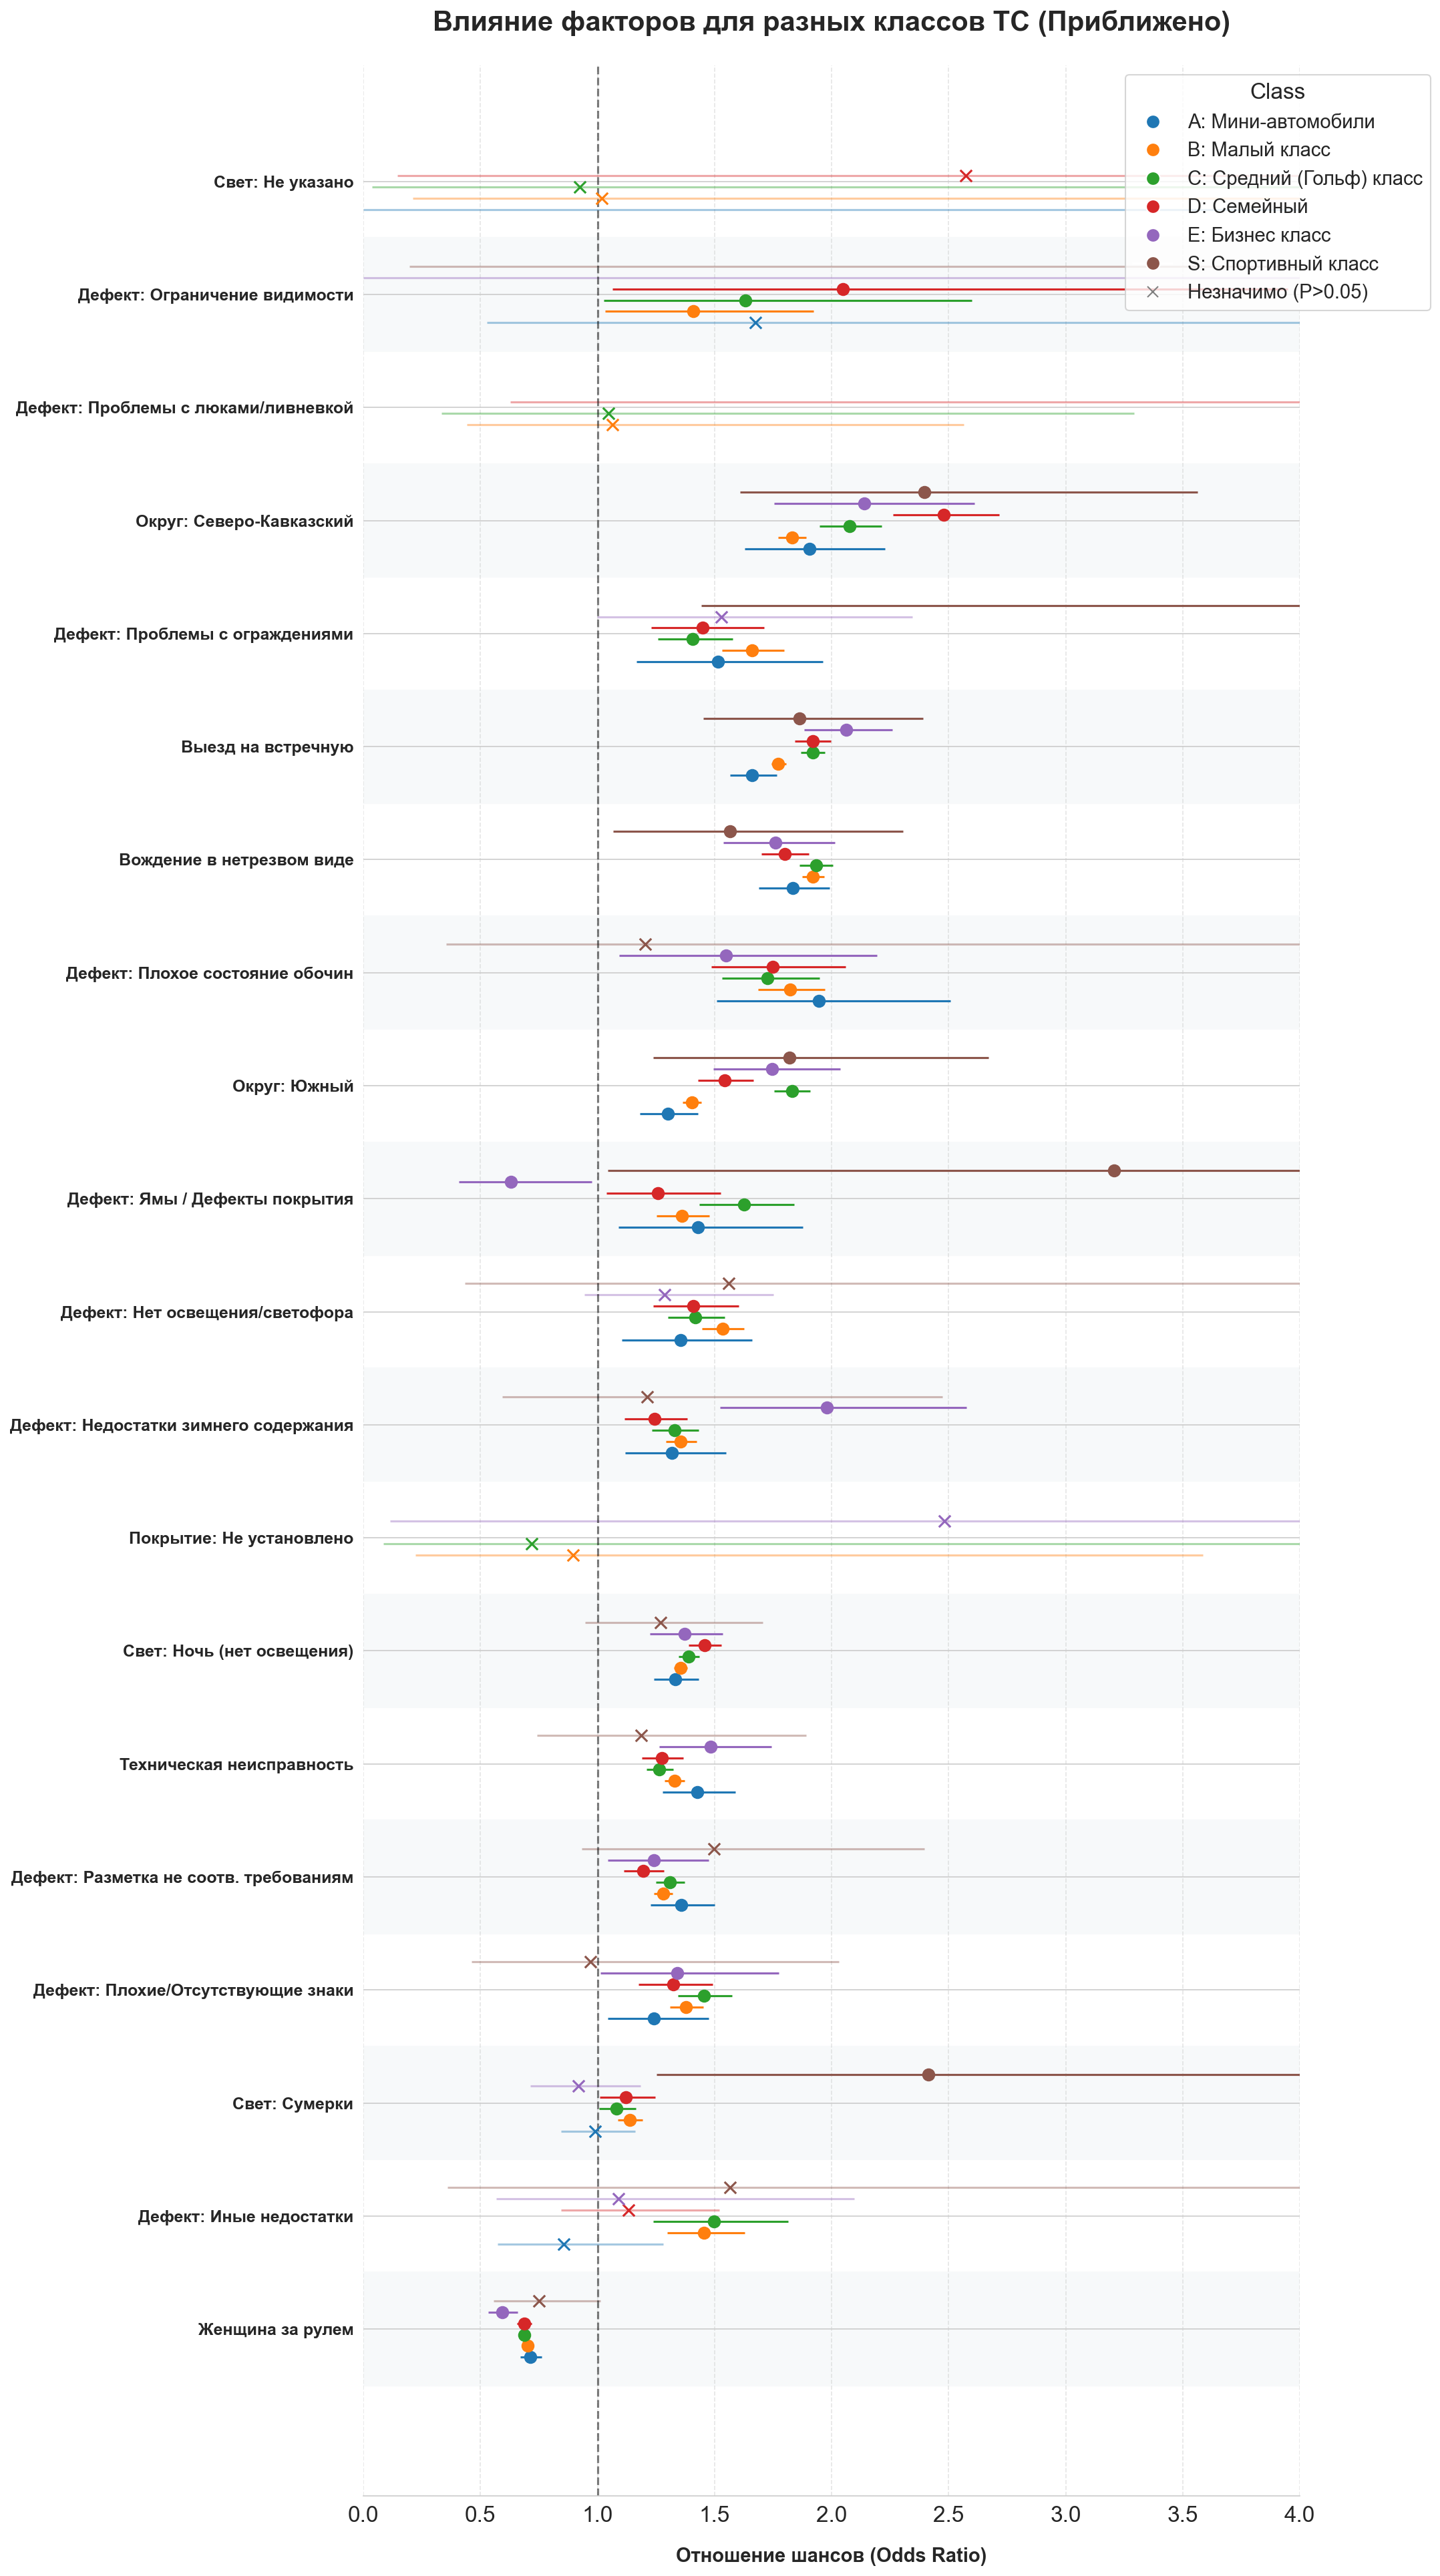

In [152]:
# --- НАСТРОЙКИ ВИЗУАЛИЗАЦИИ ---
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'sans-serif'

sns.set_style("whitegrid")

# --- 1. УНИВЕРСАЛЬНАЯ ФУНКЦИЯ ДЛЯ FOREST PLOT ---
def plot_robustness_comparison(data, group_col, top_n_vars, title, x_limit=5):
    """
    Строит сравнительный forest plot с обрезкой выбросов и зумом.
    
    Args:
    data (DataFrame): DataFrame с результатами (class_rob_df или rob_df).
    group_col (str): Название колонки для группировки ('Class' или 'Period').
    top_n_vars (int): Сколько топ-факторов отобразить.
    title (str): Заголовок графика.
    x_limit (int): Предел по оси X для зума.
    """
    
    # 1. Отбираем переменные для графика
    top_vars = data.groupby('Variable_Label')['OR'].mean().apply(lambda x: abs(x-1)).sort_values(ascending=False).head(top_n_vars).index
    plot_data = data[data['Variable_Label'].isin(top_vars)].copy()
    
    # --- ГЛАВНЫЙ ФИКС: ОБРЕЗКА ВЫБРОСОВ ---
    CLIP_THRESHOLD = 25 # Все, что выше, рисуем на этой отметке
    plot_data['OR'] = plot_data['OR'].clip(upper=CLIP_THRESHOLD)
    plot_data['OR_Upper'] = plot_data['OR_Upper'].clip(upper=CLIP_THRESHOLD)
    # ----------------------------------------
    
    # 2. Палитра и смещения
    unique_groups = sorted(plot_data[group_col].unique())
    colors = sns.color_palette("tab10", n_colors=len(unique_groups))
    group_color_map = dict(zip(unique_groups, colors))
    offsets = np.linspace(-0.25, 0.25, len(unique_groups))
    offset_map = dict(zip(unique_groups, offsets))
    
    # 3. Сортировка для графика
    var_order = plot_data.groupby('Variable_Label')['OR'].mean().sort_values(ascending=True).index
    
    # 4. Рисуем
    fig, ax = plt.subplots(figsize=(15, len(var_order) * 1.3), dpi=150)
    y_positions = np.arange(len(var_order))

    for i, var_name in enumerate(var_order):
        var_subset = plot_data[plot_data['Variable_Label'] == var_name]
        
        if i % 2 == 0:
            ax.axhspan(i - 0.5, i + 0.5, color='#f7f9fa', zorder=0)

        for group in unique_groups:
            row = var_subset[var_subset[group_col] == group]
            if row.empty: continue
            row = row.iloc[0]
            
            y_pos = i + offset_map[group]
            is_sig = row['P-value'] < 0.05
            color = group_color_map[group]
            alpha = 1.0 if is_sig else 0.4
            marker = 'o' if is_sig else 'x'
            
            ax.hlines(y_pos, row['OR_Lower'], row['OR_Upper'], color=color, linewidth=1.5, alpha=alpha)
            ax.scatter(row['OR'], y_pos, color=color, s=70, marker=marker, zorder=3)

    # 5. Оформление
    ax.set_yticks(y_positions)
    ax.set_yticklabels(var_order, fontsize=12, fontweight='bold')

    ax.axvline(1, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    ax.set_xlim(0, x_limit) # Применяем зум
    
    ax.set_xlabel('Отношение шансов (Odds Ratio)', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_title(title, fontsize=20, fontweight='heavy', pad=25)
    
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=l) for l, c in group_color_map.items()]
    handles.append(plt.Line2D([0], [0], marker='x', color='gray', linestyle='None', markersize=8, label='Незначимо (P>0.05)'))
    ax.legend(handles=handles, title=group_col, loc='upper right', bbox_to_anchor=(1.15, 1))

    sns.despine(left=True)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# --- ЗАПУСК ДЛЯ ОБЩЕГО ГРАФИКА ---
plot_robustness_comparison(
    data=class_rob_df, 
    group_col='Class', 
    top_n_vars=20, # Топ-20 самых влиятельных
    title='Влияние факторов для разных классов ТС (Приближено)',
    x_limit=4 # Приближаем до 4.0
)

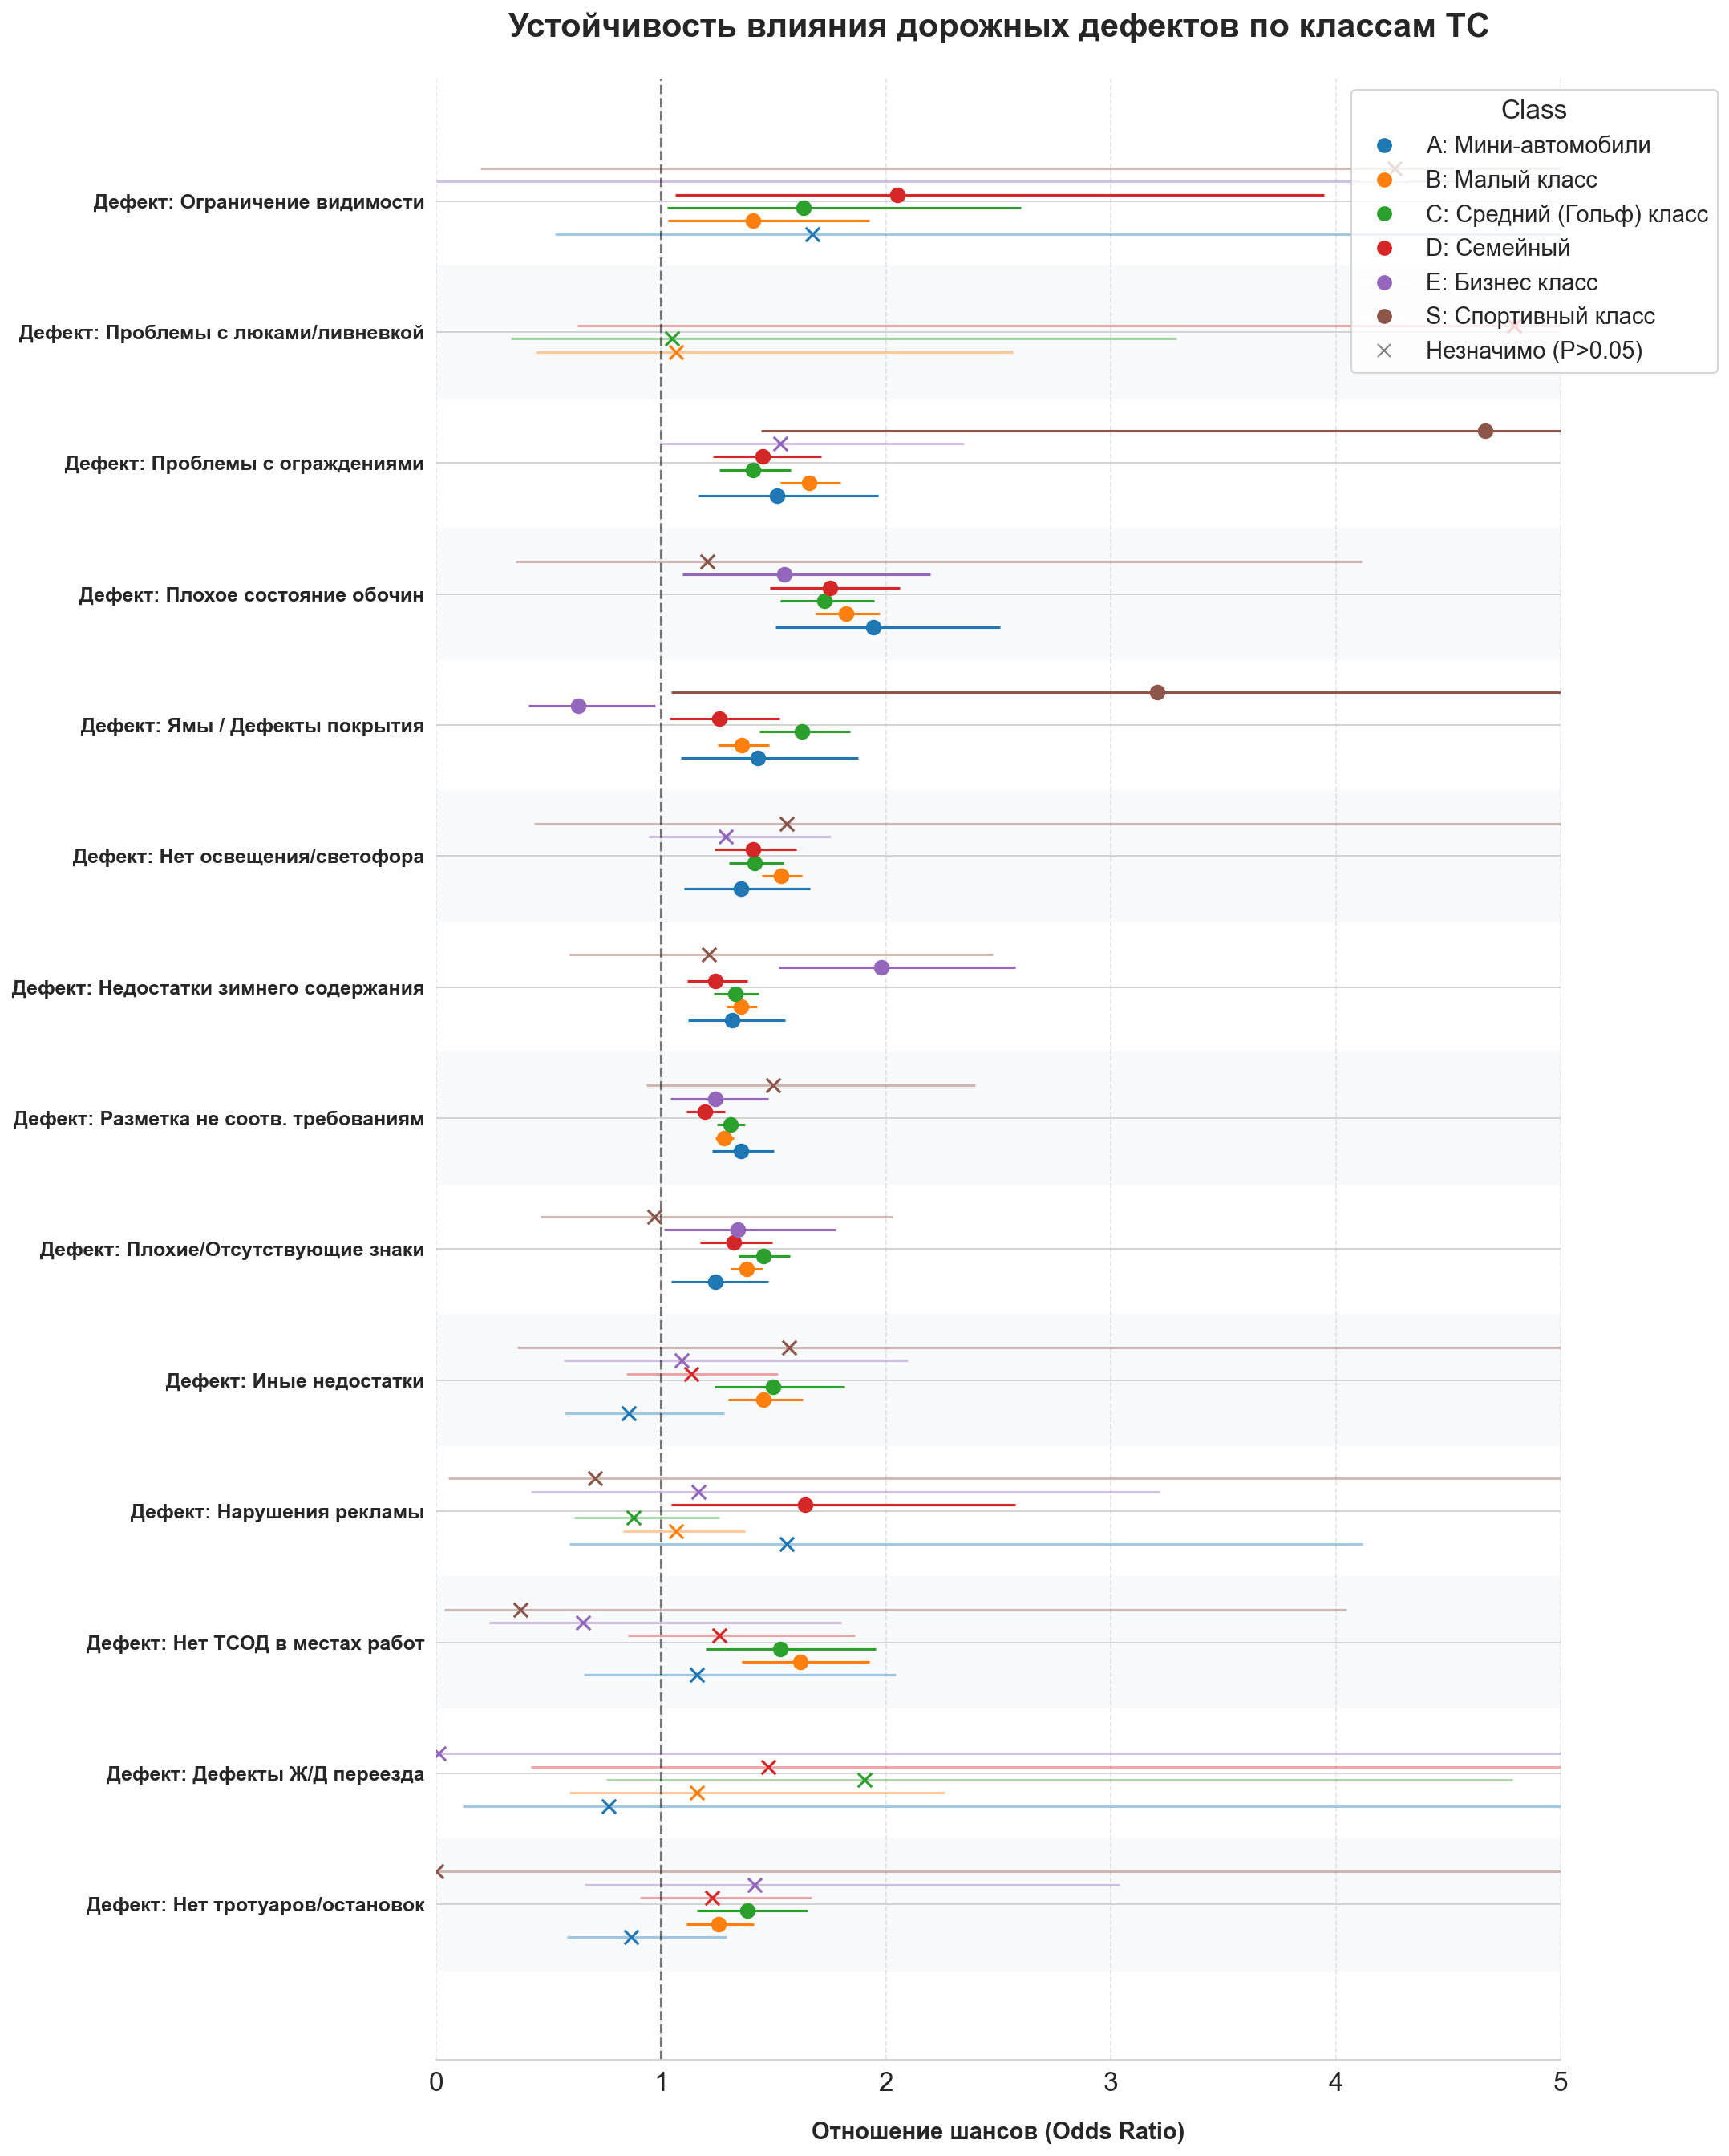

In [153]:
# --- ФИЛЬТРУЕМ ДАННЫЕ ТОЛЬКО ПО ДЕФЕКТАМ ---
defect_mask = class_rob_df['Variable_Label'].str.startswith('Дефект:')
defect_data = class_rob_df[defect_mask].copy()

# Запускаем ту же функцию, но на отфильтрованных данных
plot_robustness_comparison(
    data=defect_data,
    group_col='Class',
    top_n_vars=len(defect_data['Variable_Label'].unique()), # Показываем все дефекты
    title='Устойчивость влияния дорожных дефектов по классам ТС',
    x_limit=5 # Чуть больше предел, так как у дефектов разброс может быть выше
)

In [154]:
# --- 1. ПОЛУЧАЕМ РЕЗУЛЬТАТЫ ОСНОВНОЙ МОДЕЛИ ---
# (Убедитесь, что 'res' - это результат fit() вашей главной модели)
# (Убедитесь, что функция get_readable_label() определена)

num_thresholds = len(y.unique()) - 1
params_main = res.params[:-num_thresholds]
pvalues_main = res.pvalues[:-num_thresholds]

main_model_df = pd.DataFrame({
    'Variable': params_main.index,
    'Coef_Main': params_main.values,
    'P_Main': pvalues_main.values
})

# Оставляем только дефекты
defect_mask_main = main_model_df['Variable'].str.contains('road_defects_cat')
main_model_defects = main_model_df[defect_mask_main].copy()
main_model_defects['Variable_Label'] = main_model_defects['Variable'].apply(get_readable_label)

In [170]:
# --- 2. ТАБЛИЦА УСТОЙЧИВОСТИ ПО ГОДАМ (ТОЛЬКО ДЕФЕКТЫ) ---

# Фильтруем только дефекты
defect_mask_years = rob_df['Variable'].str.contains('road_defects_cat')
defects_by_year = rob_df[defect_mask_years].copy()

# Создаем сводную таблицу (результат - MultiIndex)
pivot_years = defects_by_year.pivot_table(
    index='Variable_Label', 
    columns='Period', 
    values=['Coef', 'P-value']
)

# --- ‼️ ГЛАВНЫЙ ФИКС ‼️ ---
# "Сплющиваем" многоуровневые колонки в одноуровневые
# Было: ('Coef', '2015-2016') -> Станет: 'Coef_2015-2016'
pivot_years.columns = [f'{level1}_{level0}' for level1, level0 in pivot_years.columns]
# -----------------------------

# Теперь pivot_years - это обычный DataFrame, и merge сработает
final_table_years = pd.merge(
    pivot_years, 
    main_model_defects[['Variable_Label', 'Coef_Main', 'P_Main']],
    on='Variable_Label',
    how='left'
).set_index('Variable_Label')

# --- СТИЛИЗАЦИЯ И ВЫВОД (код ниже нужно тоже адаптировать) ---

# Вспомогательная функция (остается без изменений)
def highlight_and_format(val, p_val):
    is_sig = p_val < 0.05
    color = "#458c4b" if is_sig else "#7c5920"
    font_weight = 'bold' if is_sig else 'normal'
    return f'background-color: {color}; font-weight: {font_weight};'

# Адаптируем форматирование
# Собираем список колонок с коэффициентами для форматирования
coef_cols_years = [col for col in final_table_years.columns if 'Coef' in col]

styled_years = final_table_years.style \
    .format('{:+.3f}', subset=coef_cols_years) \
    .set_caption("<b>Устойчивость влияния дефектов по годам (Коэффициенты Log-Odds)</b>") \
    .set_table_styles([{'selector': 'caption', 'props': 'font-size: 16px; font-weight: bold;'}])

# Адаптируем применение подсветки
for period in [f"{p[0]}-{p[1]}" for p in YEAR_PERIODS]:
    coef_col = f'Coef_{period}'
    pval_col = f'P-value_{period}'
    if coef_col in final_table_years.columns:
        styled_years = styled_years.apply(
            lambda x: final_table_years.apply(
                lambda row: highlight_and_format(row[coef_col], row[pval_col]), axis=1
            ),
            subset=pd.IndexSlice[:, coef_col],
            axis=0
        )

def final_styler(df):
    """Применяет стили ко всему DataFrame, где есть колонки Coef_... и P-value_..."""
    
    # 1. Сначала задаем дефолтный стиль (текст)
    styled_df = df.style.format('{:+.3f}').set_caption(
        "<b>Устойчивость влияния дефектов (Коэффициенты Log-Odds)</b>"
    ).set_table_styles([{'selector': 'caption', 'props': 'font-size: 16px;'}])
    
    # 2. Собираем пары колонок для подсветки (например, 'Coef_2015-2016' и 'P-value_2015-2016')
    cols_to_style = {}
    for col in df.columns:
        if 'Coef_' in col:
            # Находим соответствующий P-value
            pval_col = col.replace('Coef_', 'P-value_')
            if pval_col in df.columns:
                cols_to_style[col] = pval_col
    
    # Не забываем про главную модель
    if 'Coef_Main' in df.columns and 'P_Main' in df.columns:
        cols_to_style['Coef_Main'] = 'P_Main'

    # 3. Применяем подсветку
    def highlight_by_pvalue(row):
        styles = [''] * len(row)
        for i, col_name in enumerate(row.index):
            if col_name in cols_to_style:
                pval_col = cols_to_style[col_name]
                p_val = row[pval_col]
                
                is_sig = p_val < 0.05
                color = "#36883d" if is_sig else "#845F24" # Зеленый (значимо) / Желтый (нет)
                font_weight = 'bold' if is_sig else 'normal'
                styles[i] = f'background-color: {color}; font-weight: {font_weight};'
        return styles

    # Применяем функцию построчно
    styled_df = styled_df.apply(highlight_by_pvalue, axis=1)
    
    # 4. Прячем P-values
    p_value_cols = [col for col in df.columns if 'P-value' in col or 'P_Main' in col]
    styled_df = styled_df.hide(subset=p_value_cols, axis='columns')
    
    return styled_df

# Применяем новый стиллер
styled_years = final_styler(final_table_years)

print("\n--- Таблица 1: Устойчивость по годам (Исправлено) ---")
display(styled_years)


--- Таблица 1: Устойчивость по годам (Исправлено) ---


In [171]:
# --- 3. ТАБЛИЦА УСТОЙЧИВОСТИ ПО КЛАССАМ ТС (ТОЛЬКО ДЕФЕКТЫ) ---

# Фильтруем дефекты
defect_mask_class = class_rob_df['Variable'].str.contains('road_defects_cat')
defects_by_class = class_rob_df[defect_mask_class].copy()

# Сводная таблица
pivot_class = defects_by_class.pivot_table(
    index='Variable_Label', 
    columns='Class', 
    values=['Coef', 'P-value']
)

# --- ‼️ ГЛАВНЫЙ ФИКС ‼️ ---
pivot_class.columns = [f'{level1}_{level0}' for level1, level0 in pivot_class.columns]
# -----------------------------

# Merge
final_table_class = pd.merge(
    pivot_class, 
    main_model_defects[['Variable_Label', 'Coef_Main', 'P_Main']],
    on='Variable_Label',
    how='left'
).set_index('Variable_Label')

# --- СТИЛИЗАЦИЯ И ВЫВОД (адаптируем) ---
coef_cols_class = [col for col in final_table_class.columns if 'Coef' in col]

styled_class = final_table_class.style \
    .format('{:+.3f}', subset=coef_cols_class) \
    .set_caption("<b>Устойчивость влияния дефектов по классам ТС (Коэффициенты Log-Odds)</b>") \
    .set_table_styles([{'selector': 'caption', 'props': 'font-size: 16px; font-weight: bold;'}])

# Подсветка
for cls_label in class_labels.values():
    coef_col = f'Coef_{cls_label}'
    pval_col = f'P-value_{cls_label}'
    if coef_col in final_table_class.columns:
        styled_class = styled_class.apply(
            lambda x: final_table_class.apply(
                lambda row: highlight_and_format(row[coef_col], row[pval_col]), axis=1
            ),
            subset=pd.IndexSlice[:, coef_col],
            axis=0
        )

styled_class = final_styler(final_table_class)

print("\n--- Таблица 2: Устойчивость по классам ТС (Исправлено) ---")
display(styled_class)


--- Таблица 2: Устойчивость по классам ТС (Исправлено) ---
